## Questions

In [ ]:
#ok, so questions
#what animal and or breed is most likely to be picked up in a particular council district 
#found
#what animal and or breed is most likely to be put down in a particular council district
#found
#what animal and or breed is most likely to be adopted in a particular council district
#found
#how long does each type of animal stay impounded?
#next
#is there an association by employee id and outcome?
#no
#are there any particular types or breeds that get returned to owner?
#next

In [ ]:
#break animals into length of stays...

In [ ]:
#Do I need to sample these individually?  I should be able to loop through these with a groupby?

In [1155]:
de.groupby('Council District')['Outcome_Days'].mean()

Council District
1     4.038298
2     3.964953
3     4.473233
4     5.145128
5     4.109922
6     2.732615
7     4.930991
8     4.643243
9     4.551075
10    5.187215
11    4.038012
12    3.926531
13    5.361039
14    4.386921
Name: Outcome_Days, dtype: float64

## Importing Libraries and Functions

In [1074]:
from heapq import nlargest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [853]:
def age_group(age):
    if age >= 0 and age < 60:
        return "0-60 Days"
    elif age >= 60 and age < 120:
        return "60-120 Days"
    elif age >= 120 and age < 180:
        return "120-180 Days"
    elif age >= 180 and age < 240:
        return "180-240 Days"
    elif age >= 240 and age < 300:
        return "240-300 Days"
    elif age >= 300 and age < 360:
        return "300-360 Days"
   

In [1230]:
def runpercs(ant):
    tots = {}
    dogs = {}    
    cats = {}
    intotals = {}
    indogs = {}
    incats = {}
    
    #Make Dog and Cat only DFs
    dog = ant[ant['Animal Type'] == 'DOG']
    cat = ant[ant['Animal Type'] == 'CAT']
    
    #Get Total Type Counts of Total, Dogs, Cats
    vals = ant['Outcome Type'].value_counts()
    valdog = dog['Outcome Type'].value_counts()
    valcat = cat['Outcome Type'].value_counts()
    
    #Get Total Type Counts of Total, Dogs, Cats
    intotal = ant['Intake Type'].value_counts()
    indog = dog['Intake Type'].value_counts()
    incat = cat['Intake Type'].value_counts()
    
    #Get total counts of Total Dogs, Cats
    num = ant.shape[0]
    numdog = dog.shape[0]
    numcat = cat.shape[0]
    
    #Dicts for Outcome Types
    for index, value in vals.items():
        tots.update({index:round(value/num, 3)})
    for index, value in valdog.items():
        dogs.update({index:round(value/numdog, 3)})
    for index, value in valcat.items():
        cats.update({index:round(value/numcat, 3)})
    
    #Dicts for Intake Types
    for index, value in intotal.items():
        intotals.update({index:round(value/num, 3)})
    for index, value in indog.items():
        indogs.update({index:round(value/numdog, 3)})
    for index, value in incat.items():
        incats.update({index:round(value/numcat, 3)})
            
    #Dicts to DFs Outcome    
    ct = pd.DataFrame.from_dict(tots, orient='index', columns=['Total'])
    cd = pd.DataFrame.from_dict(dogs, orient='index', columns=['Dogs'])
    cc = pd.DataFrame.from_dict(cats, orient='index', columns=['Cats'])
    cv = pd.concat([ct,cd,cc], axis=1)
    cv = cv.fillna(0)
    
    #Dicts to DFs Intakes
    it = pd.DataFrame.from_dict(intotals, orient='index', columns=['Total'])
    ids = pd.DataFrame.from_dict(indogs, orient='index', columns=['Dogs'])
    ic = pd.DataFrame.from_dict(incats, orient='index', columns=['Cats'])
    ci = pd.concat([it,ids,ic], axis=1)
    ci = ci.fillna(0) 
    
    #plot Outcomes
    ax = cv.plot(kind='bar', width=.85, title='Outcome Types')
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    #plot Intakes
    ax2 = ci.plot(kind='bar', width=.85, title = 'Intake Types')
    for p in ax2.patches:
        ax2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

        
        
    return cv, ci

In [ ]:
def breads(ant):
    outcomemean = c1.Outcome_Days.mean()
    a = ant.groupby(['Animal Breed']).size()
    means = {}
    jee = {} 
    for index, value in a.items():
        means.update({index: value/c1.shape[0]})
    
    moon = nlargest(10, means, key = means.get)
    for val in moon: 
        jee.update({val: means.get(val)})
    
    bread = pd.DataFrame.from_dict(means, orient='index', columns=['Breed_Percentage'])
    
    plt.bar(*zip(*sorted(jee.items())))
    plt.xticks(rotation=80)
    plt.show()
    
    return bread

## Initial Exploration

In [1236]:
df = pd.read_excel('EDA Instructions and Data.xlsx', sheet_name=2)

In [4]:
df.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  Tag Type  \
0  A0144701         DOG       HAVANESE         VT 12     IMPOUNDED       NaN   
1  A0442587         DOG    TERRIER MIX       FREEZER     IMPOUNDED       NaN   
2  A0458972         DOG      CATAHOULA     RECEIVING   UNAVAILABLE       NaN   
3  A0525642         DOG  GERM SHEPHERD      INJD 001     IMPOUNDED       NaN   
4  A0565586         DOG  SILKY TERRIER       LFD 119   UNAVAILABLE       NaN   

  Activity Number  Activity Sequence Source Id Census Tract  ... Outcome Time  \
0             NaN                  1  P0098773         6301  ...     11:31:00   
1             NaN                  1  P0492284         7102  ...     00:00:00   
2      A19-195601                  1  P9991718         4600  ...     13:36:00   
3      A19-196573                  1  P0903792        16605  ...     17:35:00   
4             NaN                  1  P0890077         6900  ...     12:57:00   

  Receipt Number Impound Number  Service Request Number  \
0     R19-558731     K19-486742                     NaN   
1            NaN     K19-486954                     NaN   
2            NaN     K19-482022                     NaN   
3            NaN     K19-483073                     NaN   
4     R19-558750     K19-486694                     NaN   

                        Outcome Condition   Chip Status     Animal Origin  \
0                                APP SICK     SCAN CHIP  OVER THE COUNTER   
1                                    DEAD     SCAN CHIP  OVER THE COUNTER   
2  TREATABLE REHABILITABLE NON-CONTAGIOUS  SCAN NO CHIP             SWEEP   
3  TREATABLE REHABILITABLE NON-CONTAGIOUS     SCAN CHIP             SWEEP   
4                                 APP WNL     SCAN CHIP  OVER THE COUNTER   

  Additional Information     Month    Year  
0      RETURNED TO OWNER  NOV.2019  FY2020  
1                    NaN  NOV.2019  FY2020  
2                    NaN  OCT.2019  FY2020  
3                 TAGGED  OCT.2019  FY2020  
4      RETURNED TO OWNER  NOV.2019  FY2020  

[5 rows x 34 columns]

In [5]:
df.sample(10)

Animal Id Animal Type    Animal Breed Kennel Number Kennel Status  \
12988  A1092643         CAT     DOMESTIC SH       LFC 045     AVAILABLE   
17323  A1095883         CAT     DOMESTIC SH       LFC 012   UNAVAILABLE   
7649   A1089231         DOG    CHIHUAHUA LH         CC 04     IMPOUNDED   
14998  A1094389         DOG        PIT BULL     RECEIVING     IMPOUNDED   
3726   A1085307         DOG   GERM SHEPHERD     RECEIVING     IMPOUNDED   
6310   A1087804         DOG   SCHNAUZER MIN         DC 03   UNAVAILABLE   
14322  A1095472         DOG      POMERANIAN          LOST     IMPOUNDED   
11196  A1091902         DOG  YORKSHIRE TERR     RECEIVING     IMPOUNDED   
14545  A1095515         CAT     DOMESTIC SH        AC 027   UNAVAILABLE   
18165  A1096418         DOG        PIT BULL      INJD 007     IMPOUNDED   

       Tag Type Activity Number  Activity Sequence Source Id Census Tract  \
12988       NaN      A20-208374                  1  P0914397         4201   
17323       NaN             NaN                  1  P0918688         7202   
7649        NaN             NaN                  1  P0908940        10101   
14998       NaN      A20-211049                  1  P9991704         8500   
3726        NaN      A19-196772                  1  P9991765        16701   
6310        NaN      A19-200410                  1  P9991781         2500   
14322       NaN             NaN                  0  P0918101          NaN   
11196       NaN      A19-207322                  1  P9991778         8703   
14545       NaN             NaN                  1  P0549189         9103   
18165       NaN             NaN                  1  P0818887          500   

       ... Outcome Time Receipt Number Impound Number  Service Request Number  \
12988  ...     09:25:00            NaN     K20-493279                     NaN   
17323  ...     09:25:00            NaN     K20-497702                     NaN   
7649   ...     16:36:00     R19-559668     K19-488587                     NaN   
14998  ...     11:57:00            NaN     K20-495731                     NaN   
3726   ...     17:45:00            NaN     K19-483304                     NaN   
6310   ...     15:55:00     R19-558675     K19-486606                     NaN   
14322  ...     00:00:00            NaN     K20-497165                     NaN   
11196  ...     15:13:00            NaN     K19-492222                     NaN   
14545  ...     15:23:00     R20-564318     K20-497215                     NaN   
18165  ...     17:43:00            NaN     K20-498380                     NaN   

                            Outcome Condition     Chip Status  \
12988                                 APP WNL    SCAN NO CHIP   
17323                                 APP INJ    SCAN NO CHIP   
7649                                  APP WNL    SCAN NO CHIP   
14998                                 APP WNL       SCAN CHIP   
3726   TREATABLE REHABILITABLE NON-CONTAGIOUS  UNABLE TO SCAN   
6310                                  APP WNL       SCAN CHIP   
14322                                     NaN             NaN   
11196                                 UNKNOWN    SCAN NO CHIP   
14545                                 APP WNL  UNABLE TO SCAN   
18165                                 APP INJ    SCAN NO CHIP   

          Animal Origin           Additional Information     Month    Year  
12988             FIELD                              NaN  JAN.2020  FY2020  
17323  OVER THE COUNTER                              NaN  FEB.2020  FY2020  
7649   OVER THE COUNTER                      PRE-ADOPTED  NOV.2019  FY2020  
14998             SWEEP                              NaN  JAN.2020  FY2020  
3726              FIELD                              NaN  OCT.2019  FY2020  
6310              FIELD  RETURNED TO OWNER ; SX 11/09/19  NOV.2019  FY2020  
14322               NaN                              NaN  FEB.2020  FY2020  
11196             FIELD                              NaN  DEC.2019  FY2020  
14545  OVER THE COUNTER        

In [6]:
html_str_output = pandas_profiling.ProfileReport(df)
html_str_output

In [7]:
#First let's investigate the columns that are messed up.
#Tag Type, Census Tract, Council District, Staff ID, Service Request Number, Addtional Information, Year

In [1363]:
ret = df.loc[df['Outcome Type'] == 'RETURNED TO OWNER']

In [1364]:
ret['Chip Status'].value_counts()

SCAN CHIP         2232
SCAN NO CHIP      1799
UNABLE TO SCAN    1238
Name: Chip Status, dtype: int64

In [1365]:
ret.shape

(5269, 35)

In [617]:
#lets add days to outcome
df['Outcome_Days'] = (df['Outcome Date'] - df['Intake Date']).dt.days

In [1113]:
df['Outcome_Days'].mean()

5.4834184816707

In [618]:
df.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
0  A0144701         DOG       HAVANESE         VT 12     IMPOUNDED   
1  A0442587         DOG    TERRIER MIX       FREEZER     IMPOUNDED   
2  A0458972         DOG      CATAHOULA     RECEIVING   UNAVAILABLE   
3  A0525642         DOG  GERM SHEPHERD      INJD 001     IMPOUNDED   
4  A0565586         DOG  SILKY TERRIER       LFD 119   UNAVAILABLE   

  Activity Number  Activity Sequence Source Id Census Tract Council District  \
0             NaN                  1  P0098773         6301                4   
1             NaN                  1  P0492284         7102                2   
2      A19-195601                  1  P9991718         4600                1   
3      A19-196573                  1  P0903792        16605                8   
4             NaN                  1  P0890077         6900                1   

       Intake Type   Intake Subtype  Intake Total      Reason Staff Id  \
0  OWNER SURRENDER          GENERAL             1  PERSNLISSU      CDM   
1  OWNER SURRENDER  DEAD ON ARRIVAL             1  OTHRINTAKS      CDM   
2            STRAY         AT LARGE             1       OTHER   MG1718   
3  OWNER SURRENDER          GENERAL             1       OTHER  RA 1549   
4            STRAY         AT LARGE             1  OTHRINTAKS       JR   

  Intake Date Intake Time    Due Out                        Intake Condition  \
0  2019-11-08    15:48:00 2019-11-14                                APP SICK   
1  2019-11-10    14:18:00 2019-11-10                                    DEAD   
2  2019-10-03    11:08:00 2019-10-03  TREATABLE REHABILITABLE NON-CONTAGIOUS   
3  2019-10-11    09:55:00 2019-10-17  TREATABLE REHABILITABLE NON-CONTAGIOUS   
4  2019-11-08    11:55:00 2019-11-14                                 APP WNL   

       Hold Request       Outcome Type     Outcome Subtype Outcome Date  \
0               NaN  RETURNED TO OWNER             WALK IN   2019-11-09   
1               NaN    DEAD ON ARRIVAL            DISPOSAL   2019-11-10   
2               NaN  RETURNED TO OWNER               FIELD   2019-10-03   
3  EMERGENCY RESCUE           TRANSFER  MEDICAL-CONTAGIOUS   2019-10-15   
4        RESCU ONLY  RETURNED TO OWNER             WALK IN   2019-11-09   

  Outcome Time Receipt Number Impound Number Service Request Number  \
0     11:31:00     R19-558731     K19-486742                    NaN   
1     00:00:00            NaN     K19-486954                    NaN   
2     13:36:00            NaN     K19-482022                    NaN   
3     17:35:00            NaN     K19-483073                    NaN   
4     12:57:00     R19-558750     K19-486694                    NaN   

                        Outcome Condition   Chip Status     Animal Origin  \
0                                APP SICK     SCAN CHIP  OVER THE COUNTER   
1                                    DEAD     SCAN CHIP  OVER THE COUNTER   
2  TREATABLE REHABILITABLE NON-CONTAGIOUS  SCAN NO CHIP             SWEEP   
3  TREATABLE REHABILITABLE NON-CONTAGIOUS     SCAN CHIP             SWEEP   
4                                 APP WNL     SCAN CHIP  OVER THE COUNTER   

  Additional Information     Month  Outcome_Days  
0      RETURNED TO OWNER  NOV.2019           1.0  
1                    NaN  NOV.2019           0.0  
2                    NaN  OCT.2019           0.0  
3                 TAGGED  OCT.2019           4.0  
4      RETURNED TO OWNER  NOV.2019           1.0

In [10]:
df['Tag Type'].value_counts(dropna = False)

NaN    22557
Name: Tag Type, dtype: int64

In [11]:
#ok, we can get rid of tag type

In [12]:
df['Census Tract'].value_counts(dropna = False)

20500.0    3684
NaN        2758
11900.0     241
11602.0     237
17102.0     236
           ... 
31804.0       1
14127.0       1
15800.0       1
13104.0       1
13727.0       1
Name: Census Tract, Length: 312, dtype: int64

In [13]:
#lot of Nans, but should we keep it?

In [15]:
df['Council District'].value_counts(dropna=False)

6      5158
NaN    2758
4      2404
8      2238
5      2069
7      1609
1      1436
3      1413
2       869
9       751
10      456
14      392
13      392
11      347
12      250
0        11
AS        4
Name: Council District, dtype: int64

In [16]:
#this one seems useful.  same Nans as census tract, but better filled and simpler

In [18]:
df['Staff Id'].value_counts(dropna = False)

CDM        1334
WEB        1328
DL         1053
CBU         931
BW          854
           ... 
BBB8448       1
AAK1780       1
RY1776        1
BCD1779       1
ACO           1
Name: Staff Id, Length: 490, dtype: int64

In [19]:
#this is interesting.  we should keep this, there is some serious overrepresentation of staffIDs here.
#maybe we can explore correlations between outcome types and staff ID

In [21]:
df['Service Request Number'].value_counts(dropna = False)

NaN                22501
2000087228            36
982126057960114        2
1901377000             2
15-00091153            2
1901-242798            2
2000427938             1
1901329295             1
2000280489             1
1901457301             1
982126057679937        1
2000144038             1
`                      1
1901262130             1
1901216914             1
2000264650             1
2000454003             1
1901457372             1
Name: Service Request Number, dtype: int64

In [22]:
#this may not be worth keeping.  No revealing information and way too many NANs to track

In [24]:
df['Additional Information'].value_counts(dropna= False)

NaN                              13320
ADOPTED                           2426
FOSTER                            1142
TAGGED                             831
RETURNED TO OWNER                  668
                                 ...  
SRM1774                              1
HWT 2&3/INJD 8A                      1
RETURNED TO OWNER SX 01/30/20        1
RETURNED TO OWNER SX 01/13/20        1
RETURNED TO OWNERSX11/11             1
Name: Additional Information, Length: 1023, dtype: int64

In [25]:
#this seems similar to Outcome, may need to investigate further, but it may be superfluous

In [26]:
df['Year'].value_counts(dropna=False)

FY2020    22557
Name: Year, dtype: int64

In [27]:
#unremarkable, can drop.

In [28]:
#we can certainly drop Tag Type and Year.


In [896]:
df.loc[df['Intake Condition'] == 'DEAD']

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
1      A0442587         DOG      TERRIER MIX       FREEZER     IMPOUNDED   
39     A0733709         DOG  AUST CATTLE DOG       FREEZER   UNAVAILABLE   
302    A0995283         CAT      DOMESTIC SH       FREEZER   UNAVAILABLE   
582    A1044906         DOG    LABRADOR RETR     RECEIVING   UNAVAILABLE   
1112   A1072650         CAT      DOMESTIC SH       FREEZER   UNAVAILABLE   
...         ...         ...              ...           ...           ...   
18089  A1097567    WILDLIFE          OPOSSUM     RECEIVING     IMPOUNDED   
18124  A1096912         DOG        DACHSHUND       FREEZER   UNAVAILABLE   
18263  A1096918         DOG       GREAT DANE       FREEZER   UNAVAILABLE   
18502  A1097024         DOG         PIT BULL       FREEZER   UNAVAILABLE   
19540  A1020949         DOG  DOBERMAN PINSCH       FREEZER   UNAVAILABLE   

      Activity Number  Activity Sequence Source Id Census Tract  \
1                 NaN                  1  P0492284         7102   
39                NaN                  1  P0612673        17605   
302               NaN                  1  P0788987        19019   
582        A19-200858                  1  P9991780        17102   
1112              NaN                  1  P0017761        20500   
...               ...                ...       ...          ...   
18089      A20-215581                  1  P0500574        19018   
18124      A20-214527                  1  P9991782          201   
18263      A20-214527                  1  P9991782          201   
18502      A20-214839                  1  P0920143         5901   
19540      A20-214511                  1  P0919870        20300   

      Council District      Intake Type              Intake Subtype  \
1                    2  OWNER SURRENDER             DEAD ON ARRIVAL   
39                   7  OWNER SURRENDER             DEAD ON ARRIVAL   
302                 10  OWNER SURRENDER             DEAD ON ARRIVAL   
582                  8            STRAY             DEAD ON ARRIVAL   
1112                 6           FOSTER                      RETURN   
...                ...              ...                         ...   
18089               10         WILDLIFE             DEAD ON ARRIVAL   
18124               14      CONFISCATED  QUARANTINE DEAD ON ARRIVAL   
18263               14      CONFISCATED  QUARANTINE DEAD ON ARRIVAL   
18502                4      CONFISCATED                     CRUELTY   
19540                7  OWNER SURRENDER             DEAD ON ARRIVAL   

       Intake Total      Reason Staff Id Intake Date Intake Time    Due Out  \
1                 1  OTHRINTAKS      CDM  2019-11-10    14:18:00 2019-11-10   
39                1  PERSNLISSU      CBU  2019-12-15    14:45:00 2019-12-15   
302               1       OTHER       DL  2019-11-20    14:12:00 2019-11-20   
582               1  OTHRINTAKS   AK1780  2019-11-11    12:17:00 2019-11-11   
1112              1       OTHER       AC  2019-12-10    11:02:00 2019-12-10   
...             ...         ...      ...         ...         ...        ...   
18089             1  OTHRINTAKS  ERB1768  2020-03-04    14:00:00 2020-03-04   
18124             1  OTHRINTAKS  SPB1782  2020-02-25    16:21:00 2020-02-25   
18263             1  OTHRINTAKS  SPB1782  2020-02-25    16:21:00 2020-02-25   
18502             1  PERSNLISSU  ATB1754  2020-02-26    19:40:00 2020-03-08   
19540             1       OTHER  VJD1770  2020-02-23    20:40:00 2020-02-23   

      Intake Condition     Hold Request     Outcome Type Outcome Subtype  \
1                 DEAD              NaN  DEAD ON ARRIVAL        DISPOSAL   
39                DEAD              NaN  DEAD ON ARRIVAL        DISPOSAL   
302               DEAD              NaN  DEAD ON ARRIVAL        DISPOSAL   
582               DEAD          CRUELTY  DEAD ON ARRIVAL       TRANS-INV   
1112              DEAD       RESC FOSTR             DIED       IN FOSTER   
...                ...        

### Final DF turn to DE

In [1237]:
df = df.drop(columns = ['Year'])

In [1238]:
df = df.drop(columns = ['Tag Type'])

In [1239]:
df['Outcome_Days'] = (df['Outcome Date'] - df['Intake Date']).dt.days

In [1240]:
df = df[df['Intake Condition'] != 'DEAD']

In [1241]:
df = df[df['Intake Condition'] != 'DEAD ON ARRIVAL']

In [1242]:
df = df[df['Intake Condition'] != 'QUARANTINE DEAD ON ARRIVAL']

In [1243]:
df = df[df['Intake Condition'] != 'SAC DEAD ON ARRIVAL']

In [1244]:
df = df[df['Intake Condition'] != 'DECEASED']

In [1245]:
df = df[df['Intake Subtype'] != 'DEAD']
df = df[df['Intake Subtype'] != 'DEAD ON ARRIVAL']
df = df[df['Intake Subtype'] != 'QUARANTINE DEAD ON ARRIVAL']
df = df[df['Intake Subtype'] != 'SAC DEAD ON ARRIVAL']

In [1246]:
df.Outcome_Days = df.Outcome_Days.replace(np.nan, -1)

In [1247]:
#cost of care
df['cost_of_care'] = (df['Outcome_Days'] * 38.73) + 54.80

In [1080]:
df.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
0  A0144701         DOG       HAVANESE         VT 12     IMPOUNDED   
2  A0458972         DOG      CATAHOULA     RECEIVING   UNAVAILABLE   
3  A0525642         DOG  GERM SHEPHERD      INJD 001     IMPOUNDED   
4  A0565586         DOG  SILKY TERRIER       LFD 119   UNAVAILABLE   
5  A0570248         DOG  LABRADOR RETR     RECEIVING     IMPOUNDED   

  Activity Number  Activity Sequence Source Id Census Tract Council District  \
0             NaN                  1  P0098773         6301                4   
2      A19-195601                  1  P9991718         4600                1   
3      A19-196573                  1  P0903792        16605                8   
4             NaN                  1  P0890077         6900                1   
5      A19-197874                  1  P0820658         8400                5   

       Intake Type Intake Subtype  Intake Total      Reason Staff Id  \
0  OWNER SURRENDER        GENERAL             1  PERSNLISSU      CDM   
2            STRAY       AT LARGE             1       OTHER   MG1718   
3  OWNER SURRENDER        GENERAL             1       OTHER  RA 1549   
4            STRAY       AT LARGE             1  OTHRINTAKS       JR   
5  OWNER SURRENDER        GENERAL             1     MEDICAL   AK1780   

  Intake Date Intake Time    Due Out                        Intake Condition  \
0  2019-11-08    15:48:00 2019-11-14                                APP SICK   
2  2019-10-03    11:08:00 2019-10-03  TREATABLE REHABILITABLE NON-CONTAGIOUS   
3  2019-10-11    09:55:00 2019-10-17  TREATABLE REHABILITABLE NON-CONTAGIOUS   
4  2019-11-08    11:55:00 2019-11-14                                 APP WNL   
5  2019-10-20    14:48:00 2019-10-20    UNHEALTHY UNTREATABLE NON-CONTAGIOUS   

       Hold Request       Outcome Type     Outcome Subtype Outcome Date  \
0               NaN  RETURNED TO OWNER             WALK IN   2019-11-09   
2               NaN  RETURNED TO OWNER               FIELD   2019-10-03   
3  EMERGENCY RESCUE           TRANSFER  MEDICAL-CONTAGIOUS   2019-10-15   
4        RESCU ONLY  RETURNED TO OWNER             WALK IN   2019-11-09   
5           CRUELTY               DIED             ENROUTE   2019-10-21   

  Outcome Time Receipt Number Impound Number Service Request Number  \
0     11:31:00     R19-558731     K19-486742                    NaN   
2     13:36:00            NaN     K19-482022                    NaN   
3     17:35:00            NaN     K19-483073                    NaN   
4     12:57:00     R19-558750     K19-486694                    NaN   
5     11:00:00            NaN     K19-484308                    NaN   

                        Outcome Condition   Chip Status     Animal Origin  \
0                                APP SICK     SCAN CHIP  OVER THE COUNTER   
2  TREATABLE REHABILITABLE NON-CONTAGIOUS  SCAN NO CHIP             SWEEP   
3  TREATABLE REHABILITABLE NON-CONTAGIOUS     SCAN CHIP             SWEEP   
4                                 APP WNL     SCAN CHIP  OVER THE COUNTER   
5    UNHEALTHY UNTREATABLE NON-CONTAGIOUS     SCAN CHIP             FIELD   

  Additional Information     Month  Outcome_Days stay_category  cost_of_care  
0      RETURNED TO OWNER  NOV.2019           1.0     0-60 Days         93.53  
2                    NaN  OCT.2019           0.0     0-60 Days         54.80  
3                 TAGGED  OCT.2019           4.0     0-60 Days        209.72  
4      RETURNED TO OWNER  NOV.2019           1.0     0-60 Days         93.53  
5                    NaN  OCT.2019           1.0     0-60 Days         93.53

In [1248]:
df.loc[df['Outcome Type'] == 'DEAD ON ARRIVAL']

Empty DataFrame
Columns: [Animal Id, Animal Type, Animal Breed, Kennel Number, Kennel Status, Activity Number, Activity Sequence, Source Id, Census Tract, Council District, Intake Type, Intake Subtype, Intake Total, Reason, Staff Id, Intake Date, Intake Time, Due Out, Intake Condition, Hold Request, Outcome Type, Outcome Subtype, Outcome Date, Outcome Time, Receipt Number, Impound Number, Service Request Number, Outcome Condition, Chip Status, Animal Origin, Additional Information, Month, Outcome_Days, cost_of_care]
Index: []

In [1249]:
df['stay_category'] = df['Outcome_Days'].apply(age_group)

In [1250]:
df = df[df['Animal Type'].isin(['DOG', 'CAT'])]

In [1251]:
de = df[~df['Council District'].isin(['AS', 0])]

In [1252]:
de['Council District'].value_counts()


6     5013
4     2334
8     2182
5     2020
7     1550
1     1371
3     1369
2      817
9      625
10     390
13     349
14     318
11     269
12     201
Name: Council District, dtype: int64

In [874]:
de.stay_category.value_counts()

0-60 Days       22117
60-120 Days        57
120-180 Days        1
Name: stay_category, dtype: int64

In [875]:
de.Outcome_Days.value_counts(

0.0      7851
1.0      2871
2.0      1821
4.0      1619
6.0      1155
         ... 
80.0        1
112.0       1
100.0       1
77.0        1
71.0        1
Name: Outcome_Days, Length: 90, dtype: int64

In [876]:
de.Outcome_Days.mean()

5.440156152958921

<AxesSubplot:xlabel='Animal Type', ylabel='count'>

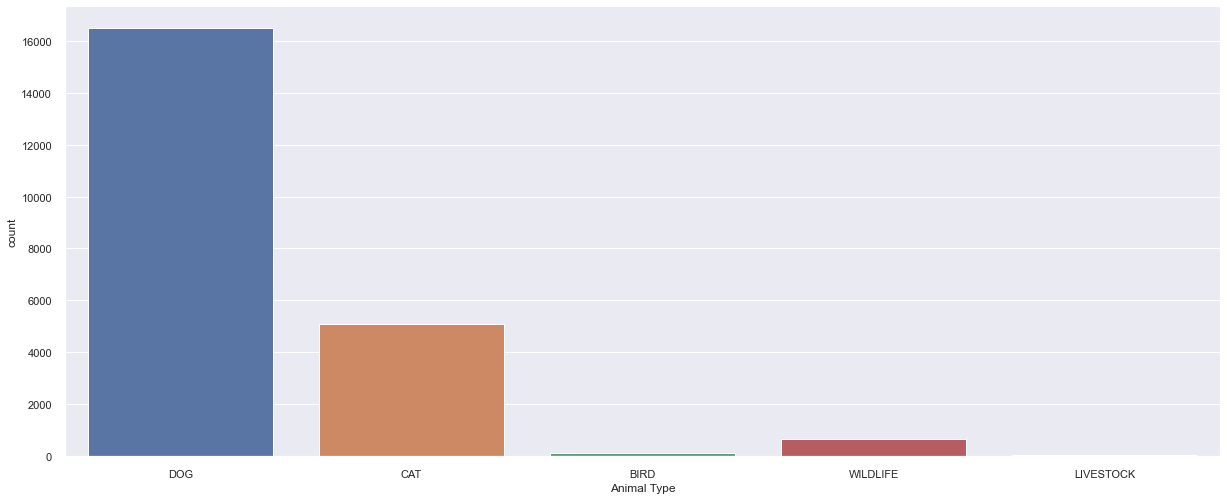

In [928]:
sns.countplot(df['Animal Type'])

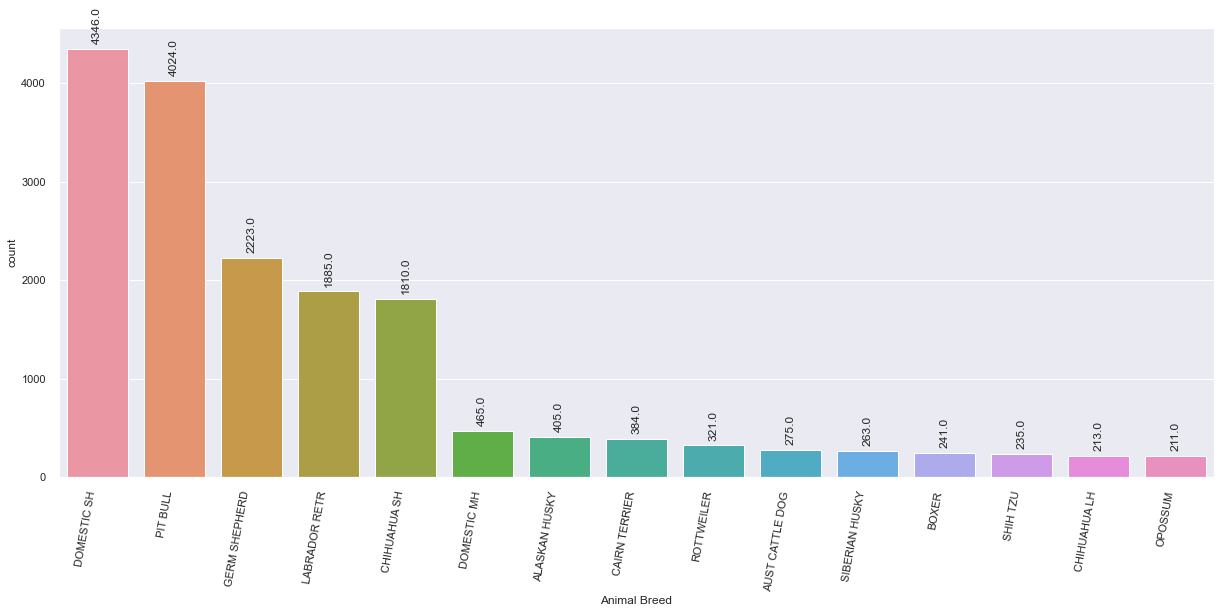

In [929]:
ax = sns.countplot(df['Animal Breed'], order=df['Animal Breed'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

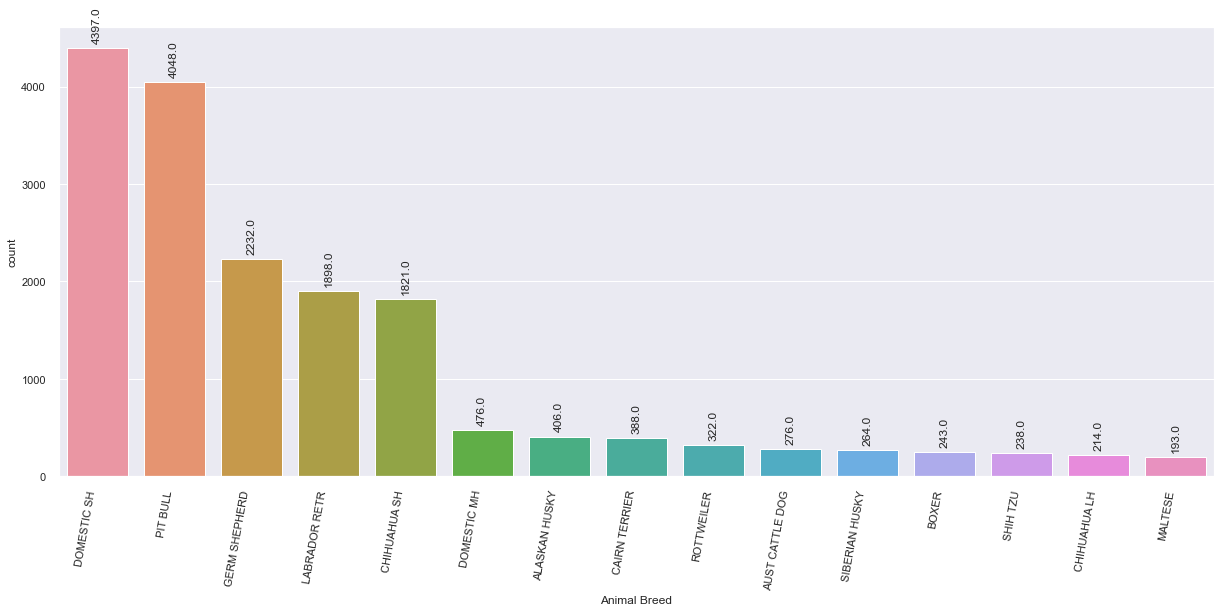

In [202]:
ax = sns.countplot(de['Animal Breed'], order=de['Animal Breed'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

<AxesSubplot:xlabel='Council District', ylabel='count'>

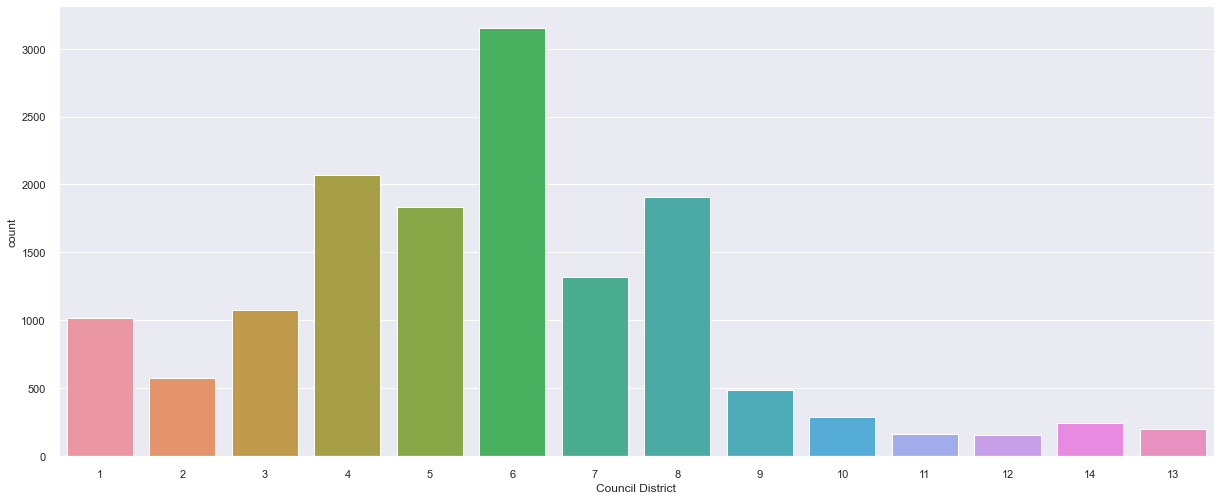

In [171]:
sns.countplot(de['Council District'])

<AxesSubplot:xlabel='Intake Type', ylabel='count'>

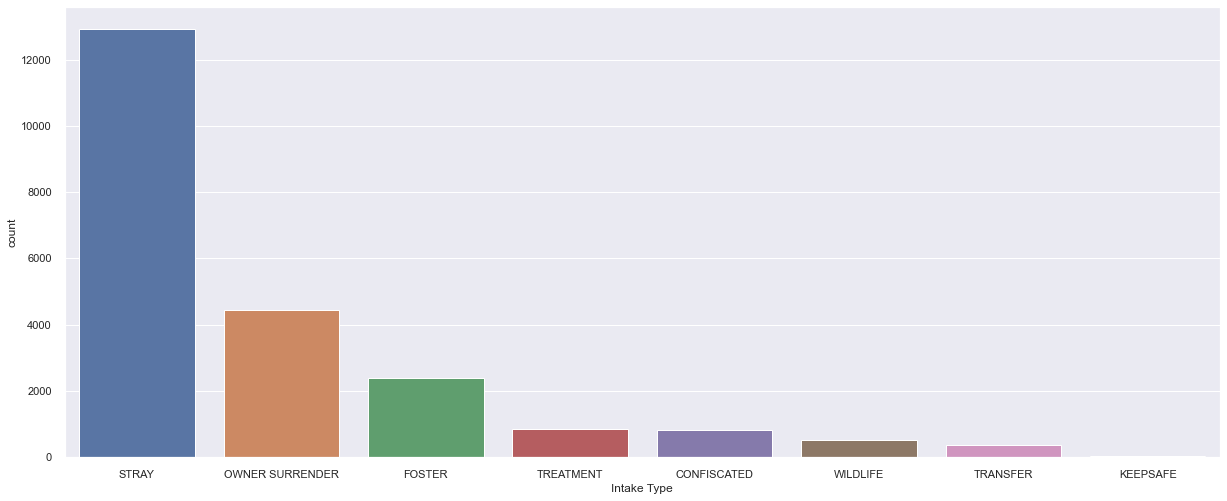

In [1204]:
sns.countplot(df['Intake Type'], order=df['Intake Type'].value_counts().index)

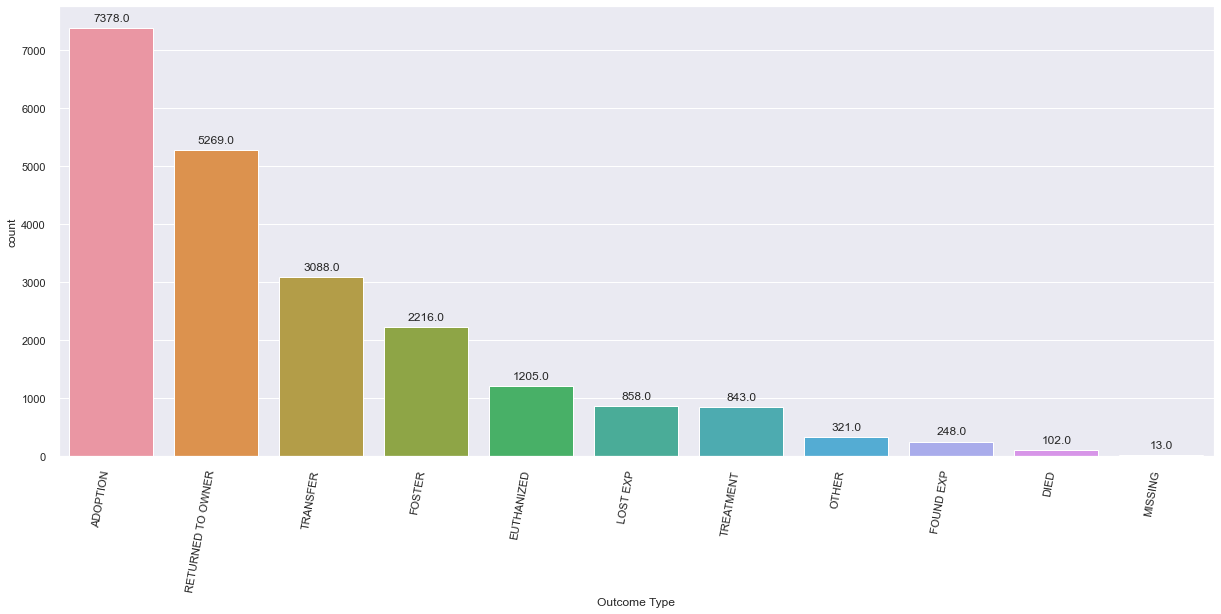

In [1280]:
ax = sns.countplot(df['Outcome Type'], order=df['Outcome Type'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=0)

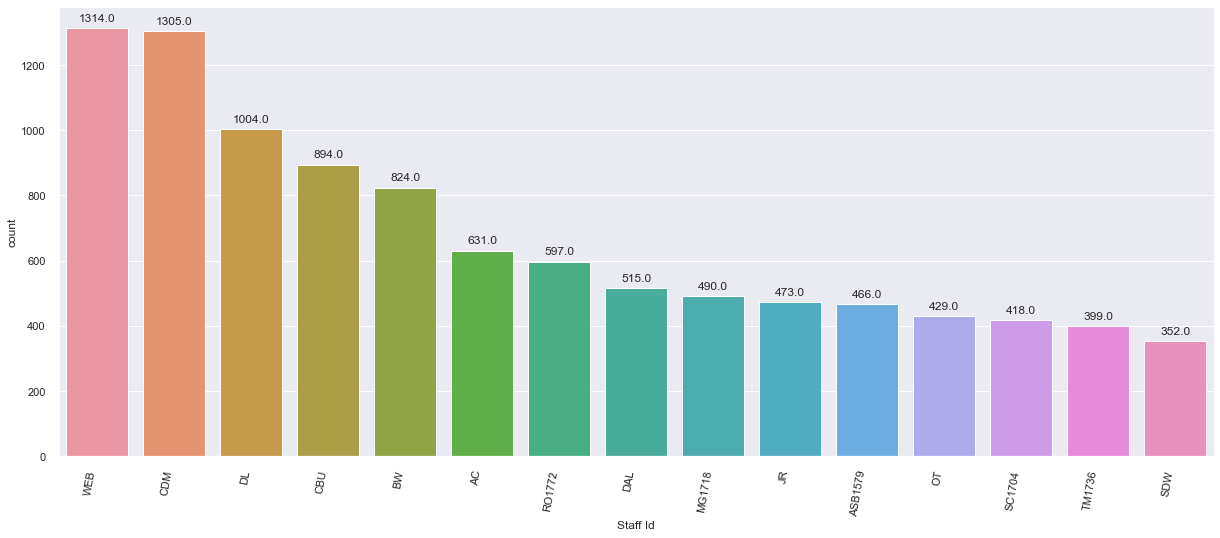

In [1279]:
ax = sns.countplot(de['Staff Id'], order=de['Staff Id'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=0)

<AxesSubplot:xlabel='Month', ylabel='count'>

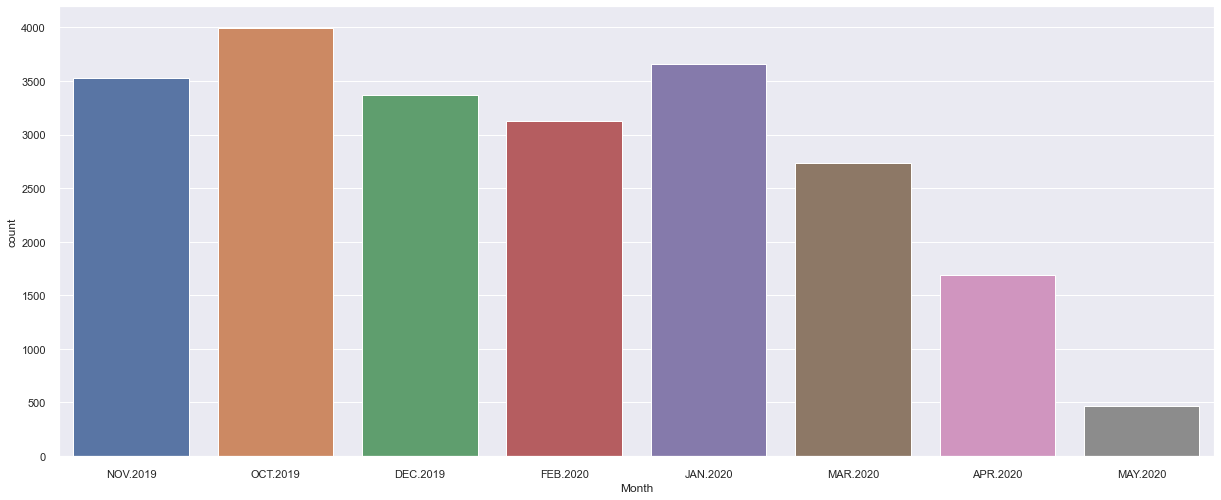

In [50]:
sns.countplot(df['Month'])

In [ ]:
#month does not seem particularly important, too small of a sample size to judge trends

In [203]:
de.loc[df['Receipt Number'] == 'R19-560515']

Animal Id Animal Type Animal Breed Kennel Number Kennel Status  \
10428  A1090325         CAT  DOMESTIC SH            F2     AVAILABLE   
10913  A1090325         CAT  DOMESTIC SH           K13   UNAVAILABLE   
10923  A1090322         CAT  DOMESTIC SH           K13   UNAVAILABLE   
10960  A1090323         CAT  DOMESTIC SH           K13   UNAVAILABLE   
11019  A1090321         CAT  DOMESTIC SH        FOSTER   UNAVAILABLE   

      Activity Number  Activity Sequence Source Id Census Tract  \
10428             NaN                  1  P0893338        20500   
10913             NaN                  1  P0843333         9611   
10923             NaN                  1  P0843333         9611   
10960             NaN                  1  P0843333         9611   
11019             NaN                  1  P0843333         9611   

      Council District Intake Type Intake Subtype  Intake Total      Reason  \
10428                6      FOSTER      TREATMENT             1       OTHER   
10913               13       STRAY       AT LARGE             1  OTHRINTAKS   
10923               13       STRAY       AT LARGE             1  OTHRINTAKS   
10960               13       STRAY       AT LARGE             1  OTHRINTAKS   
11019               13       STRAY       AT LARGE             1  OTHRINTAKS   

      Staff Id Intake Date Intake Time    Due Out Intake Condition  \
10428       AC  2019-12-22    10:18:00 2019-12-22         APP SICK   
10913      CBU  2019-12-07    14:24:00 2019-12-07         APP SICK   
10923      CBU  2019-12-07    14:24:00 2019-12-07          APP WNL   
10960      CBU  2019-12-07    14:24:00 2019-12-07          APP WNL   
11019      CBU  2019-12-07    14:24:00 2019-12-07          APP WNL   

      Hold Request Outcome Type Outcome Subtype Outcome Date Outcome Time  \
10428   RESC FOSTR   EUTHANIZED          HUMANE   2019-12-22     11:58:00   
10913   RESC FOSTR       FOSTER        UNDERAGE   2019-12-09     16:36:00   
10923   RESC FOSTR       FOSTER        UNDERAGE   2019-12-09     16:35:00   
10960   RESC FOSTR       FOSTER        UNDERAGE   2019-12-09     16:35:00   
11019   RESC FOSTR       FOSTER        UNDERAGE   2019-12-09     16:34:00   

      Receipt Number Impound Number Service Request Number Outcome Condition  \
10428     R19-560515     K19-491684                    NaN          APP SICK   
10913     R19-560515     K19-490066                    NaN           UNKNOWN   
10923     R19-560515     K19-490063                    NaN           UNKNOWN   
10960     R19-560515     K19-490065                    NaN           UNKNOWN   
11019     R19-560515     K19-490062                    NaN           UNKNOWN   

        Chip Status     Animal Origin Additional Information     Month  
10428  SCAN NO CHIP  OVER THE COUNTER                    NaN  DEC.2019  
10913  SCAN NO CHIP  OVER THE COUNTER                 FOSTER  DEC.2019  
10923  SCAN NO CHIP  OVER THE COUNTER                 FOSTER  DEC.2019  
10960  SCAN NO CHIP  OVER THE COUNTER                 FOSTER  DEC.2019  
11019  SCAN NO CHIP  OVER THE COUNTER                 FOSTER  DEC.2019

In [510]:
de['Chip Status'].value_counts(dropna=False)

SCAN NO CHIP                 11152
SCAN CHIP                     7284
UNABLE TO SCAN                1996
NaN                           1314
WILDLIFE - UNABEL TO SCAN        1
Name: Chip Status, dtype: int64

In [ ]:
#there are duplicates for recipt number, is this relevant or an error?

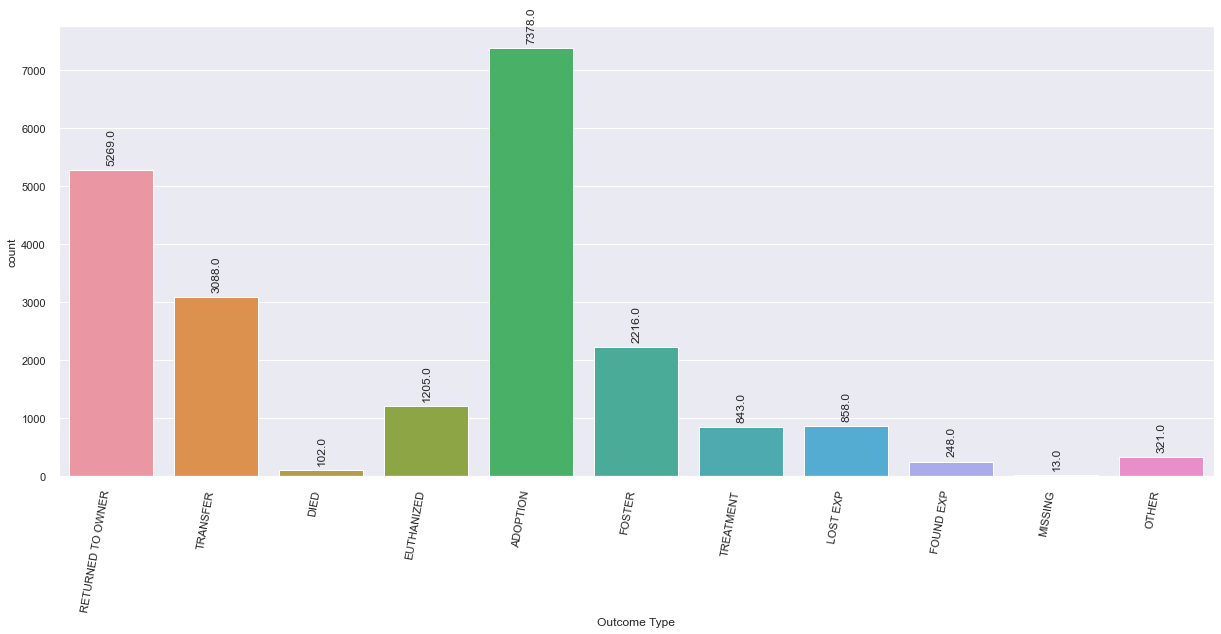

In [1277]:
ax = sns.countplot(df['Outcome Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

### Trying to see if Staff ID amounts to anything

In [208]:
CDM = df.loc[df["Staff Id"] == 'CDM']

In [209]:
CDM['Animal Type'].value_counts()

DOG    949
CAT    370
Name: Animal Type, dtype: int64

In [210]:
web = df.loc[df['Staff Id'] == 'WEB']

In [211]:
web.head()

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
260  A1097474         DOG     CHIHUAHUA SH          LOST     IMPOUNDED   
347  A1089226         DOG    LABRADOR RETR         FOUND     IMPOUNDED   
715  A1090041         CAT          AMER SH          LOST     IMPOUNDED   
803  A1092513         CAT       ABYSSINIAN          LOST     IMPOUNDED   
955  A1089178         DOG  OLDENG SHEEPDOG          LOST     IMPOUNDED   

    Activity Number  Activity Sequence Source Id Census Tract  \
260             NaN                  0  P0920776          NaN   
347             NaN                  0  P0908929          NaN   
715             NaN                  0  P0910264          NaN   
803             NaN                  0  P0914189          NaN   
955             NaN                  0  P0908863          NaN   

    Council District Intake Type Intake Subtype  Intake Total Reason Staff Id  \
260              NaN       STRAY            WEB             1    NaN      WEB   
347              NaN       STRAY            WEB             1    NaN      WEB   
715              NaN       STRAY            WEB             1    NaN      WEB   
803              NaN       STRAY            WEB             1    NaN      WEB   
955              NaN       STRAY            WEB             1    NaN      WEB   

    Intake Date Intake Time    Due Out Intake Condition Hold Request  \
260  2020-03-01    13:25:00 2020-03-03           NORMAL          NaN   
347  2019-11-23    14:25:00 2019-11-23           NORMAL          NaN   
715  2019-11-27    12:25:00 2019-12-04           NORMAL          NaN   
803  2020-01-03    13:25:00 2020-01-04           NORMAL          NaN   
955  2019-11-22    08:25:00 2019-11-23           NORMAL          NaN   

    Outcome Type Outcome Subtype Outcome Date Outcome Time Receipt Number  \
260     LOST EXP           OTHER   2020-04-03     00:00:00            NaN   
347    FOUND EXP           OTHER   2019-12-24     00:00:00            NaN   
715     LOST EXP           OTHER   2020-01-04     00:00:00            NaN   
803     LOST EXP           OTHER   2020-02-04     00:00:00            NaN   
955     LOST EXP           OTHER   2019-12-24     00:00:00            NaN   

    Impound Number Service Request Number Outcome Condition Chip Status  \
260     K20-499774                    NaN               NaN         NaN   
347     K19-488577                    NaN               NaN         NaN   
715     K19-489684                    NaN               NaN         NaN   
803     K20-493070                    NaN               NaN         NaN   
955     K19-488501                    NaN               NaN         NaN   

    Animal Origin Additional Information     Month  
260           NaN                    NaN  MAR.2020  
347           NaN                    NaN  NOV.2019  
715           NaN                    NaN  NOV.2019  
803           NaN                    NaN  JAN.2020  
955           NaN                    NaN  NOV.2019

In [212]:
web['Animal Type'].value_counts()

DOG    1072
CAT     242
Name: Animal Type, dtype: int64

In [213]:
web['Council District'].value_counts()

Series([], Name: Council District, dtype: int64)

In [214]:
dl = df.loc[df['Staff Id'] == 'DL']

In [215]:
dl.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
9   A0601180         DOG  COLLIE SMOOTH       LFD 076     IMPOUNDED   
24  A0690416         DOG  FOX TERR WIRE       LFD 082     IMPOUNDED   
25  A0692158         DOG          BOXER       LFD 097   UNAVAILABLE   
26  A0692158         DOG          BOXER         VIP27   UNAVAILABLE   
36  A0716512         CAT    DOMESTIC SH         VT 11     IMPOUNDED   

   Activity Number  Activity Sequence Source Id Census Tract Council District  \
9              NaN                  1  P0584572        11002                4   
24             NaN                  1  P0542160        20500                6   
25             NaN                  1  P0593521        20500                6   
26             NaN                  1  P0904417        20500                6   
36             NaN                  1  P0584727        13005               10   

        Intake Type Intake Subtype  Intake Total      Reason Staff Id  \
9   OWNER SURRENDER       RETURN30             1     MEDICAL       DL   
24         TRANSFER          OTHER             1  OTHRINTAKS       DL   
25  OWNER SURRENDER        GENERAL             1  PERSNLISSU       DL   
26  OWNER SURRENDER        GENERAL             1  NOTRIGHTFT       DL   
36  OWNER SURRENDER        GENERAL             1  PERSNLISSU       DL   

   Intake Date Intake Time    Due Out                        Intake Condition  \
9   2019-11-06    11:53:00 2019-11-06                                 APP WNL   
24  2019-10-22    13:13:00 2019-10-28  TREATABLE REHABILITABLE NON-CONTAGIOUS   
25  2019-10-12    15:47:00 2019-10-12  TREATABLE REHABILITABLE NON-CONTAGIOUS   
26  2019-11-16    11:14:00 2019-11-16                                 APP WNL   
36  2019-10-23    11:21:00 2019-10-29  TREATABLE REHABILITABLE NON-CONTAGIOUS   

   Hold Request       Outcome Type        Outcome Subtype Outcome Date  \
9           NaN         EUTHANIZED                 HUMANE   2019-11-06   
24          NaN  RETURNED TO OWNER                WALK IN   2019-10-22   
25   ADOP RESCU           ADOPTION                WALK IN   2019-10-16   
26   ADOP RESCU           ADOPTION                WALK IN   2019-11-16   
36          NaN         EUTHANIZED  MEDICAL-NONCONTAGIOUS   2019-10-24   

   Outcome Time Receipt Number Impound Number Service Request Number  \
9      12:59:00            NaN     K19-486443                    NaN   
24     16:54:00     R19-557720     K19-484531                    NaN   
25     14:41:00     R19-557358     K19-483279                    NaN   
26     15:40:00     R19-559180     K19-487675                    NaN   
36     09:15:00            NaN     K19-484655                    NaN   

                         Outcome Condition Chip Status     Animal Origin  \
9                                 APP SICK   SCAN CHIP  OVER THE COUNTER   
24  TREATABLE REHABILITABLE NON-CONTAGIOUS   SCAN CHIP  OVER THE COUNTER   
25                                 HEALTHY   SCAN CHIP  OVER THE COUNTER   
26                                 APP WNL   SCAN CHIP  OVER THE COUNTER   
36    UNHEALTHY UNTREATABLE NON-CONTAGIOUS   SCAN CHIP  OVER THE COUNTER   

   Additional Information     Month  
9                     NaN  NOV.2019  
24      RETURNED TO OWNER  OCT.2019  
25                ADOPTED  OCT.2019  
26                ADOPTED  NOV.2019  
36                    NaN  OCT.2019

In [509]:
dl['Chip Status'].value_counts(dropna=False)

SCAN NO CHIP      547
SCAN CHIP         398
UNABLE TO SCAN     86
Name: Chip Status, dtype: int64

In [216]:
dl['Council District'].value_counts()

6     273
1     125
4     112
3     103
8      90
2      67
7      45
13     41
5      38
10     36
9      32
12     26
11     22
14     21
Name: Council District, dtype: int64

In [217]:
dl['Animal Type'].value_counts()

DOG    637
CAT    394
Name: Animal Type, dtype: int64

In [218]:
ro = df.loc[df['Staff Id'] == 'RO1772']

In [219]:
ro.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
17  A0651053         DOG   CHIHUAHUA SH     RECEIVING     IMPOUNDED   
51  A0752089         DOG       PIT BULL     RECEIVING     IMPOUNDED   
66  A0775269         DOG  LABRADOR RETR     RECEIVING     IMPOUNDED   
82  A0820528         DOG  GERM SHEPHERD        AD 009   UNAVAILABLE   
91  A1089617         DOG  GERM SHEPHERD        AD 070   UNAVAILABLE   

   Activity Number  Activity Sequence Source Id Census Tract Council District  \
17      A19-196432                  1  P9991772        10000                2   
51      A19-205382                  1  P9991772         9303                5   
66      A19-204183                  1  P9991772         8500                5   
82      A19-203409                  1  P9991772         3800                7   
91      A19-203300                  1  P9991772        10101                6   

   Intake Type Intake Subtype  Intake Total Reason Staff Id Intake Date  \
17       STRAY       AT LARGE             1  OTHER   RO1772  2019-10-10   
51       STRAY       AT LARGE             1  OTHER   RO1772  2019-12-12   
66       STRAY       AT LARGE             1  OTHER   RO1772  2019-12-04   
82       STRAY       AT LARGE             1  OTHER   RO1772  2019-11-30   
91       STRAY       AT LARGE             1  OTHER   RO1772  2019-11-29   

   Intake Time    Due Out                        Intake Condition  \
17    07:55:00 2019-10-10  TREATABLE REHABILITABLE NON-CONTAGIOUS   
51    12:55:00 2019-12-12                                 APP WNL   
66    13:23:00 2019-12-04                                 APP WNL   
82    11:44:00 2019-12-02                                 APP WNL   
91    07:32:00 2019-12-03                                 APP WNL   

   Hold Request       Outcome Type Outcome Subtype Outcome Date Outcome Time  \
17          NaN  RETURNED TO OWNER           FIELD   2019-10-10     07:56:00   
51          NaN  RETURNED TO OWNER           FIELD   2019-12-12     12:56:00   
66          NaN  RETURNED TO OWNER           FIELD   2019-12-04     13:24:00   
82   ADOP RESCU           ADOPTION         OFFSITE   2019-12-10     14:34:00   
91   ADOP RESCU           ADOPTION         WALK IN   2019-12-29     11:37:00   

   Receipt Number Impound Number Service Request Number  \
17            NaN     K19-482941                    NaN   
51            NaN     K19-490634                    NaN   
66            NaN     K19-489703                    NaN   
82     R19-560701     K19-489233                    NaN   
91     R19-561804     K19-489107                    NaN   

                         Outcome Condition     Chip Status Animal Origin  \
17  TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP         SWEEP   
51                                 APP WNL       SCAN CHIP         SWEEP   
66                                 APP WNL  UNABLE TO SCAN         SWEEP   
82                                 APP WNL       SCAN CHIP         SWEEP   
91                                 APP WNL  UNABLE TO SCAN         SWEEP   

   Additional Information     Month  
17                    NaN  OCT.2019  
51                    NaN  DEC.2019  
66                    NaN  DEC.2019  
82               GALLERIA  NOV.2019  
91                ADOPTED  NOV.2019

In [220]:
ro['Council District'].value_counts()

4     136
5     111
6     102
7      94
8      80
3      20
1      20
2      18
9       7
13      6
14      1
11      1
10      1
Name: Council District, dtype: int64

In [ ]:
#ok so employee number is unreliable.

### Figuring out what to do with Nans on outcome_days

In [640]:
de.sample(25)

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
8784   A1092128         DOG         PIT BULL         VIP02     AVAILABLE   
13772  A1093220         DOG      GOLDEN RETR         CC 17   UNAVAILABLE   
21199  A1098943         DOG     CHIHUAHUA LH          LOST     IMPOUNDED   
20188  A1098720         DOG     CHIHUAHUA LH     RECEIVING     IMPOUNDED   
18940  A1097617         DOG  DOBERMAN PINSCH     RECEIVING     IMPOUNDED   
2128   A1082838         DOG    GERM SHEPHERD        FOSTER     AVAILABLE   
19449  A1097930         DOG  AUST CATTLE DOG       FREEZER           LAB   
17001  A1095656         DOG         PIT BULL        AD 008   UNAVAILABLE   
4633   A1086181         CAT      DOMESTIC MH         CC 23   UNAVAILABLE   
15284  A1095678         DOG         PIT BULL        AD 033   UNAVAILABLE   
16181  A1092831         DOG       POMERANIAN          LOST     IMPOUNDED   
20811  A1098706         CAT      DOMESTIC SH         VT 01   UNAVAILABLE   
19858  A1099912         DOG    GERM SHEPHERD          LOST     IMPOUNDED   
5806   A1087314         DOG    CAIRN TERRIER     RECEIVING     IMPOUNDED   
11390  A1096087         DOG          MALTESE         CC 04     IMPOUNDED   
19071  A1097694         DOG         PIT BULL     RECEIVING     IMPOUNDED   
4228   A1085807         DOG         PIT BULL     RECEIVING     IMPOUNDED   
10261  A1095956         CAT      DOMESTIC SH       LFC 026     IMPOUNDED   
13841  A1091301         DOG   YORKSHIRE TERR         FOUND     IMPOUNDED   
15423  A1095912         DOG  WELSH CORGI PEM     RECEIVING     IMPOUNDED   
11277  A1091831         DOG         PIT BULL         QD 04           LAB   
16905  A1095945         DOG     CHIHUAHUA SH       LFD 053   UNAVAILABLE   
1329   A1076729         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
1094   A1072113         DOG    GERM SHEPHERD       LFD 128   UNAVAILABLE   
14671  A1094405         DOG   YORKSHIRE TERR         CC 03   UNAVAILABLE   

      Activity Number  Activity Sequence Source Id Census Tract  \
8784       A19-207621                  1  P9991210         8701   
13772      A20-209319                  1  P0915182         2500   
21199             NaN                  0  P0922909          NaN   
20188      A20-217097                  1  P9991736        11800   
18940      A20-215639                  1  P9998447        20200   
2128       A19-193836                  1  P9991780        20500   
19449      A20-216031                  1  P0916160        12500   
17001      A20-212813                  1  P9991195        11701   
4633              NaN                  1  P0904986        16520   
15284      A20-212806                  1  P9991778         8604   
16181             NaN                  0  P0914653          NaN   
20811      A20-217078                  1  P0922333        10805   
19858             NaN                  0  P0924981          NaN   
5806       A19-199707                  1  P9991772         2701   
11390             NaN                  1  P0629334         9607   
19071      A20-215708                  1  P9991758         8900   
4228       A19-197555                  1  P9991765         5000   
10261      A20-213300                  1  P0918756         7818   
13841             NaN                  0  P0912218          NaN   
15423      A20-213247                  1  P9991200        11800   
11277      A19-207265                  0  P0913078        11105   
16905      A20-213123                  2  P0918747         7819   
1329              NaN                  1  P0718014        20500   
1094              NaN                  1  P0888953        20500   
14671             NaN                  1  P0881811         1102   

      Council District      Intake Type Intake Subtype  Intake Total  \
8784                 4            STRAY       AT LARGE             1   
13772                7  OWNER SURRENDER        GENERAL             1   
21199              NaN            STRAY            WEB             1  

In [638]:
nulls = de[de.Outcome_Days.isnull()]

In [639]:
nulls['Intake Date'].value_counts()

2020-05-08    39
2020-05-06    26
2020-05-07    25
2020-05-05    23
2020-05-04    21
2020-05-03    14
2020-04-13    12
2020-04-14    12
2020-05-02    10
2020-04-16    10
2020-04-18    10
2020-04-25    10
2020-05-01    10
2020-04-30     9
2020-04-26     9
2020-04-28     9
2020-04-24     9
2020-04-08     8
2020-04-10     8
2020-04-09     8
2020-04-17     7
2020-04-22     7
2020-04-12     6
2020-04-19     6
2020-04-15     6
2020-04-21     6
2020-04-07     4
2020-04-11     4
2020-04-06     4
2020-04-29     4
2020-04-20     3
2020-04-27     3
2020-04-23     2
2020-04-01     2
2020-01-24     1
2020-03-23     1
2020-01-15     1
2020-04-04     1
2020-01-29     1
2020-03-14     1
2020-01-26     1
2020-03-08     1
2020-04-05     1
2019-12-14     1
Name: Intake Date, dtype: int64

In [641]:
nulls.sample(25)

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
19526  A1099862         DOG    AUST SHEPHERD         FOUND     IMPOUNDED   
22376  A1100881         DOG         PIT BULL         QD 23   UNAVAILABLE   
20439  A1100007         DOG    LABRADOR RETR         FOUND     IMPOUNDED   
21413  A1100378         DOG     ENG FOXHOUND          LOST     IMPOUNDED   
21781  A1100513         DOG    GERM SHEPHERD          LOST     IMPOUNDED   
20488  A1100042         DOG          MALTESE          LOST     IMPOUNDED   
17937  A1099730         DOG    BORDER COLLIE          LOST     IMPOUNDED   
18673  A1099772         CAT      DOMESTIC SH          LOST     IMPOUNDED   
22212  A0750964         DOG         PIT BULL         VIP05     AVAILABLE   
22215  A1100735         DOG    LABRADOR RETR      INJD 011     IMPOUNDED   
20501  A1100037         DOG    LABRADOR RETR          LOST     IMPOUNDED   
21066  A1100117         DOG         PIT BULL         FOUND     IMPOUNDED   
20817  A1100065         CAT       MAINE COON          LOST     IMPOUNDED   
22346  A1100745         DOG  AM PIT BULL TER       LFD 074     IMPOUNDED   
22470  A1100945         DOG  AMER WATER SPAN          LOST     IMPOUNDED   
21666  A1100414         DOG         PIT BULL          LOST     IMPOUNDED   
21017  A1100123         DOG     AMER BULLDOG          LOST     IMPOUNDED   
22390  A1062937         DOG         PIT BULL       LFD 065     IMPOUNDED   
21467  A1086344         DOG         PIT BULL        PCD 17   UNAVAILABLE   
20939  A1100105         DOG       WEIMARANER          LOST     IMPOUNDED   
22247  A1100838         DOG    GERM SHEPHERD          LOST     IMPOUNDED   
16624  A1100646         DOG   GREAT PYRENEES          LOST     IMPOUNDED   
22275  A1100841         DOG   YORKSHIRE TERR          LOST     IMPOUNDED   
19749  A1099911         DOG    GERM SHEPHERD          LOST     IMPOUNDED   
20402  A1099982         DOG         SHIH TZU          LOST     IMPOUNDED   

      Activity Number  Activity Sequence Source Id Census Tract  \
19526             NaN                  0  P0924881          NaN   
22376      A20-222745                  1  P9991721         7811   
20439             NaN                  0  P0925151          NaN   
21413             NaN                  0  P0925844          NaN   
21781             NaN                  0  P0926094          NaN   
20488             NaN                  0  P0925227          NaN   
17937             NaN                  0  P0924645          NaN   
18673             NaN                  0  P0924713          NaN   
22212      A20-218978                  1  P0862398          NaN   
22215      A20-222427                  1  P0926452        11602   
20501             NaN                  0  P0925203          NaN   
21066             NaN                  0  P0925368          NaN   
20817             NaN                  0  P0925270          NaN   
22346      A20-222429                  1  P0915342        12206   
22470             NaN                  0  P0926785          NaN   
21666             NaN                  0  P0925907          NaN   
21017             NaN                  0  P0925387          NaN   
22390             NaN                  1  P9991195         2702   
21467      A19-198229                  1  P0701188        11500   
20939             NaN                  0  P0925350          NaN   
22247             NaN                  0  P0926610          NaN   
16624             NaN                  0  P0926335          NaN   
22275             NaN                  0  P0926615          NaN   
19749             NaN                  0  P0924980          NaN   
20402             NaN                  0  P0925112          NaN   

      Council District  Intake Type Intake Subtype  Intake Total      Reason  \
19526              NaN        STRAY            WEB             1         NaN   
22376               10  CONFISCATED     QUARANTINE             1       OTHER   
20439              NaN        STRAY           

In [642]:
# going to replace the nans with -1 to indicate animals are still in kennel

In [818]:
de.Outcome_Days = de.Outcome_Days.replace(np.nan, -1)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [810]:
de.Outcome_Days.value_counts(dropna=False)

0.0      7300
1.0      2809
2.0      1798
4.0      1598
6.0      1135
         ... 
80.0        1
112.0       1
100.0       1
77.0        1
71.0        1
Name: Outcome_Days, Length: 90, dtype: int64

In [ ]:
#there are a lot of 0 days  Are they all return to owner?

In [871]:
de.loc[de['Animal Id'] == 'A1099982']

Animal Id Animal Type Animal Breed Kennel Number Kennel Status  \
20402  A1099982         DOG     SHIH TZU          LOST     IMPOUNDED   

      Activity Number  Activity Sequence Source Id Census Tract  \
20402             NaN                  0  P0925112          NaN   

      Council District Intake Type Intake Subtype  Intake Total Reason  \
20402              NaN       STRAY            WEB             1    NaN   

      Staff Id Intake Date Intake Time    Due Out Intake Condition  \
20402      WEB  2020-04-16    12:25:00 2020-04-16           NORMAL   

      Hold Request Outcome Type Outcome Subtype Outcome Date Outcome Time  \
20402          NaN        OTHER           OTHER          NaT     00:00:00   

      Receipt Number Impound Number Service Request Number Outcome Condition  \
20402            NaN     K20-503174                    NaN               NaN   

      Chip Status Animal Origin Additional Information     Month  \
20402         NaN           NaN                    NaN  APR.2020   

       Outcome_Days stay_category  
20402          -1.0          None

In [827]:
de.loc[de['Animal Id'] == 'A1100646']

Animal Id Animal Type    Animal Breed Kennel Number Kennel Status  \
16624  A1100646         DOG  GREAT PYRENEES          LOST     IMPOUNDED   

      Activity Number  Activity Sequence Source Id Census Tract  \
16624             NaN                  0  P0926335          NaN   

      Council District Intake Type Intake Subtype  Intake Total Reason  \
16624              NaN       STRAY            WEB             1    NaN   

      Staff Id Intake Date Intake Time    Due Out Intake Condition  \
16624      WEB  2020-05-02    17:25:00 2020-05-02           NORMAL   

      Hold Request Outcome Type Outcome Subtype Outcome Date Outcome Time  \
16624          NaN        OTHER           OTHER          NaT     00:00:00   

      Receipt Number Impound Number Service Request Number Outcome Condition  \
16624            NaN     K20-504059                    NaN               NaN   

      Chip Status Animal Origin Additional Information     Month  \
16624         NaN           NaN                    NaN  MAY.2020   

       Outcome_Days stay_category  
16624          -1.0          None

## Further Investigation

### Breaking down by council district

In [85]:
council1?

In [1253]:
c1 = de.loc[df['Council District'] == 1]

In [1254]:
c2 = de.loc[df['Council District'] == 2]

In [1255]:
c3 = de.loc[df['Council District'] == 3]

In [1256]:
c4 = de.loc[df['Council District'] == 4]

In [1257]:
c5 = de.loc[df['Council District'] == 5]

In [1258]:
c6 = de.loc[df['Council District'] == 6]

In [1259]:
c7 = de.loc[df['Council District'] == 7]

In [1260]:
c8 = de.loc[df['Council District'] == 8]

In [1261]:
c9 = de.loc[df['Council District'] == 9]

In [1262]:
c10 = de.loc[df['Council District'] == 10]

In [1263]:
c11 = de.loc[df['Council District'] == 11]

In [1264]:
c12 = de.loc[df['Council District'] == 12]

In [1265]:
c13 = de.loc[df['Council District'] == 13]

In [1266]:
c14 = de.loc[df['Council District'] == 14]

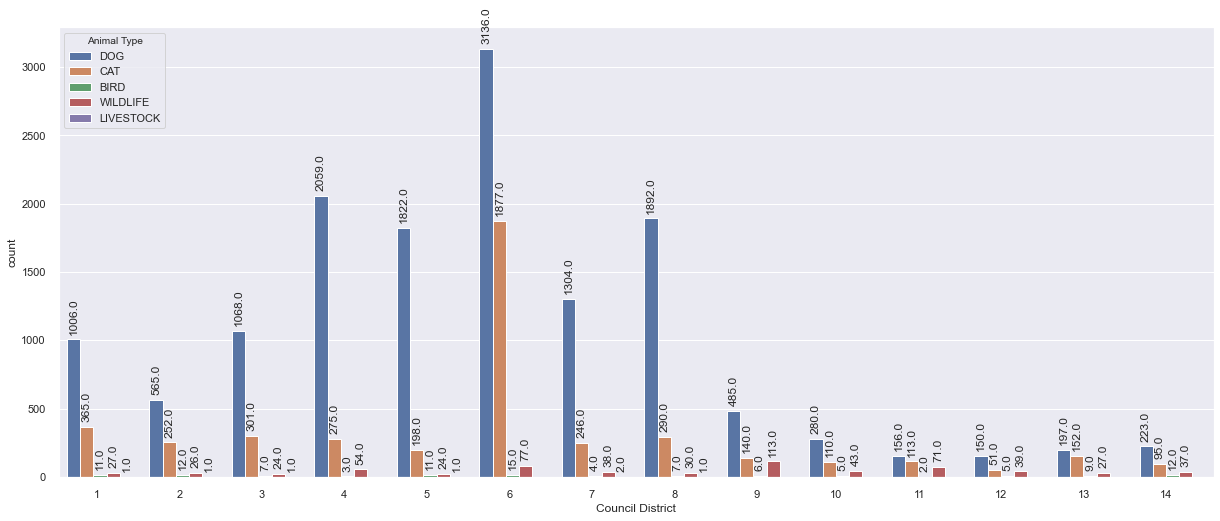

In [1142]:
ax = sns.countplot(data = de, x = 'Council District', hue='Animal Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
add_value_labels(ax, rot=90)

In [1128]:
ca = de.groupby('Council District')['Animal Type'].value_counts()

In [1129]:
ca

Council District  Animal Type
1                 DOG            1006
                  CAT             365
                  WILDLIFE         27
                  BIRD             11
                  LIVESTOCK         1
2                 DOG             565
                  CAT             252
                  WILDLIFE         26
                  BIRD             12
                  LIVESTOCK         1
3                 DOG            1068
                  CAT             301
                  WILDLIFE         24
                  BIRD              7
                  LIVESTOCK         1
4                 DOG            2059
                  CAT             275
                  WILDLIFE         54
                  BIRD              3
5                 DOG            1822
                  CAT             198
                  WILDLIFE         24
                  BIRD             11
                  LIVESTOCK         1
6                 DOG            3136
                  CA

In [1145]:
de['Animal Type'].value_counts(dropna=False)

DOG          16475
CAT           5053
WILDLIFE       646
BIRD           110
LIVESTOCK       15
Name: Animal Type, dtype: int64

In [1144]:
de['Council District'].value_counts(dropna=False)

6.0     5105
NaN     2745
4.0     2391
8.0     2220
5.0     2056
7.0     1594
1.0     1410
3.0     1401
2.0      856
9.0      744
10.0     438
13.0     385
14.0     367
11.0     342
12.0     245
Name: Council District, dtype: int64

In [ ]:
#district 6 not only has more animal impounds than any other, but more cats than any others.

In [ ]:
de.loc

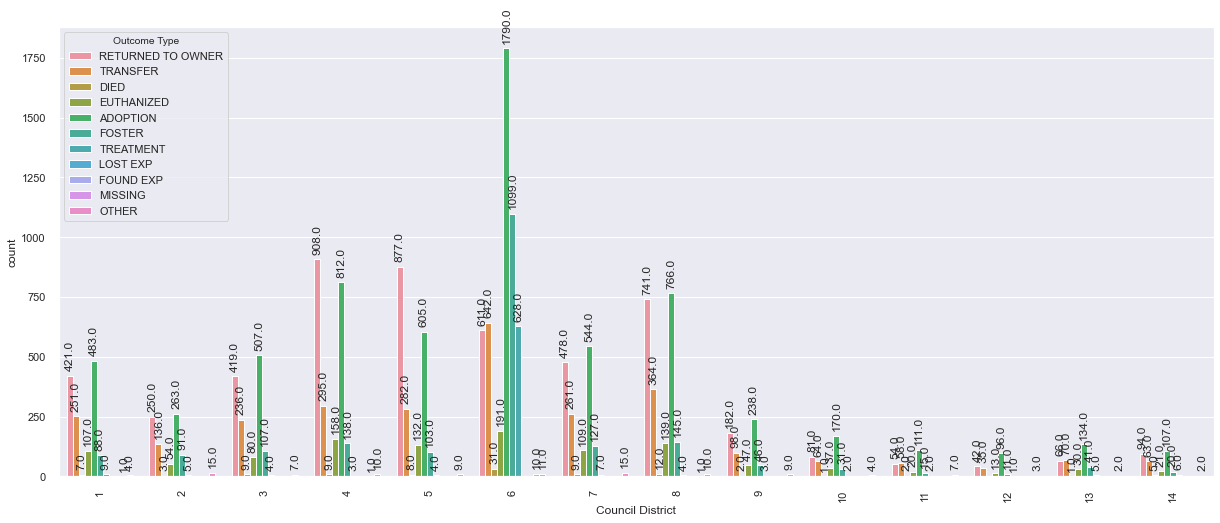

In [1361]:
ax = sns.countplot(data=de, x = 'Council District', hue = 'Outcome Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
add_value_labels(ax, rot=90)

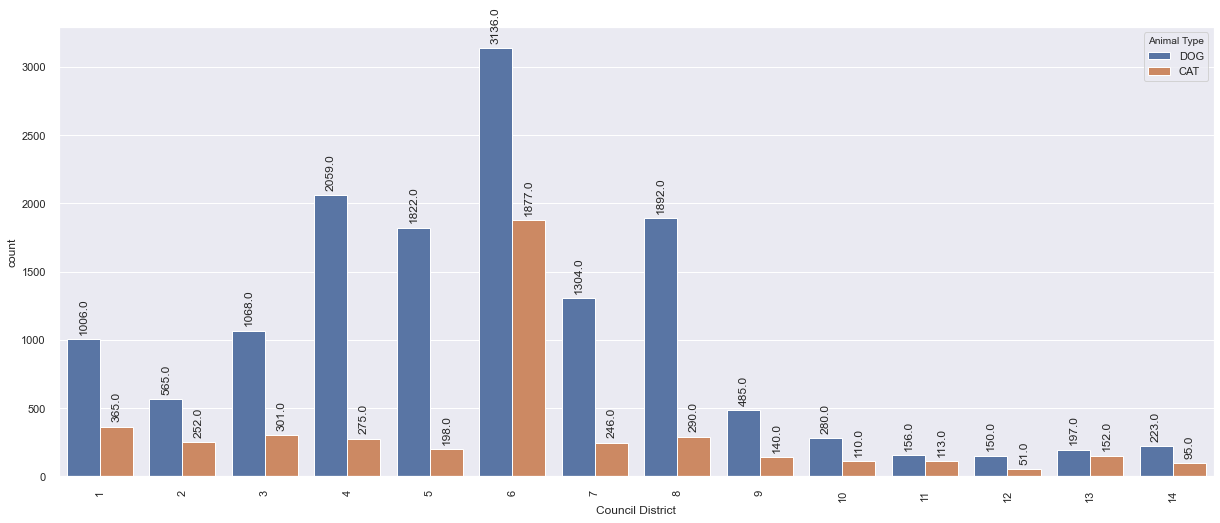

In [1362]:
ax = sns.countplot(data=de, x = 'Council District', hue = 'Animal Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
add_value_labels(ax, rot=90)

In [ ]:
ax = sns.countplot(data=de, x = 'Council District', hue = 'Outcome Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
add_value_labels(ax, rot=45)

In [946]:
df.loc[df['Outcome Type'] == 'DISPOSAL']

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
10192  A1099558         DOG         PIT BULL       FREEZER   UNAVAILABLE   
13589  A1099578    WILDLIFE          OPOSSUM     RECEIVING     IMPOUNDED   
15609  A1098188         DOG            BOXER       FREEZER   UNAVAILABLE   
16010  A1098856         CAT      DOMESTIC SH       FREEZER     IMPOUNDED   
18745  A1097127         CAT      DOMESTIC SH       FREEZER   UNAVAILABLE   
19747  A1099552         CAT      DOMESTIC SH       FREEZER     IMPOUNDED   
19818  A1099818         DOG       ROTTWEILER       FREEZER   UNAVAILABLE   
19826  A1013893    WILDLIFE         REX-MINI       FREEZER   UNAVAILABLE   
19926  A1093927         DOG         PIT BULL       FREEZER   UNAVAILABLE   
20562  A1099303         CAT      DOMESTIC SH       FREEZER   UNAVAILABLE   
20929  A1100006         DOG         PIT BULL       FREEZER   UNAVAILABLE   
20934  A1100005        BIRD          CHICKEN       FREEZER   UNAVAILABLE   
20991  A1097804         DOG     CHIHUAHUA SH       FREEZER   UNAVAILABLE   
20995  A1097807         DOG     CHIHUAHUA SH       FREEZER   UNAVAILABLE   
21035  A1098395         CAT      DOMESTIC SH          DEAD   UNAVAILABLE   
21036  A1099244         DOG  NORFOLK TERRIER     RECEIVING   UNAVAILABLE   
21069  A1100126         CAT      DOMESTIC SH     RECEIVING   UNAVAILABLE   
21129  A1096828         DOG     CHIHUAHUA SH          DEAD     IMPOUNDED   
21836  A1100506         DOG    GERM SHEPHERD       FREEZER   UNAVAILABLE   
22487  A1100889    WILDLIFE           FERRET       FREEZER   UNAVAILABLE   

      Activity Number  Activity Sequence Source Id Census Tract  \
10192      A20-219353                  1  P9991715        17101   
13589      A20-219469                  1  P0924407          300   
15609             NaN                  1  P0921567          NaN   
16010             NaN                  1  P0735750         4500   
18745      A20-214962                  1  P0775086          NaN   
19747      A20-219338                  1  P9991778         2400   
19818             NaN                  1  P0924811         9105   
19826             NaN                  1  P0689504          NaN   
19926      A20-210354                  1  P0916104        20500   
20562             NaN                  1  P0664864         4600   
20929      A20-220571                  1  P9991765         3901   
20934      A20-220563                  1  P9998451         9000   
20991             NaN                  1  P0880355         6800   
20995             NaN                  1  P0921147          NaN   
21035             NaN                  1  P0664864         4600   
21036      A20-218322                  1  P0923475        16520   
21069      A20-220915                  1  P9991770        10601   
21129             NaN                  1  P0919952         7102   
21836             NaN                  1  P0577597        10701   
22487             NaN                  1  P0883547        20500   

      Council District      Intake Type Intake Subtype  Intake Total  \
10192                8      CONFISCATED            SAC             1   
13589               14         WILDLIFE     NON-RABIES             1   
15609              NaN  OWNER SURRENDER        GENERAL             1   
16010                1       DISPOS REQ            ARC             1   
18745              NaN  OWNER SURRENDER            OTC             1   
19747                2         KEEPSAFE          OTHER             1   
19818                5       DISPOS REQ            OTC             1   
19826              NaN  OWNER SURRENDER        GENERAL             1   
19926                6  OWNER SURRENDER          FIELD             1   
20562                1       DISPOS REQ            ARC             1   
20929                7      CONFISCATED            SAC             1   
20934                5            STRAY       AT LARGE             1   
20991                1       DISPOS REQ            ARC           

In [1371]:
cout = de.groupby('Council District')['Outcome_Days'].mean()

In [1372]:
cout.mean()

4.690015803314945

In [1373]:
de['Outcome_Days'].mean()

5.606001486436269

In [1374]:
cout

Council District
1     4.114515
2     4.088127
3     4.534697
4     5.251500
5     4.160396
6     2.727907
7     4.982581
8     4.520165
9     5.339200
10    5.584615
11    4.832714
12    4.661692
13    5.833811
14    5.028302
Name: Outcome_Days, dtype: float64

In [1375]:
cou = pd.Series.to_frame(cout)

In [1376]:
cou = cou.reset_index()

In [1377]:
cou

Council District  Outcome_Days
0                  1      4.114515
1                  2      4.088127
2                  3      4.534697
3                  4      5.251500
4                  5      4.160396
5                  6      2.727907
6                  7      4.982581
7                  8      4.520165
8                  9      5.339200
9                 10      5.584615
10                11      4.832714
11                12      4.661692
12                13      5.833811
13                14      5.028302

<AxesSubplot:xlabel='Council District', ylabel='Outcome_Days'>

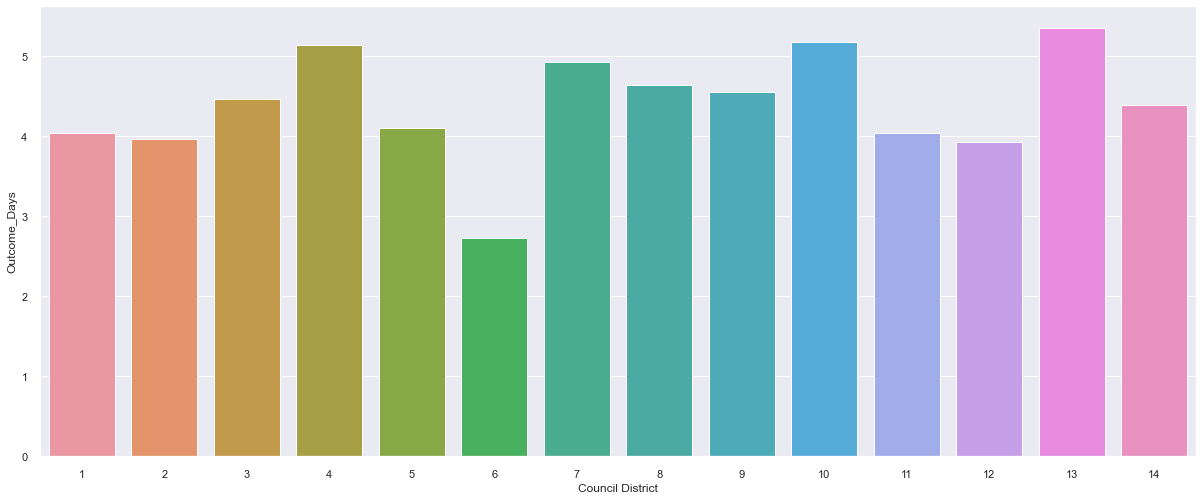

In [1203]:
sns.barplot(data = cou, x='Council District', y='Outcome_Days')

In [1368]:
ccost = de.groupby('Council District')['cost_of_care'].mean()

In [1369]:
ccost

Council District
1     214.155164
2     213.133170
3     230.428809
4     258.190578
5     215.932139
6     160.451855
7     247.775348
8     229.865990
9     261.587216
10    271.092154
11    241.971004
12    235.347313
13    280.743496
14    249.546132
Name: cost_of_care, dtype: float64

In [1370]:
ccost.mean()

236.44431206238784

In [1367]:
de['cost_of_care'].mean()

271.92043756964574

In [1193]:
ccos = pd.Series.to_frame(ccost)

In [1194]:
ccos = ccos.reset_index()

In [1200]:
ccos

Council District  cost_of_care
0                  1    211.203277
1                  2    208.362640
2                  3    228.048330
3                  4    254.070790
4                  5    213.977286
5                  6    160.634182
6                  7    245.777290
7                  8    234.632811
8                  9    231.063145
9                 10    255.700822
10                11    211.192193
11                12    206.874531
12                13    262.433039
13                14    224.705450

<AxesSubplot:xlabel='Council District'>

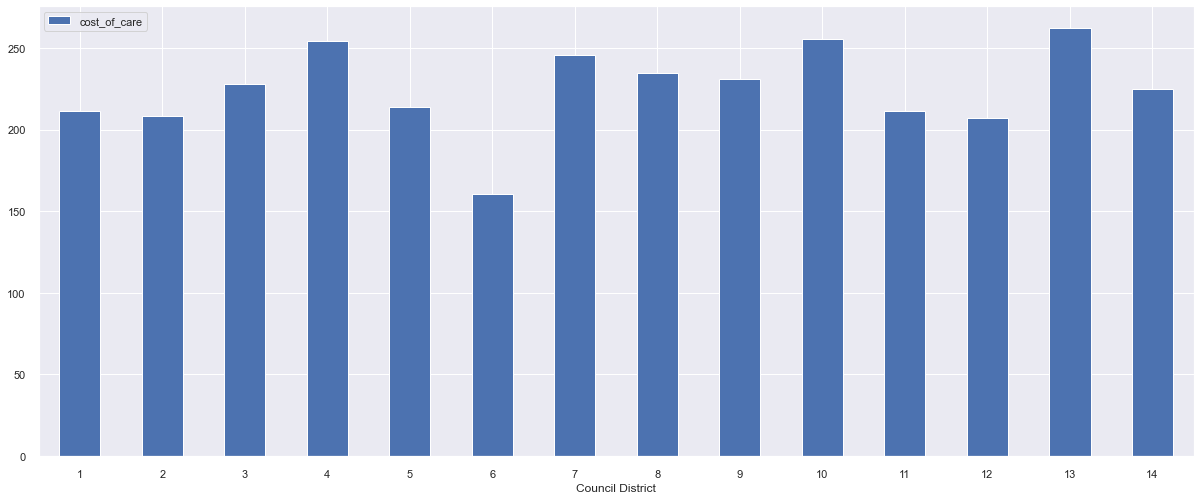

In [1195]:
ccos.plot.bar(rot=0, x='Council District')

<AxesSubplot:xlabel='Council District', ylabel='cost_of_care'>

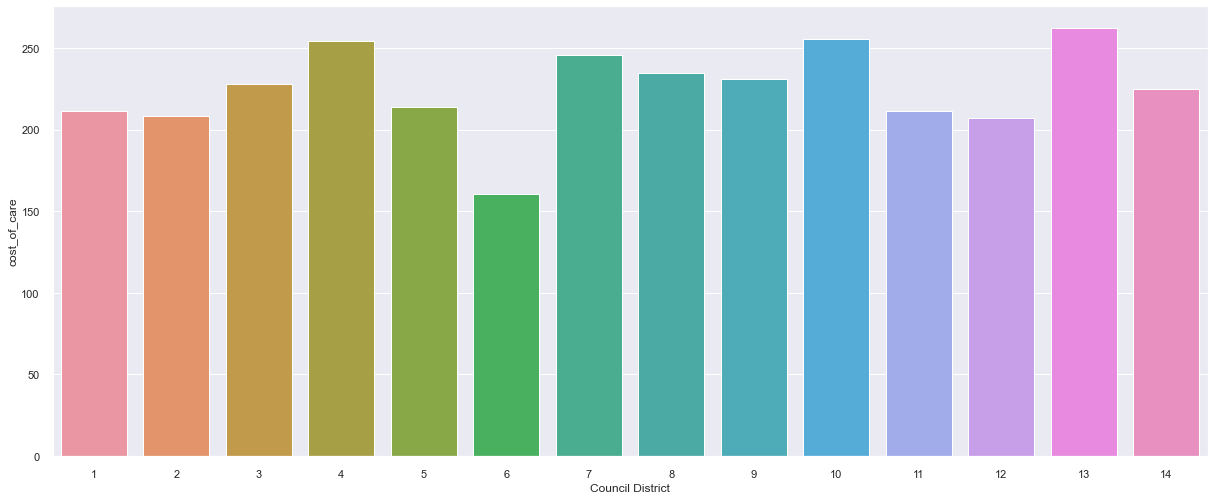

In [1201]:
sns.barplot(data = ccos, x='Council District', y='cost_of_care')

In [ ]:
#council 6 has the most animal impounds, but also has a high number of adoptions.
#What are the adoption rates per district?

In [ ]:
#i need to find the number of animals that 6 has received, and then divide by adoption outcomes....

In [ ]:
#Also, do i want to get rid of other types of animals?  Yeah, they're not significant

In [ ]:
#how to get there
#separate entries by council district, there appear to be 14
#get countplots of them



### Council District 1

In [1098]:
c1.head(25)

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
2    A0458972         DOG        CATAHOULA     RECEIVING   UNAVAILABLE   
4    A0565586         DOG    SILKY TERRIER       LFD 119   UNAVAILABLE   
33   A0706302         DOG        DACHSHUND     RECEIVING     IMPOUNDED   
46   A0747126         DOG   SIBERIAN HUSKY     RECEIVING   UNAVAILABLE   
57   A0763188         DOG    GERM SHEPHERD       LFD 042     IMPOUNDED   
59   A0765847         DOG  AUST CATTLE DOG         ID20A     IMPOUNDED   
72   A0785507         DOG         PIT BULL     RECEIVING   UNAVAILABLE   
73   A0792430         DOG    LABRADOR RETR         VIP25   UNAVAILABLE   
105  A0864327         DOG    GERM SHEPHERD         DC 05   UNAVAILABLE   
112  A0871227         DOG    GERM SHEPHERD     RECEIVING   UNAVAILABLE   
115  A0875590         DOG    GERM SHEPHERD     RECEIVING     IMPOUNDED   
116  A0876148         DOG     AMER BULLDOG       LFD 155     IMPOUNDED   
117  A0876295         DOG     CHIHUAHUA SH       LFD 112     IMPOUNDED   
139  A0893166         DOG   GREAT PYRENEES     RECEIVING   UNAVAILABLE   
148  A0906308         DOG    CAIRN TERRIER      PSDOG 20   UNAVAILABLE   
155  A0914552         DOG            BOXER     RECEIVING     IMPOUNDED   
159  A0919924         DOG  AM PIT BULL TER        AD 062   UNAVAILABLE   
167  A0931957         DOG  AM PIT BULL TER         QD 08           LAB   
184  A0939585         DOG  AM PIT BULL TER        PCD 17           LAB   
194  A1091501         DOG    GERM SHEPHERD         DC 13     IMPOUNDED   
224  A1092223         DOG    GERM SHEPHERD         DC 10   UNAVAILABLE   
246  A0971838         DOG    GERM SHEPHERD       FREEZER   UNAVAILABLE   
254  A0977525         DOG          MASTIFF       LFD 075   UNAVAILABLE   
255  A0978487         DOG         PIT BULL         DC 04     IMPOUNDED   
256  A0978686         DOG         PIT BULL     RECEIVING     IMPOUNDED   

    Activity Number  Activity Sequence Source Id Census Tract  \
2        A19-195601                  1  P9991718         4600   
4               NaN                  1  P0890077         6900   
33       A19-197003                  1  P9991723         6200   
46       A19-199722                  1  P9991721         6200   
57              NaN                  1  P0905706         4700   
59       A19-196340                  1  P9991704         5300   
72       A19-196707                  1  P9991184         5100   
73              NaN                  1  P0068529         4600   
105      A19-197989                  1  P0905615         4500   
112      A19-198787                  1  P9991721         6501   
115      A19-196509                  1  P9991776         5100   
116             NaN                  1  P0606864         5300   
117             NaN                  1  P0691380         4201   
139      A19-198620                  1  P9991721         4500   
148      A19-195992                  1  P0708188         6302   
155      A19-198612                  1  P9991776         5200   
159             NaN                  1  P0910295         4700   
167      A19-203369                  1  P0567277         5300   
184             NaN                  1  P0735226         6402   
194      A19-206752                  1  P9991774         6302   
224      A19-207745                  1  P0913683         6401   
246             NaN                  1  P0767966         6700   
254             NaN                  1  P0905004         4201   
255      A19-198667                  1  P9991730         6700   
256      A19-196557                  1  P9991695         6302   

    Council District      Intake Type        Intake Subtype  Intake Total  \
2                  1            STRAY              AT LARGE             1   
4                  1            STRAY              AT LARGE             1   
33                 1            STRAY              CONFINED             1   
46                 1            STRAY              AT LARGE             1   
57 

In [1146]:
c1out = c1.Outcome_Days.mean()

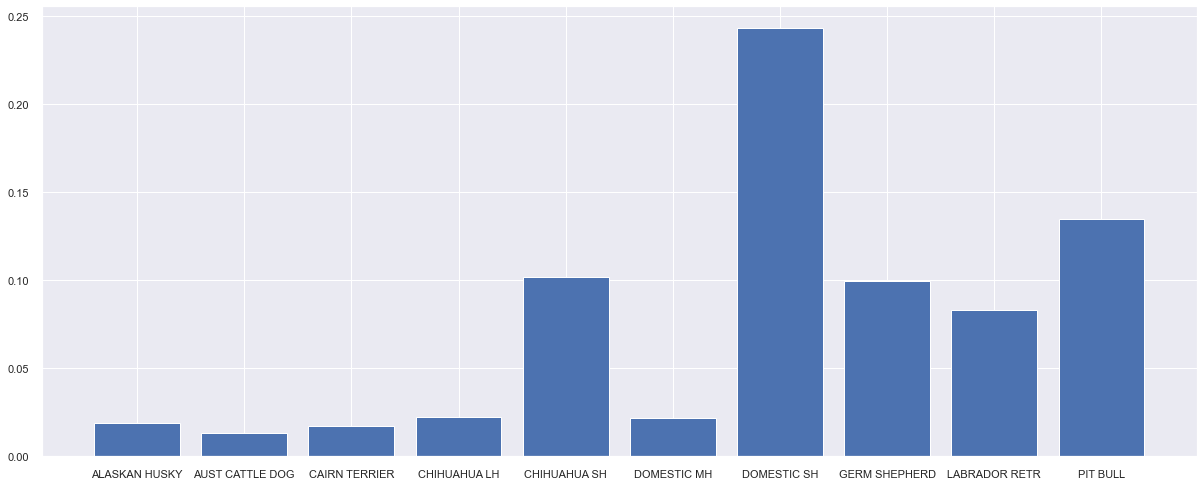

In [968]:
plt.bar(*zip(*sorted(jee.items())))
# plt.xticks(rotation=90)
plt.show()

In [1354]:
def breads(ant):
    outcomemean = c1.Outcome_Days.mean()
    a = ant.groupby(['Animal Breed']).size()
    means = {}
    jee = {} 
    for index, value in a.items():
        means.update({index: value/c1.shape[0]})
    
    moon = nlargest(10, means, key = means.get)
    for val in moon: 
        jee.update({val: means.get(val)})
    
    bread = pd.DataFrame.from_dict(means, orient='index', columns=['Breed_Percentage'])

    
    plt.bar(*zip(*sorted(jee.items())))
    
    plt.xticks(rotation=80)
    plt.show()
    
    return bread

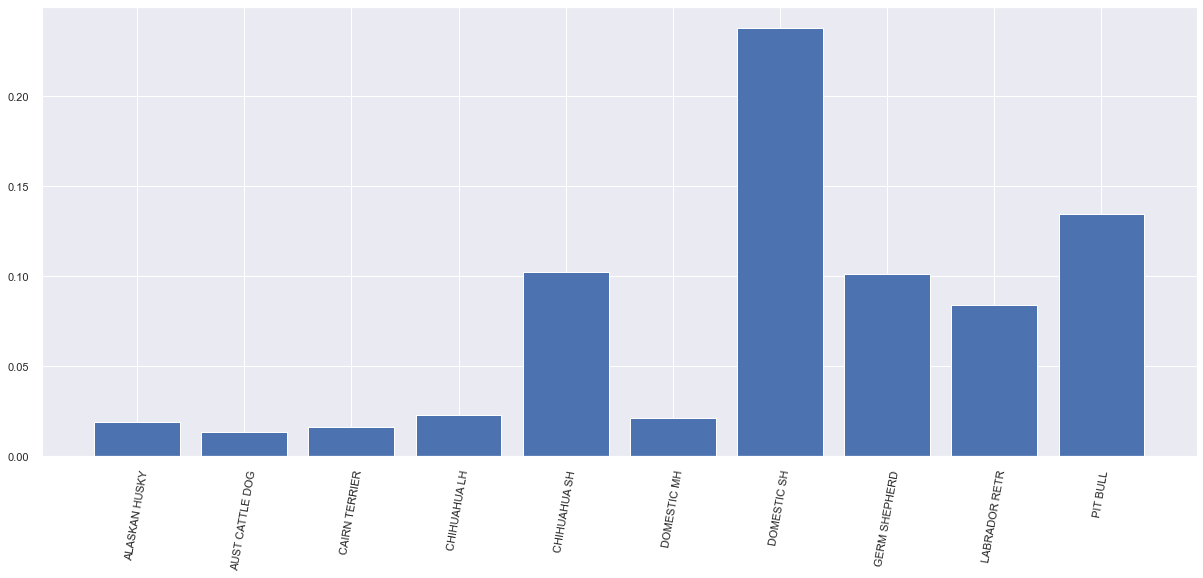

In [1355]:
c1breed = breads(c1)

In [1347]:
c1breed

Breed_Percentage
AKITA                    0.001459
ALASK MALAMUTE           0.000729
ALASKAN HUSKY            0.018964
AM PIT BULL TER          0.011670
AMER BULLDOG             0.002918
AMER ESKIMO              0.000729
AMERICAN STAFF           0.002918
ANATOL SHEPHERD          0.000729
AUST CATTLE DOG          0.013129
AUST SHEPHERD            0.007294
AUST TERRIER             0.001459
BASENJI                  0.000729
BASSET HOUND             0.004376
BEAGLE                   0.005106
BEARDED COLLIE           0.001459
BELG MALINOIS            0.000729
BELG TERVUREN            0.000729
BICHON FRISE             0.003647
BLACK MOUTH CUR          0.005106
BLACK/TAN HOUND          0.000729
BLOODHOUND               0.000729
BLUETICK HOUND           0.000729
BORDER COLLIE            0.005106
BOSTON TERRIER           0.002918
BOXER                    0.010212
BRITTANY                 0.001459
BULL TERRIER             0.005835
BULLMASTIFF              0.000729
CAIRN TERRIER            0.016047
CATAHOULA                0.002188
CHIHUAHUA LH             0.022611
CHIHUAHUA SH             0.102115
CHINESE CRESTED          0.000729
CHINESE SHARPEI          0.002918
CHOW CHOW                0.002918
COCKER SPAN              0.000729
COLLIE ROUGH             0.001459
COLLIE SMOOTH            0.000729
DACHSHUND                0.008753
DACHSHUND LH             0.000729
DOBERMAN PINSCH          0.005835
DOGO ARGENTINO           0.000729
DOMESTIC LH              0.002188
DOMESTIC MH              0.021152
DOMESTIC SH              0.237783
ENG BULLDOG              0.001459
ENG SETTER               0.000729
ENG SHEPHERD             0.000729
FOX TERR WIRE            0.001459
FRENCH BULLDOG           0.000729
GERM SHEPHERD            0.101386
GOLDEN RETR              0.000729
GREAT PYRENEES           0.005835
LABRADOR RETR            0.083880
LHASA APSO               0.002918
MAINE COON               0.001459
MALTESE                  0.011670
MASTIFF                  0.002918
MIN PINSCHER             0.002918
NORFOLK TERRIER          0.000729
PAPILLON                 0.002918
PARSON RUSS TER          0.005106
PEKINGESE                0.002918
PIT BULL                 0.134209
POINTER                  0.000729
POMERANIAN               0.003647
POODLE MIN               0.009482
POODLE STND              0.000729
PUG                      0.005835
RAT TERRIER              0.005106
ROTTWEILER               0.012400
SC WHEAT TERR            0.001459
SCHNAUZER MIN            0.003647
SCHNAUZER STAND          0.000729
SHETLD SHEEPDOG          0.000729
SHIBA INU                0.000729
SHIH TZU                 0.010941
SIAMESE                  0.003647
SIBERIAN HUSKY           0.008023
SILKY TERRIER            0.001459
ST BERNARD RGH           0.000729
STAFFORDSHIRE            0.008023
WEIMARANER               0.002918
WELSH CORGI CAR          0.003647
WELSH TERRIER            0.000729
WEST HIGHLAND            0.000729
YORKSHIRE TERR           0.007294

In [ ]:
#what am i trying to do here.  I'm trying to get percentages and store them in a dataframe.

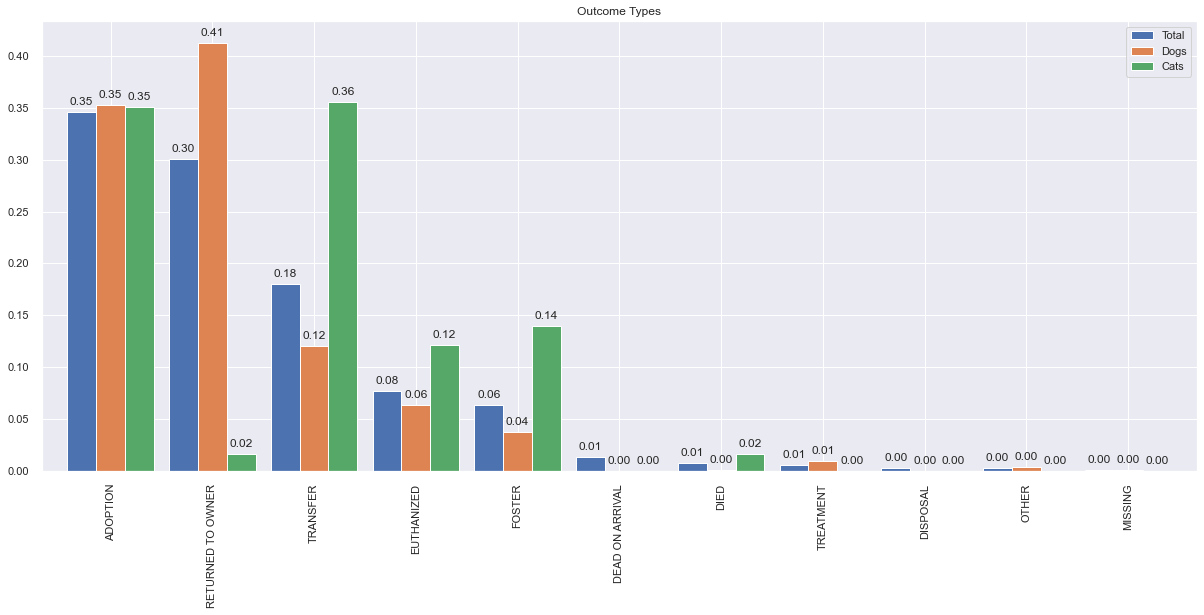

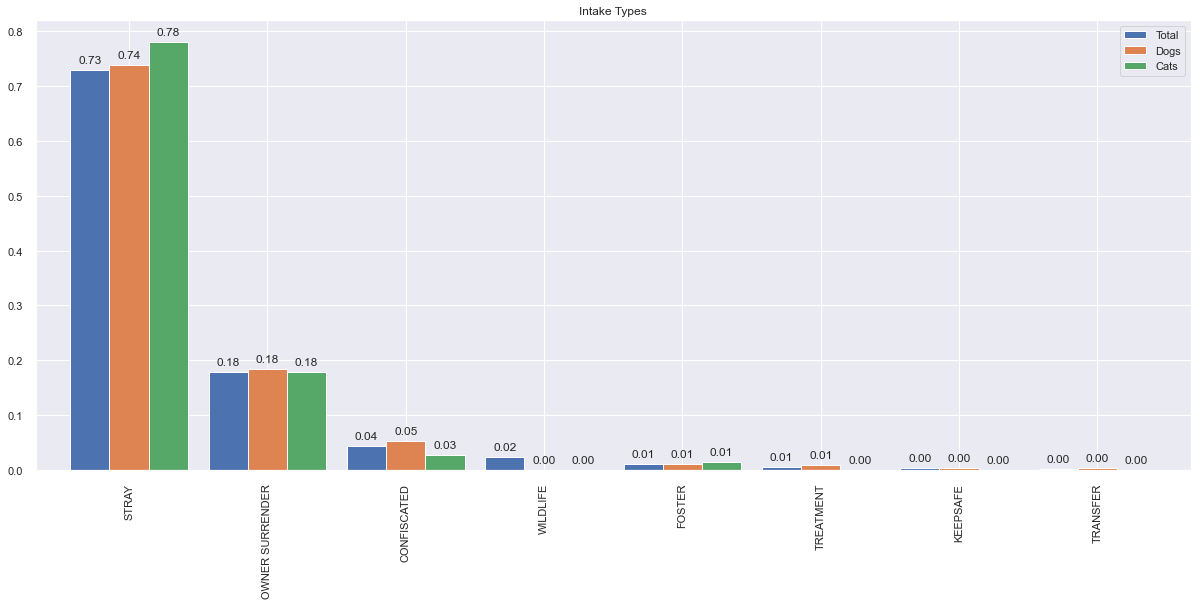

In [970]:
cou1, c1i= runpercs(c1)

In [879]:
c1.Outcome_Days.mean()

3.9749303621169916

<AxesSubplot:xlabel='Month', ylabel='count'>

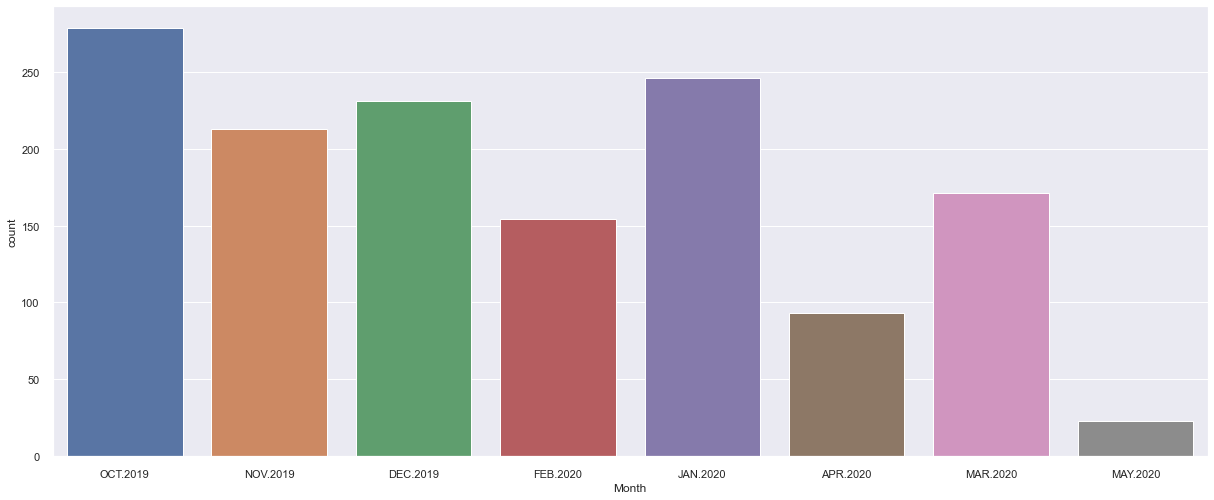

In [1030]:
sns.countplot(c1['Month'])

In [1096]:
c1.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    156.414194
DEC.2019    221.624026
FEB.2020    209.468506
JAN.2020    206.571220
MAR.2020    151.285263
MAY.2020     68.271304
NOV.2019    247.540845
OCT.2019    246.645376
Name: cost_of_care, dtype: float64

In [ ]:
c6.groupby(by = 'Month')['Intake Type'].value_counts()

### Council District 2

In [518]:
c2.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
1   A0442587         DOG    TERRIER MIX       FREEZER     IMPOUNDED   
17  A0651053         DOG   CHIHUAHUA SH     RECEIVING     IMPOUNDED   
34  A0710058         DOG        PITBULL         QD 23   UNAVAILABLE   
53  A0757909         DOG  GERM SHEPHERD        LAB 01           LAB   
65  A0774765         DOG  BORDER COLLIE     RECEIVING     IMPOUNDED   

   Activity Number  Activity Sequence Source Id Census Tract Council District  \
1              NaN                  1  P0492284         7102                2   
17      A19-196432                  1  P9991772        10000                2   
34      A19-197775                  1  P0572756         2400                2   
53             NaN                  1  P0626682         9802                2   
65      A19-202618                  1  P9991709          406                2   

        Intake Type   Intake Subtype  Intake Total      Reason Staff Id  \
1   OWNER SURRENDER  DEAD ON ARRIVAL             1  OTHRINTAKS      CDM   
17            STRAY         AT LARGE             1       OTHER   RO1772   
34      CONFISCATED       QUARANTINE             1  OTHRINTAKS   AO1781   
53  OWNER SURRENDER          GENERAL             1       OTHER       SK   
65            STRAY         AT LARGE             1       OTHER   MH1709   

   Intake Date Intake Time    Due Out                        Intake Condition  \
1   2019-11-10    14:18:00 2019-11-10                                    DEAD   
17  2019-10-10    07:55:00 2019-10-10  TREATABLE REHABILITABLE NON-CONTAGIOUS   
34  2019-10-19    18:49:00 2019-10-29    UNHEALTHY UNTREATABLE NON-CONTAGIOUS   
53  2019-10-25    12:18:00 2019-10-26  TREATABLE REHABILITABLE NON-CONTAGIOUS   
65  2019-11-23    08:09:00 2019-11-23                                 APP WNL   

   Hold Request       Outcome Type Outcome Subtype Outcome Date Outcome Time  \
1           NaN    DEAD ON ARRIVAL        DISPOSAL   2019-11-10     00:00:00   
17          NaN  RETURNED TO OWNER           FIELD   2019-10-10     07:56:00   
34          NaN  RETURNED TO OWNER         WALK IN   2019-10-29     17:43:00   
53   ADOP RESCU         EUTHANIZED           SPACE   2019-10-31     14:54:00   
65          NaN  RETURNED TO OWNER           FIELD   2019-11-23     08:10:00   

   Receipt Number Impound Number Service Request Number  \
1             NaN     K19-486954                    NaN   
17            NaN     K19-482941                    NaN   
34     R19-558089     K19-484201                    NaN   
53            NaN     K19-484902                    NaN   
65            NaN     K19-488497                    NaN   

                         Outcome Condition Chip Status     Animal Origin  \
1                                     DEAD   SCAN CHIP  OVER THE COUNTER   
17  TREATABLE REHABILITABLE NON-CONTAGIOUS   SCAN CHIP             SWEEP   
34    UNHEALTHY UNTREATABLE NON-CONTAGIOUS   SCAN CHIP             FIELD   
53  TREATABLE REHABILITABLE NON-CONTAGIOUS   SCAN CHIP  OVER THE COUNTER   
65                                 APP WNL   SCAN CHIP             SWEEP   

   Additional Information     Month  
1                     NaN  NOV.2019  
17                    NaN  OCT.2019  
34      RETURNED TO OWNER  OCT.2019  
53                    NaN  OCT.2019  
65                    NaN  NOV.2019

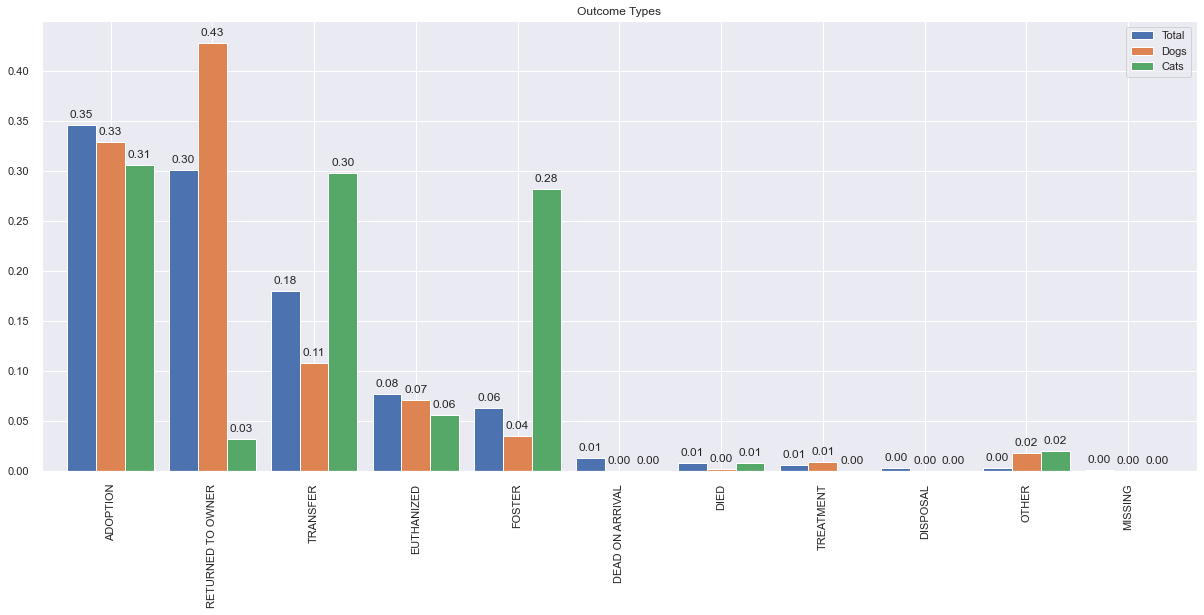

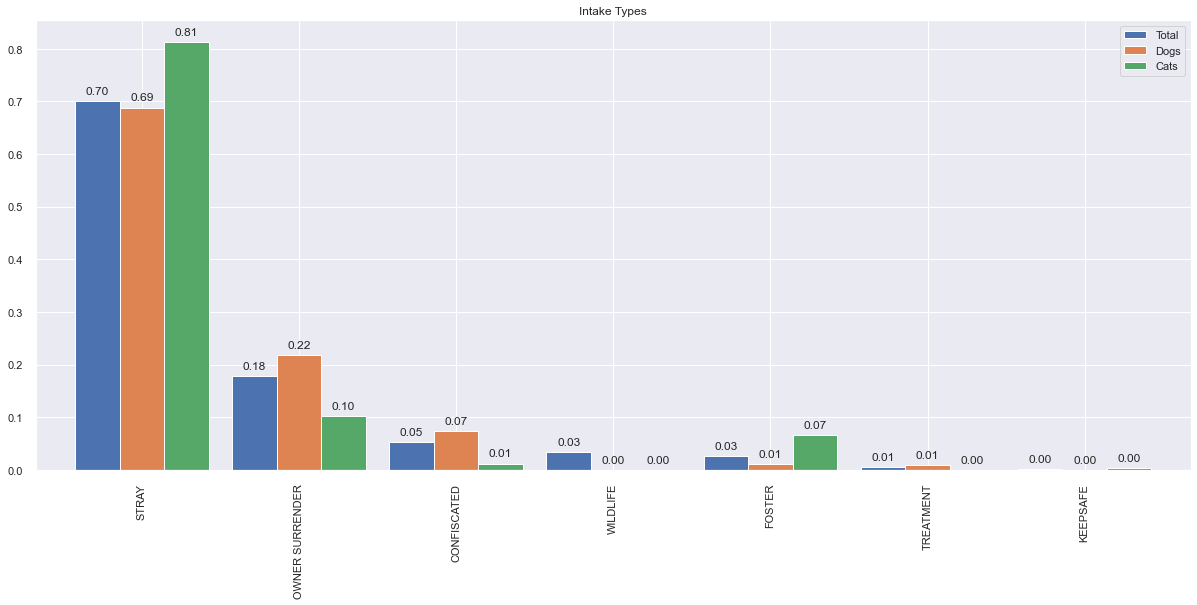

In [971]:
cou2, c2i = runpercs(c2)

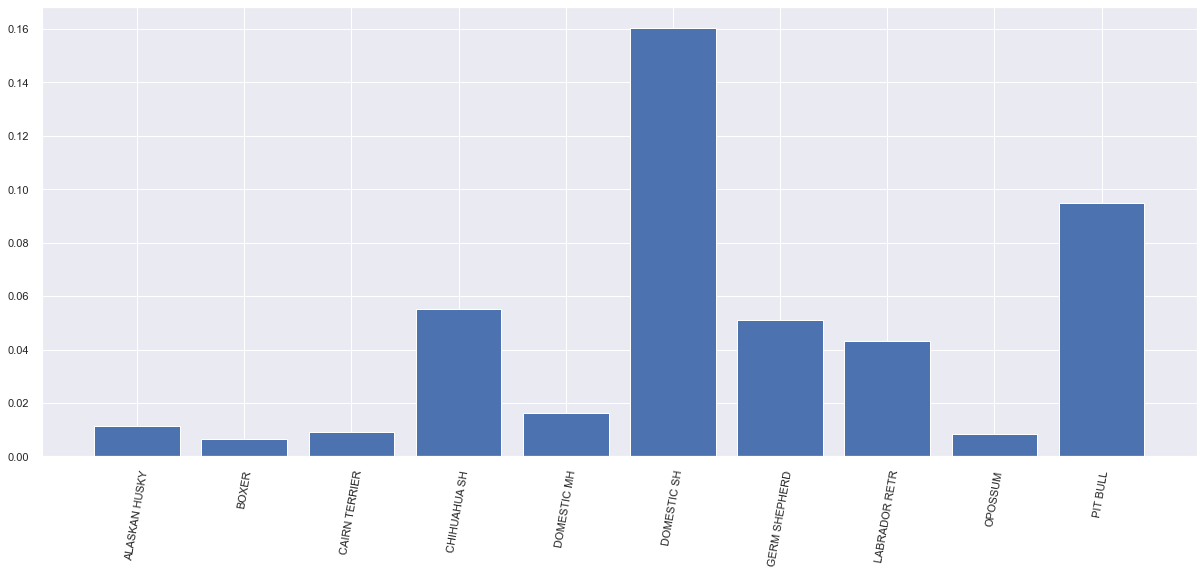

In [972]:
c2breed = breads(c2)

In [1147]:
c2out = c2.Outcome_Days.mean()

<AxesSubplot:xlabel='Month', ylabel='count'>

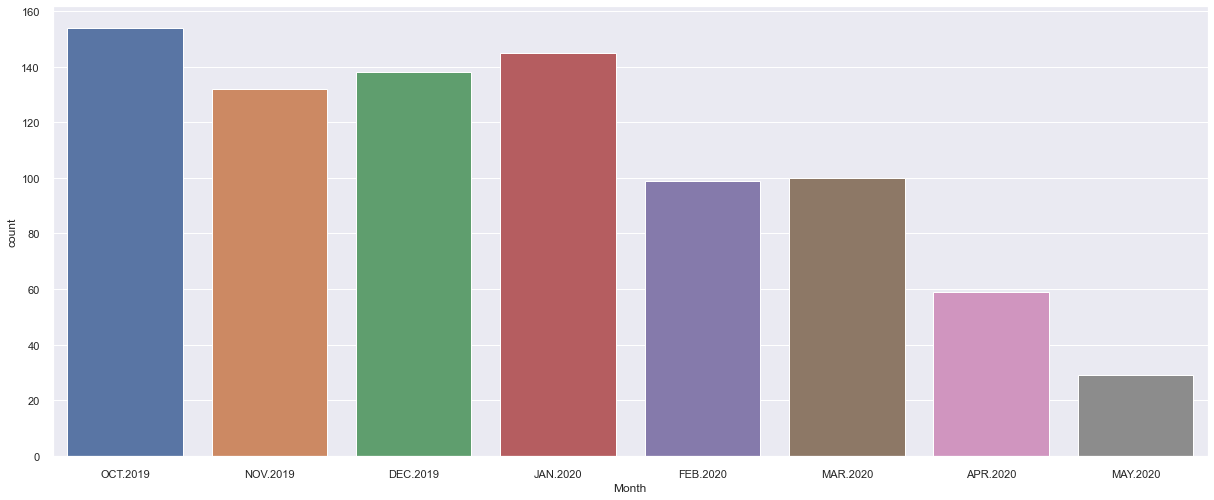

In [1029]:
sns.countplot(c2['Month'])

In [1099]:
c2.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    111.910339
DEC.2019    223.191304
FEB.2020    194.071515
JAN.2020    218.267310
MAR.2020    185.320100
MAY.2020     28.089655
NOV.2019    208.546364
OCT.2019    280.641169
Name: cost_of_care, dtype: float64

### Council District 3

In [529]:
c3.head()

Animal Id Animal Type    Animal Breed Kennel Number Kennel Status  \
31  A0705276         DOG      POMERANIAN     RECEIVING   UNAVAILABLE   
35  A0712121         DOG   GERM SHEPHERD        PCD 03   UNAVAILABLE   
45  A1090152         DOG  SIBERIAN HUSKY        AD 085   UNAVAILABLE   
49  A0751471         DOG    CHIHUAHUA SH     RECEIVING   UNAVAILABLE   
64  A0774507         DOG    AMER BULLDOG     RECEIVING   UNAVAILABLE   

   Activity Number  Activity Sequence Source Id Census Tract Council District  \
31      A19-202616                  1  P9991718        11103                3   
35      A19-199266                  1  P0855193        16511                3   
45      A19-204329                  1  P9991765        10803                3   
49      A19-202832                  1  P9991710        11103                3   
64      A19-197415                  1  P9991549        10704                3   

   Intake Type Intake Subtype  Intake Total      Reason Staff Id Intake Date  \
31       STRAY       AT LARGE             1       OTHER   MG1718  2019-11-23   
35       STRAY       AT LARGE             1  OTHRINTAKS   SP1782  2019-10-30   
45       STRAY       AT LARGE             1  OTHRINTAKS   RK1765  2019-12-05   
49       STRAY       AT LARGE             1       OTHER  B1710CV  2019-11-24   
64       STRAY       AT LARGE             1       OTHER   MG1718  2019-10-16   

   Intake Time    Due Out                        Intake Condition  \
31    07:56:00 2019-11-23                                 APP WNL   
35    11:39:00 2019-11-06  TREATABLE REHABILITABLE NON-CONTAGIOUS   
45    15:17:00 2019-12-09                                 APP INJ   
49    14:10:00 2019-11-24                                 APP WNL   
64    17:52:00 2019-10-16  TREATABLE REHABILITABLE NON-CONTAGIOUS   

   Hold Request       Outcome Type Outcome Subtype Outcome Date Outcome Time  \
31          NaN  RETURNED TO OWNER           FIELD   2019-11-23     08:02:00   
35   RESCU ONLY  RETURNED TO OWNER         WALK IN   2019-11-01     13:59:00   
45   ADOP RESCU           ADOPTION         WALK IN   2019-12-29     16:09:00   
49          NaN  RETURNED TO OWNER           FIELD   2019-11-24     14:10:00   
64          NaN  RETURNED TO OWNER           FIELD   2019-10-16     17:53:00   

   Receipt Number Impound Number Service Request Number  \
31            NaN     K19-488496                    NaN   
35     R19-558228     K19-485524                    NaN   
45     R19-561851     K19-489839                    NaN   
49            NaN     K19-488714                    NaN   
64            NaN     K19-483821                    NaN   

                         Outcome Condition     Chip Status Animal Origin  \
31                                 APP WNL  UNABLE TO SCAN         SWEEP   
35  TREATABLE REHABILITABLE NON-CONTAGIOUS  UNABLE TO SCAN         FIELD   
45                                 APP INJ    SCAN NO CHIP         FIELD   
49                                 APP WNL  UNABLE TO SCAN         FIELD   
64  TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP         SWEEP   

   Additional Information     Month  
31                    NaN  NOV.2019  
35      RETURNED TO OWNER  OCT.2019  
45                ADOPTED  DEC.2019  
49                    NaN  NOV.2019  
64                    NaN  OCT.2019

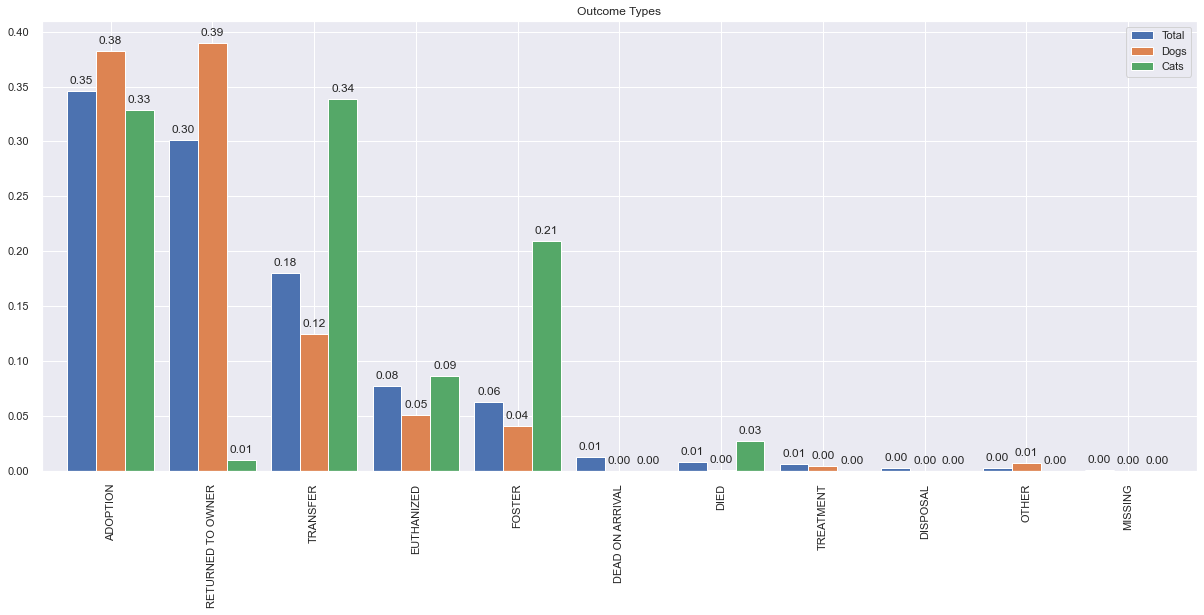

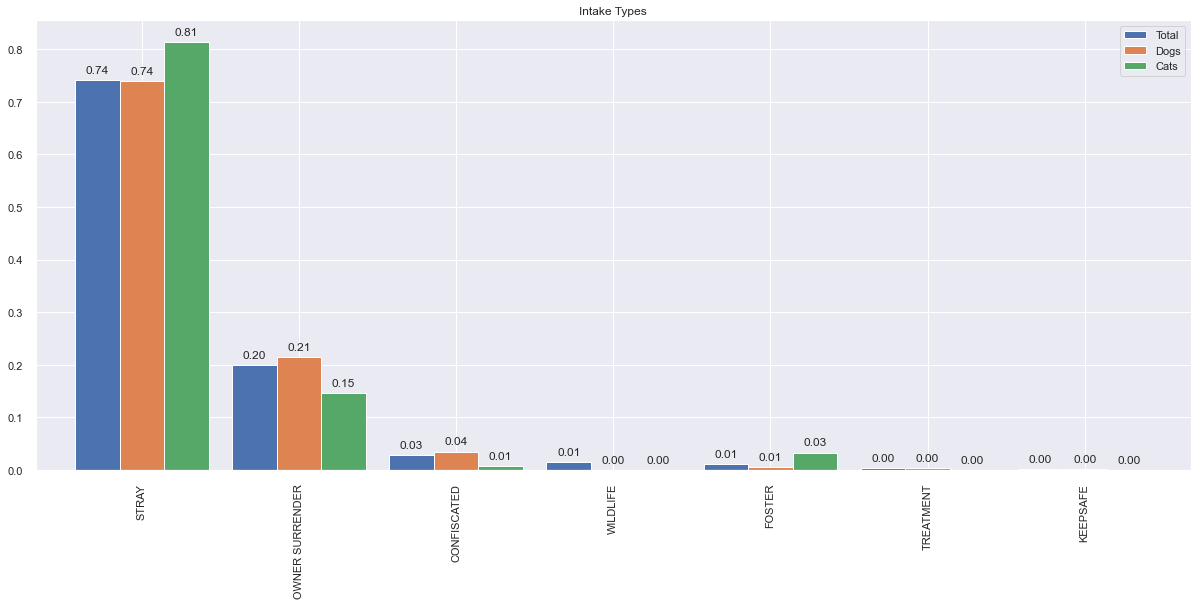

In [974]:
cou3, c3i = runpercs(c3)

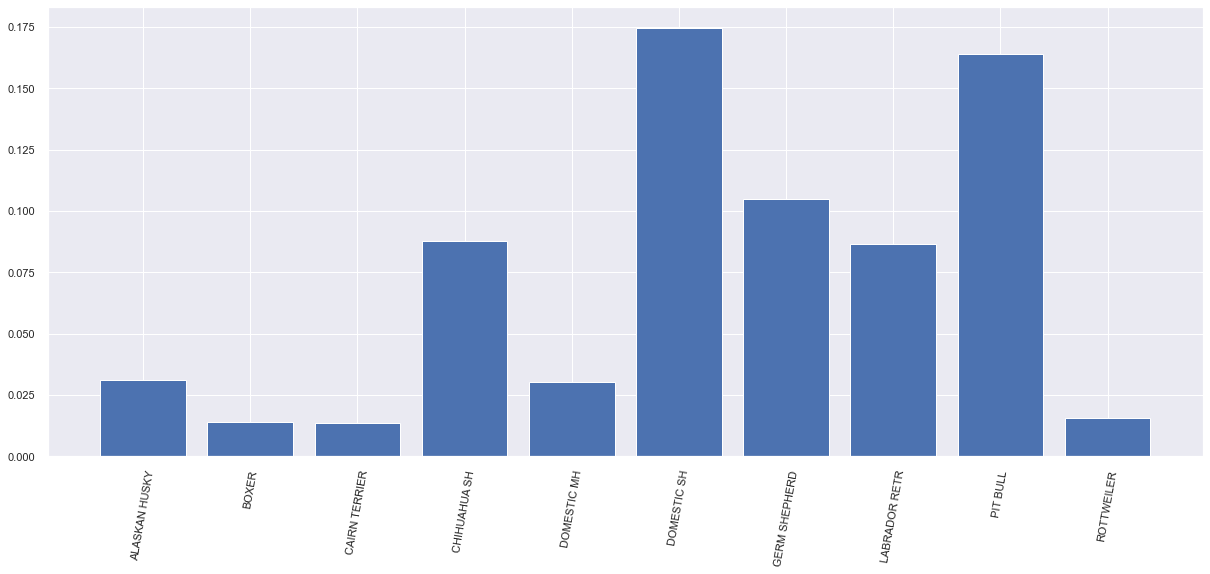

In [975]:
c3breed = breads(c3)

In [ ]:
#stay category

In [1148]:
c3out = c3.Outcome_Days.mean()

<AxesSubplot:xlabel='Month', ylabel='count'>

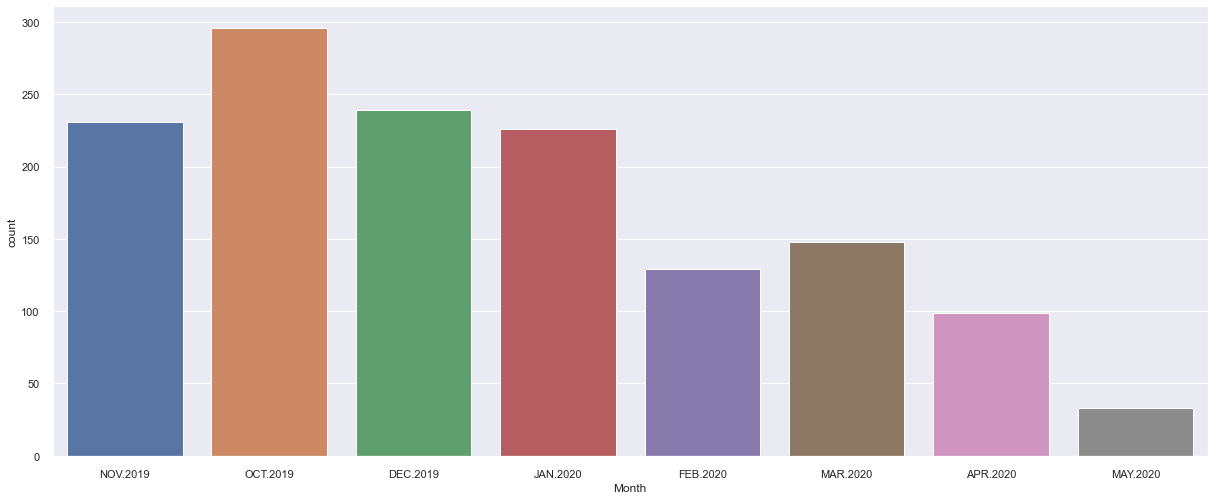

In [1028]:
sns.countplot(c3['Month'])

In [1100]:
c3.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    151.429394
DEC.2019    220.415314
FEB.2020    255.955814
JAN.2020    240.052788
MAR.2020    181.719257
MAY.2020     65.362727
NOV.2019    229.336494
OCT.2019    278.805946
Name: cost_of_care, dtype: float64

### Council District 4

In [531]:
c4.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
0   A0144701         DOG       HAVANESE         VT 12     IMPOUNDED   
7   A0601024         DOG        PITBULL     RECEIVING   UNAVAILABLE   
8   A0601024         DOG        PITBULL        LAB 14           LAB   
9   A0601180         DOG  COLLIE SMOOTH       LFD 076     IMPOUNDED   
14  A1091091         CAT    DOMESTIC SH         VT 06     IMPOUNDED   

   Activity Number  Activity Sequence Source Id Census Tract Council District  \
0              NaN                  1  P0098773         6301                4   
7       A19-197596                  1  P9991721         8701                4   
8       A19-200760                  1  P0556316         8701                4   
9              NaN                  1  P0584572        11002                4   
14      A19-206148                  1  P0911874         8604                4   

        Intake Type Intake Subtype  Intake Total      Reason Staff Id  \
0   OWNER SURRENDER        GENERAL             1  PERSNLISSU      CDM   
7             STRAY       AT LARGE             1       OTHER   MG1718   
8   OWNER SURRENDER        GENERAL             1  PERSNLISSU   EP1751   
9   OWNER SURRENDER       RETURN30             1     MEDICAL       DL   
14            STRAY       CONFINED             1  OTHRINTAKS   AR1758   

   Intake Date Intake Time    Due Out                        Intake Condition  \
0   2019-11-08    15:48:00 2019-11-14                                APP SICK   
7   2019-10-18    15:25:00 2019-10-18  TREATABLE REHABILITABLE NON-CONTAGIOUS   
8   2019-11-10    12:47:00 2019-11-10                                APP SICK   
9   2019-11-06    11:53:00 2019-11-06                                 APP WNL   
14  2019-12-17    10:29:00 2019-12-23                                 APP WNL   

   Hold Request       Outcome Type Outcome Subtype Outcome Date Outcome Time  \
0           NaN  RETURNED TO OWNER         WALK IN   2019-11-09     11:31:00   
7           NaN  RETURNED TO OWNER           FIELD   2019-10-18     15:28:00   
8          EUTH         EUTHANIZED            BITE   2019-11-13     16:34:00   
9           NaN         EUTHANIZED          HUMANE   2019-11-06     12:59:00   
14          RTP  RETURNED TO OWNER       MICROCHIP   2019-12-24     12:52:00   

   Receipt Number Impound Number Service Request Number  \
0      R19-558731     K19-486742                    NaN   
7             NaN     K19-484057                    NaN   
8             NaN     K19-486943                    NaN   
9             NaN     K19-486443                    NaN   
14            NaN     K19-491104                    NaN   

                         Outcome Condition     Chip Status     Animal Origin  \
0                                 APP SICK       SCAN CHIP  OVER THE COUNTER   
7   TREATABLE REHABILITABLE NON-CONTAGIOUS  UNABLE TO SCAN             SWEEP   
8                                  APP WNL       SCAN CHIP             FIELD   
9                                 APP SICK       SCAN CHIP  OVER THE COUNTER   
14                                 APP WNL       SCAN CHIP             FIELD   

   Additional Information     Month  
0       RETURNED TO OWNER  NOV.2019  
7                     NaN  OCT.2019  
8                     NaN  NOV.2019  
9                     NaN  NOV.2019  
14                    NaN  DEC.2019

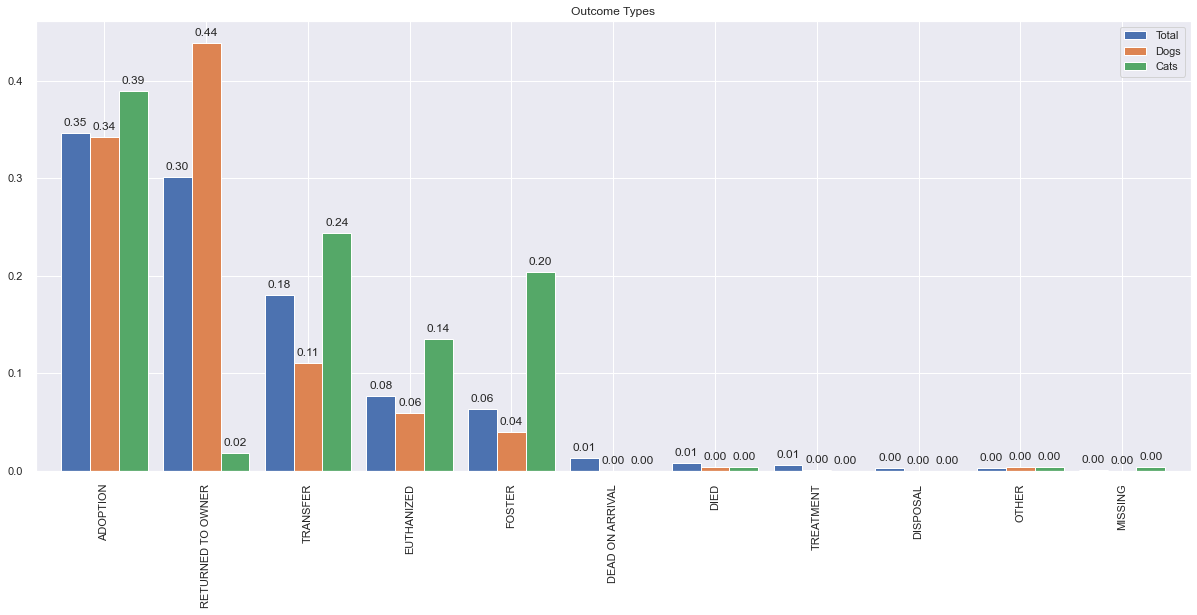

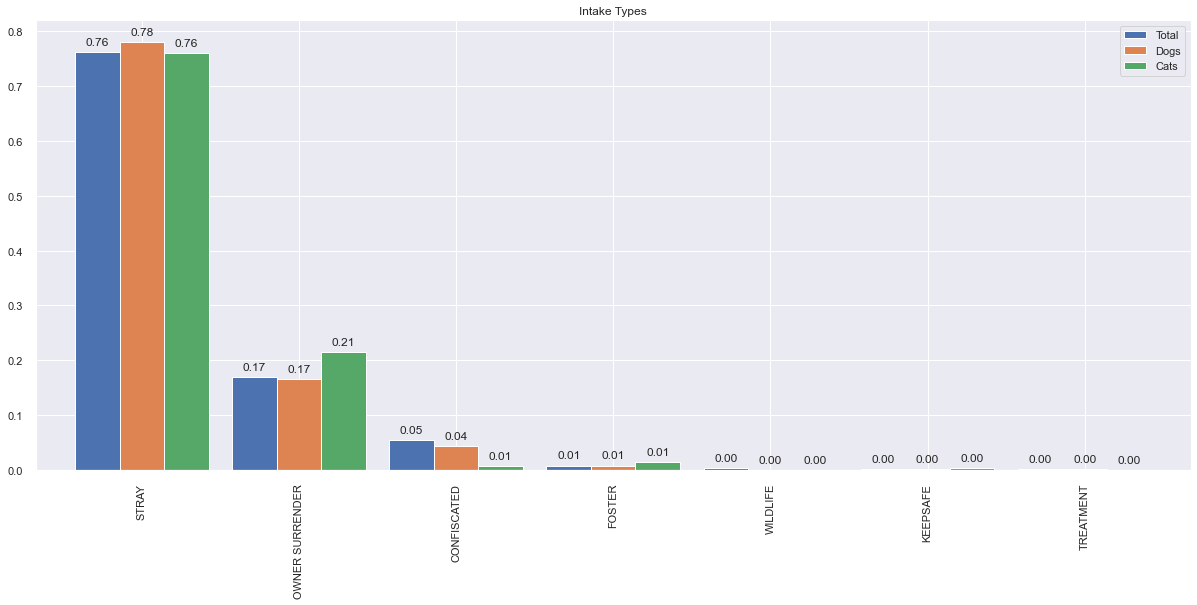

In [977]:
cou4, c4i = runpercs(c4)

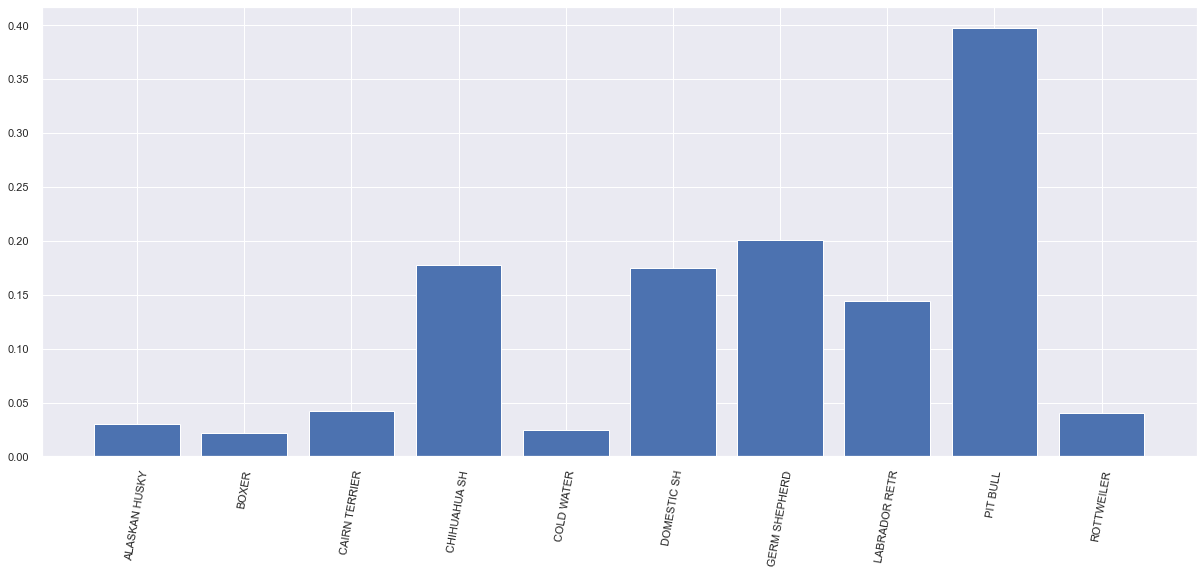

In [978]:
c4breed = breads(c4)

In [1149]:
c4out = c4.Outcome_Days.mean()

<AxesSubplot:xlabel='Month', ylabel='count'>

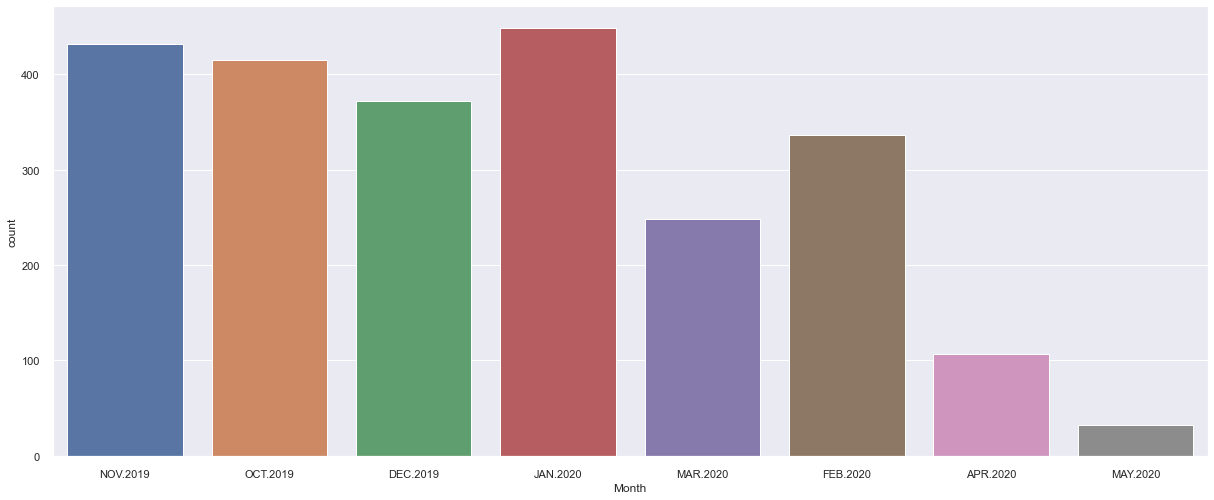

In [1027]:
sns.countplot(c4['Month'])

In [1101]:
c4.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    153.253832
DEC.2019    298.111855
FEB.2020    213.754375
JAN.2020    263.976503
MAR.2020    185.201411
MAY.2020     75.375313
NOV.2019    322.772153
OCT.2019    245.930217
Name: cost_of_care, dtype: float64

### Council District 5

In [533]:
c5.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
5   A0570248         DOG  LABRADOR RETR     RECEIVING     IMPOUNDED   
11  A0626420         DOG  LABRADOR RETR     RECEIVING     IMPOUNDED   
12  A0636173         DOG   CHIHUAHUA SH     RECEIVING     IMPOUNDED   
27  A0695367         DOG          MIXED      INJD 002   UNAVAILABLE   
30  A0698369         DOG       PIT BULL       LFD 146     IMPOUNDED   

   Activity Number  Activity Sequence Source Id Census Tract Council District  \
5       A19-197874                  1  P0820658         8400                5   
11      A19-203605                  1  P9991579         9303                5   
12      A19-199027                  1  P9991704         9201                5   
27             NaN                  1  P0088147         8400                5   
30      A19-200905                  1  P0907430         9105                5   

        Intake Type        Intake Subtype  Intake Total      Reason Staff Id  \
5   OWNER SURRENDER               GENERAL             1     MEDICAL   AK1780   
11            STRAY              AT LARGE             1       OTHER  ASB1579   
12            STRAY              AT LARGE             1       OTHER   SC1704   
27  OWNER SURRENDER  EUTHANASIA REQUESTED             1     MEDICAL       JR   
30            STRAY              AT LARGE             1  OTHRINTAKS   MW1723   

   Intake Date Intake Time    Due Out                        Intake Condition  \
5   2019-10-20    14:48:00 2019-10-20    UNHEALTHY UNTREATABLE NON-CONTAGIOUS   
11  2019-12-01    13:43:00 2019-12-01                                 APP WNL   
12  2019-10-28    12:48:00 2019-11-01  TREATABLE REHABILITABLE NON-CONTAGIOUS   
27  2019-12-07    11:54:00 2019-12-13                                CRITICAL   
30  2019-11-11    14:21:00 2019-11-17                                 APP WNL   

   Hold Request       Outcome Type        Outcome Subtype Outcome Date  \
5       CRUELTY               DIED                ENROUTE   2019-10-21   
11          NaN  RETURNED TO OWNER                  FIELD   2019-12-01   
12          NaN  RETURNED TO OWNER                  FIELD   2019-10-28   
27          NaN         EUTHANIZED  MEDICAL-NONCONTAGIOUS   2019-12-07   
30          NaN  RETURNED TO OWNER                WALK IN   2019-11-11   

   Outcome Time Receipt Number Impound Number Service Request Number  \
5      11:00:00            NaN     K19-484308                    NaN   
11     13:45:00            NaN     K19-489352                    NaN   
12     12:49:00            NaN     K19-485273                    NaN   
27     17:13:00            NaN     K19-490038                    NaN   
30     18:36:00     R19-558919     K19-487071                    NaN   

                         Outcome Condition   Chip Status     Animal Origin  \
5     UNHEALTHY UNTREATABLE NON-CONTAGIOUS     SCAN CHIP             FIELD   
11                                 APP WNL  SCAN NO CHIP             SWEEP   
12  TREATABLE REHABILITABLE NON-CONTAGIOUS  SCAN NO CHIP             SWEEP   
27                                CRITICAL     SCAN CHIP  OVER THE COUNTER   
30                                 APP WNL     SCAN CHIP             FIELD   

   Additional Information     Month  
5                     NaN  OCT.2019  
11                    NaN  DEC.2019  
12                    NaN  OCT.2019  
27                    NaN  DEC.2019  
30      RETURNED TO OWNER  NOV.2019

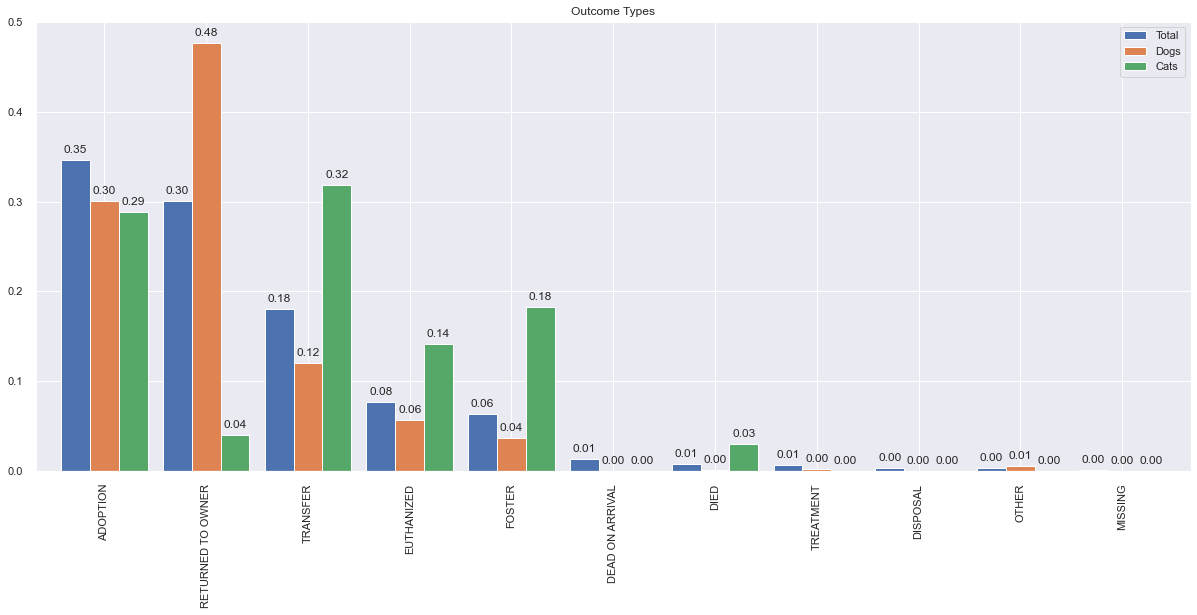

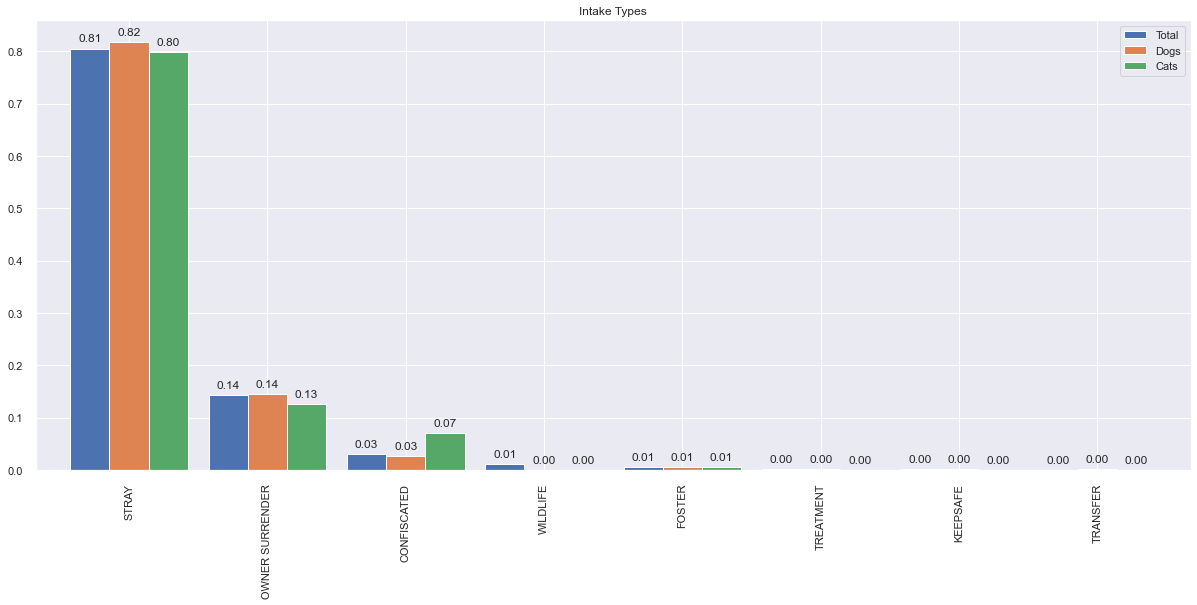

In [980]:
cou5, c5i = runpercs(c5)

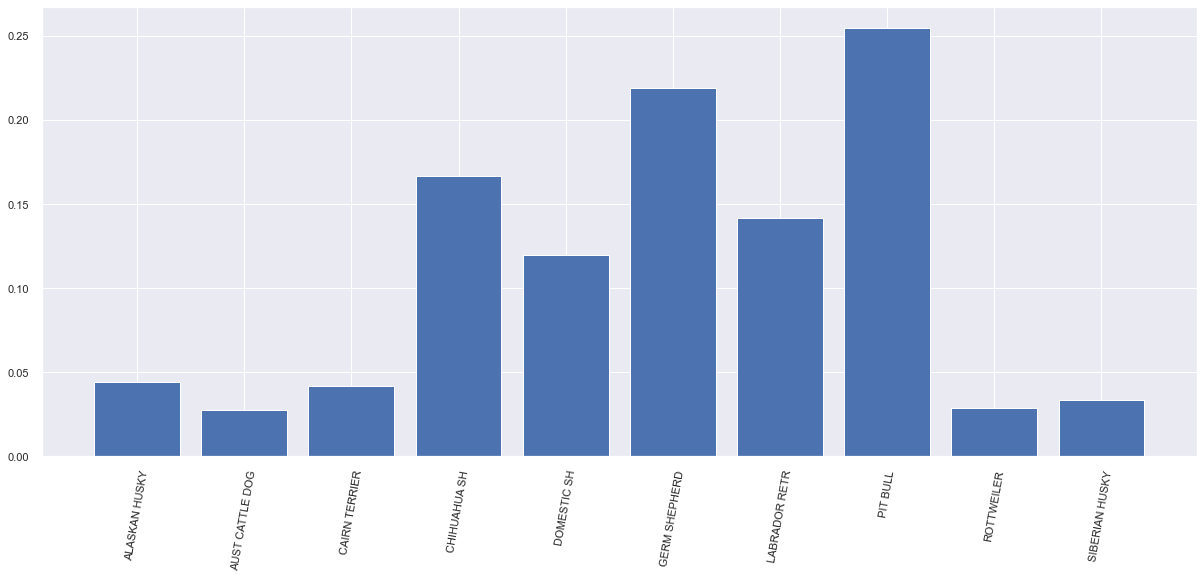

In [981]:
c5breed = breads(c5)

In [1150]:
c5out = c5.Outcome_Days.mean()

<AxesSubplot:xlabel='Month', ylabel='count'>

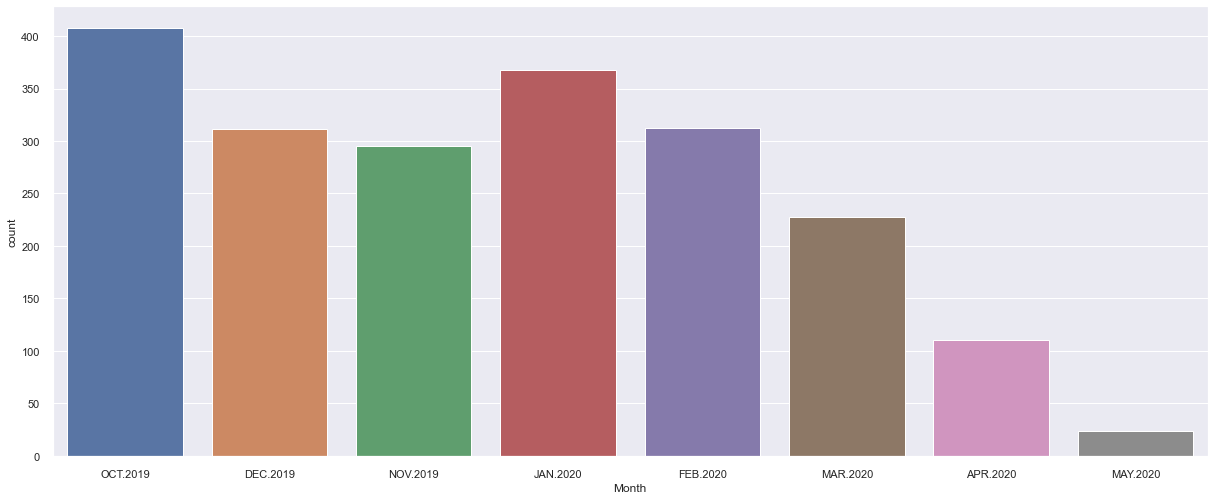

In [1026]:
sns.countplot(c5['Month'])

In [1103]:
c5.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    149.160364
DEC.2019    166.880386
FEB.2020    195.444519
JAN.2020    209.088533
MAR.2020    152.134605
MAY.2020     83.847500
NOV.2019    272.213153
OCT.2019    286.040882
Name: cost_of_care, dtype: float64

### Council District 6

In [983]:
c6.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
6   A0578275         DOG   BICHON FRISE       LFD 081   UNAVAILABLE   
18  A0663765         DOG   AMER BULLDOG     RECEIVING     IMPOUNDED   
19  A0666474         DOG  GERM SHEPHERD        AD 001   UNAVAILABLE   
21  A0672781         DOG  GERM SHEPHERD     RECEIVING   UNAVAILABLE   
23  A0690363         DOG     LHASA APSO       LFD 082     AVAILABLE   

   Activity Number  Activity Sequence Source Id Census Tract Council District  \
6              NaN                  1  P0906275        20500                6   
18      A19-202791                  1  P9991774        10500                6   
19             NaN                  1  P0105355        20500                6   
21      A19-196683                  1  P9991184        20500                6   
23             NaN                  1  P0593521        20500                6   

        Intake Type Intake Subtype  Intake Total      Reason Staff Id  \
6   OWNER SURRENDER        GENERAL             1     MEDICAL      CDM   
18            STRAY       AT LARGE             1  OTHRINTAKS   SM1774   
19           FOSTER         RETURN             1       OTHER       OT   
21            STRAY       AT LARGE             1       OTHER   MG1718   
23  OWNER SURRENDER        GENERAL             1  PERSNLISSU      CBU   

   Intake Date Intake Time    Due Out                        Intake Condition  \
6   2019-11-01    15:06:00 2019-11-01  TREATABLE REHABILITABLE NON-CONTAGIOUS   
18  2019-11-24    13:52:00 2019-12-01                                 APP WNL   
19  2019-11-20    12:01:00 2019-11-20                                 APP WNL   
21  2019-10-12    07:36:00 2019-10-12  TREATABLE REHABILITABLE NON-CONTAGIOUS   
23  2019-11-03    12:22:00 2019-11-03  TREATABLE REHABILITABLE NON-CONTAGIOUS   

   Hold Request       Outcome Type     Outcome Subtype Outcome Date  \
6    RESCU ONLY           TRANSFER  MEDICAL-CONTAGIOUS   2019-11-02   
18          NaN  RETURNED TO OWNER               FIELD   2019-11-24   
19   ADOP RESCU           ADOPTION           BY FOSTER   2019-11-20   
21          NaN  RETURNED TO OWNER               FIELD   2019-10-12   
23   ADOP RESCU           ADOPTION             WALK IN   2019-11-03   

   Outcome Time Receipt Number Impound Number Service Request Number  \
6      11:55:00            NaN     K19-485846                    NaN   
18     13:56:00            NaN     K19-488686                    NaN   
19     12:02:00            NaN     K19-488167                    NaN   
21     07:57:00            NaN     K19-483193                    NaN   
23     15:02:00     R19-558456     K19-486096                    NaN   

                         Outcome Condition     Chip Status     Animal Origin  \
6   TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP  OVER THE COUNTER   
18                                 APP WNL  UNABLE TO SCAN             FIELD   
19                                 APP WNL       SCAN CHIP  OVER THE COUNTER   
21  TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP             SWEEP   
23  TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP  OVER THE COUNTER   

   Additional Information     Month  Outcome_Days stay_category  cost_of_care  
6                  TAGGED  NOV.2019           1.0     0-60 Days         126.0  
18                    NaN  NOV.2019           0.0     0-60 Days         116.0  
19                    NaN  NOV.2019           0.0     0-60 Days         116.0  
21                    NaN  OCT.2019           0.0     0-60 Days         116.0  
23          ADOPT PENDING  NOV.2019           0.0     0-60 Days         116.0

In [1226]:
c6['Outcome Type'].value_counts()

ADOPTION             1803
FOSTER               1099
TRANSFER              657
TREATMENT             628
RETURNED TO OWNER     612
EUTHANIZED            230
DIED                   43
OTHER                  12
WILDLIFE               11
MISSING                10
Name: Outcome Type, dtype: int64

In [1228]:
c6.shape

(5105, 35)

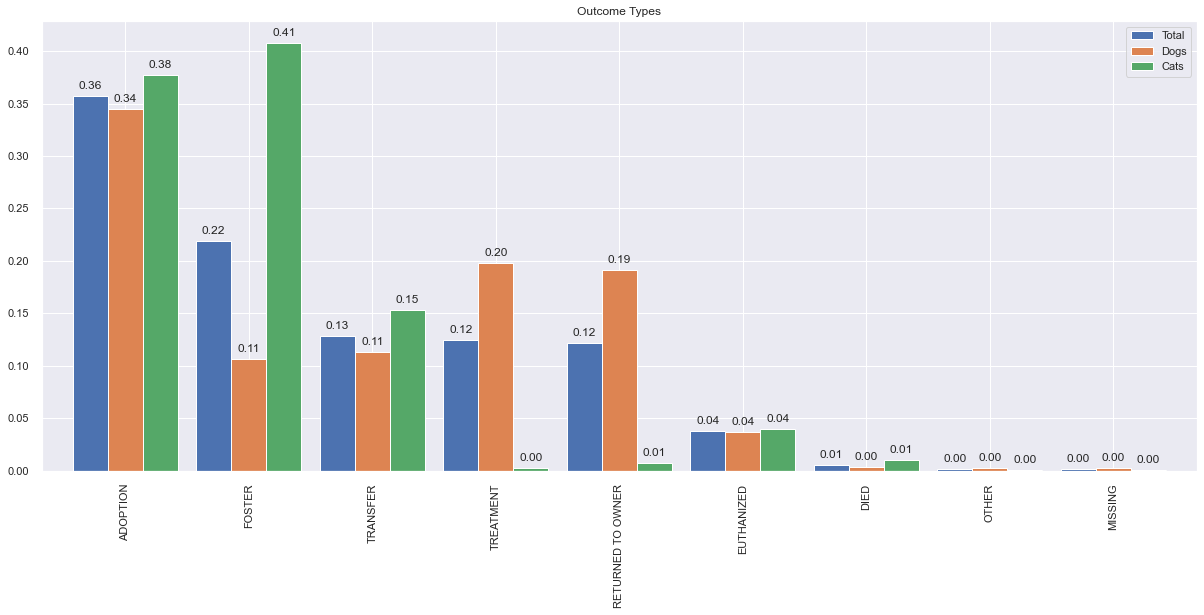

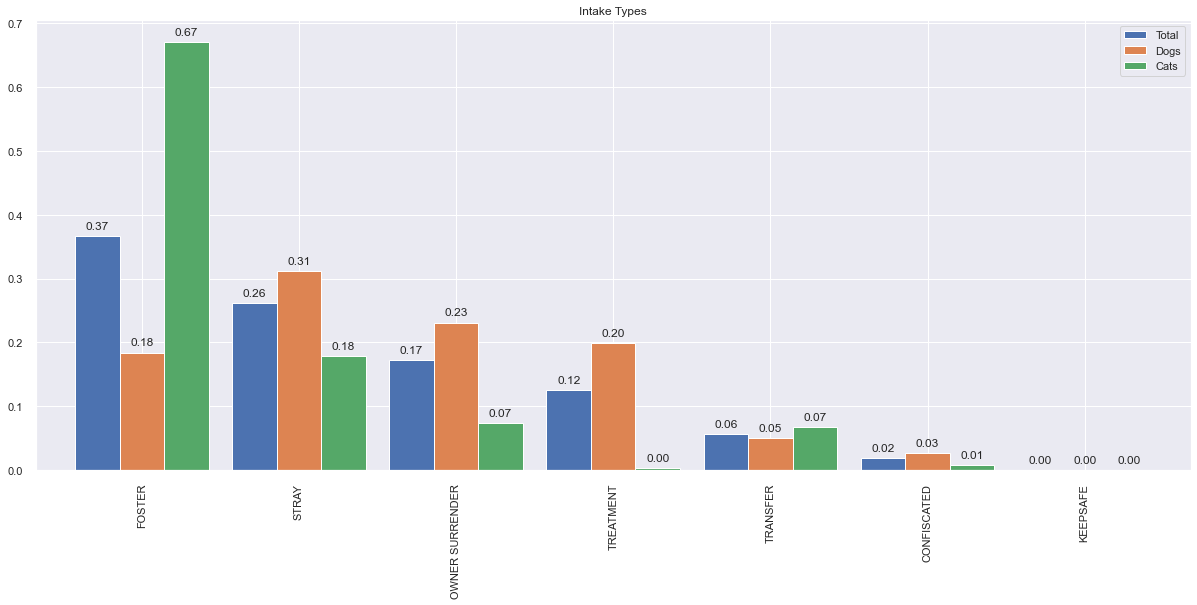

In [1267]:
cou6, c6i = runpercs(c6)

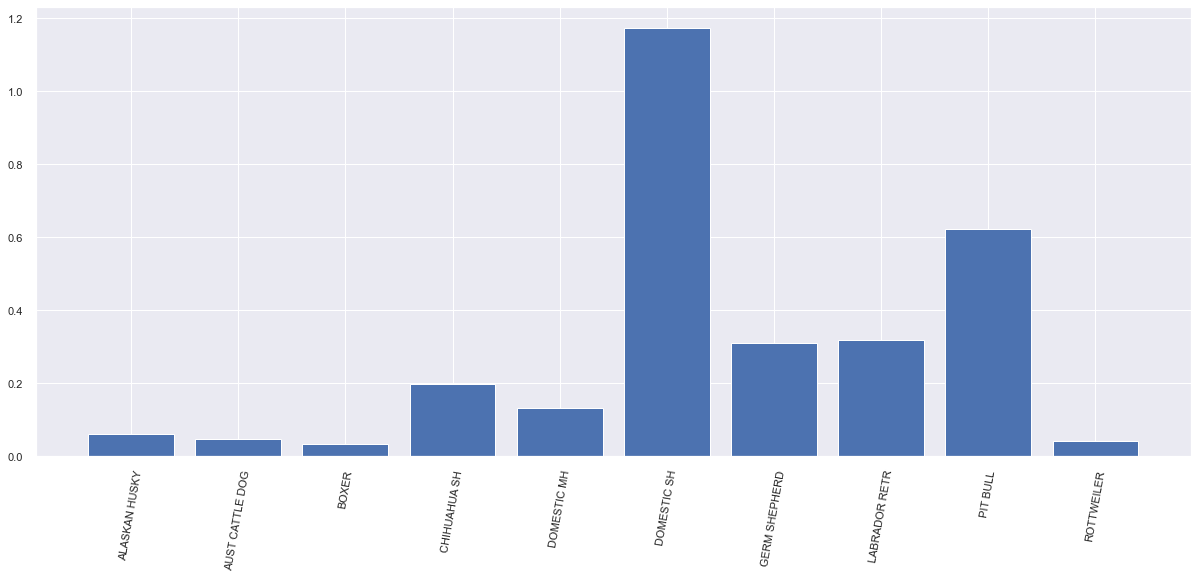

In [985]:
c6breed = breads(c6)

In [986]:
c6['Intake Type'].value_counts()

FOSTER             1837
STRAY              1322
OWNER SURRENDER     895
TREATMENT           629
TRANSFER            282
CONFISCATED          95
WILDLIFE             44
KEEPSAFE              1
Name: Intake Type, dtype: int64

In [987]:
c6['Intake Subtype'].value_counts()

AT LARGE                1149
RETURN                   762
GENERAL                  624
TREATMENT                615
HEART WORM               601
SURGERY                  522
RETURN30                 300
CONFINED                 151
OTHER                    107
QUARANTINE                91
KEEP SAFE                 27
NON-RABIES                27
OTC                       18
ALUMNI                    17
INJURED                   14
ILLNESS                   12
APPOINT                   10
DIED                       9
SX POST OP                 9
FOR ADOPT                  7
FOLLOWUP                   7
EUTHANASIA REQUESTED       6
FIELD                      5
TRAP NEUTER RETURN         3
UNINJURED                  2
CRUELTY                    2
MISSING                    2
SPCA TEXAS                 1
RABIES                     1
EVICTION                   1
DANGEROUS                  1
SAC                        1
STRAY                      1
Name: Intake Subtype, dtype: int64

In [789]:
c6['Intake Condition'].value_counts()

APP WNL                                   3333
TREATABLE REHABILITABLE NON-CONTAGIOUS     837
UNKNOWN                                    250
APP SICK                                   196
UNDERAGE                                   127
HEALTHY                                    106
APP INJ                                     74
DEAD                                        37
UNHEALTHY UNTREATABLE NON-CONTAGIOUS        32
TREATABLE REHABILITABLE CONTAGIOUS          29
CRITICAL                                    21
DECEASED                                     9
TREATABLE MANAGEABLE NON-CONTAGIOUS          7
TREATABLE MANAGEABLE CONTAGIOUS              4
FATAL                                        2
Name: Intake Condition, dtype: int64

In [1269]:
c6['Outcome_Days'].value_counts()

 0.0     2583
 1.0      824
 2.0      316
 4.0      221
 3.0      176
 6.0      169
 5.0      116
 7.0       99
 8.0       64
 10.0      48
 9.0       44
 11.0      41
 13.0      34
 12.0      29
 15.0      25
 14.0      24
 17.0      20
 16.0      18
 19.0      15
 25.0      13
 18.0      12
 26.0      11
 20.0      11
-1.0        9
 24.0       8
 21.0       7
 31.0       6
 29.0       5
 33.0       5
 28.0       5
 22.0       5
 30.0       5
 23.0       5
 27.0       3
 32.0       3
 36.0       2
 84.0       2
 44.0       2
 53.0       2
 48.0       2
 47.0       2
 41.0       2
 59.0       2
 39.0       2
 37.0       2
 40.0       1
 43.0       1
 34.0       1
 58.0       1
 46.0       1
 67.0       1
 63.0       1
 51.0       1
 60.0       1
 35.0       1
 52.0       1
 66.0       1
 56.0       1
 55.0       1
Name: Outcome_Days, dtype: int64

In [1270]:
c6.shape

(5013, 35)

In [1212]:
fos6 = c6.loc[c6['Outcome Type'] == 'FOSTER']

In [1215]:
fos6['Outcome_Days'].value_counts()

0.0     731
1.0     178
2.0      58
3.0      27
8.0      16
5.0      10
7.0      10
4.0       9
6.0       8
10.0      6
20.0      4
14.0      4
15.0      4
13.0      3
17.0      3
12.0      2
23.0      2
25.0      2
16.0      2
9.0       2
32.0      2
58.0      1
22.0      1
66.0      1
21.0      1
59.0      1
84.0      1
29.0      1
19.0      1
24.0      1
52.0      1
27.0      1
51.0      1
47.0      1
11.0      1
48.0      1
39.0      1
Name: Outcome_Days, dtype: int64

In [1216]:
fos6.shape

(1099, 35)

In [1222]:
c6.shape

(5105, 35)

<AxesSubplot:xlabel='Outcome_Days', ylabel='count'>

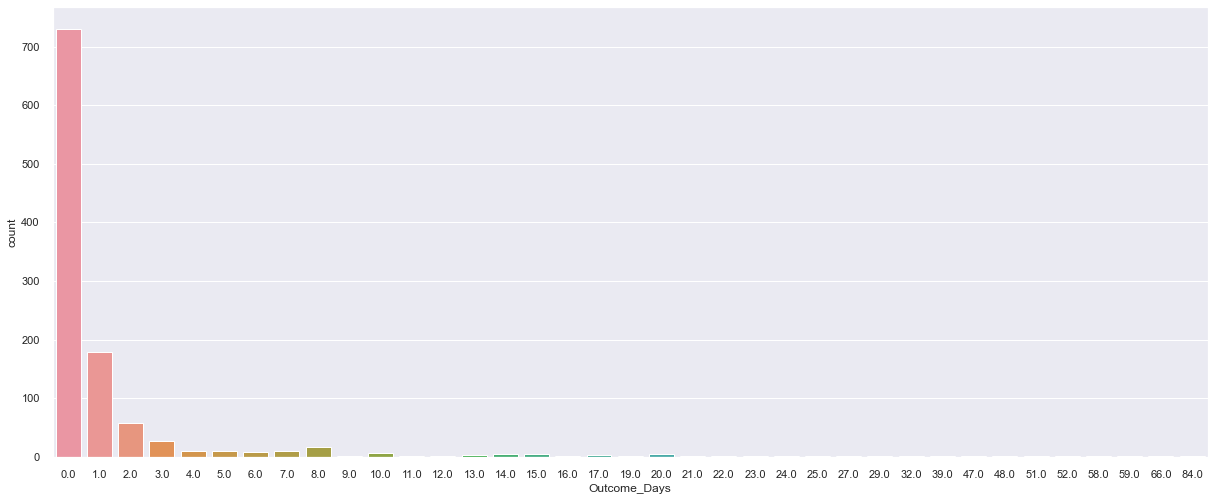

In [1217]:
sns.countplot(fos6['Outcome_Days'])

In [988]:
c6.Outcome_Days.mean()

2.732615083251714

<AxesSubplot:xlabel='Month', ylabel='count'>

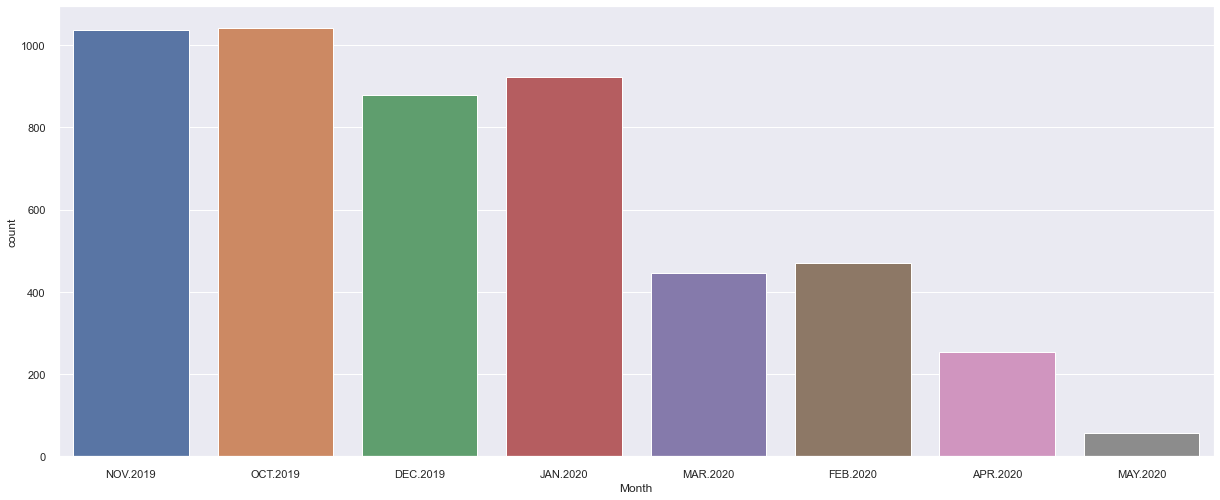

In [1025]:
sns.countplot(c6['Month'])

<AxesSubplot:xlabel='Intake Subtype', ylabel='count'>

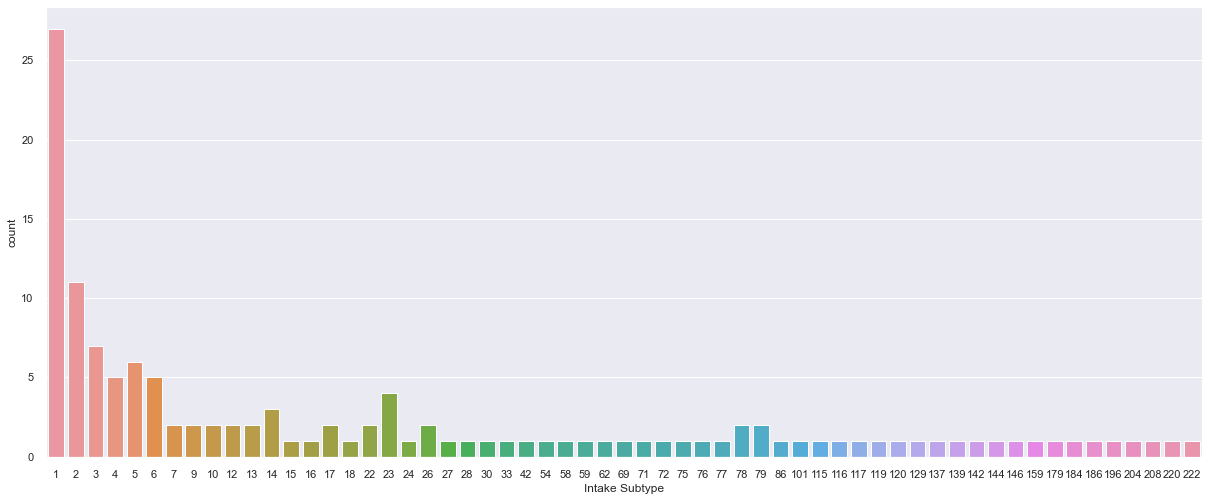

In [1047]:
sns.countplot(c6.groupby(by='Month')['Intake Subtype'].value_counts())

In [1275]:
c6.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    107.283102
DEC.2019    143.976267
FEB.2020    139.756129
JAN.2020    155.747040
MAR.2020    128.805211
MAY.2020     84.654375
NOV.2019    165.220097
OCT.2019    212.745781
Name: cost_of_care, dtype: float64

In [1225]:
cou6

Total   Dogs   Cats
ADOPTION           0.346  0.345  0.377
RETURNED TO OWNER  0.301  0.191  0.007
TRANSFER           0.180  0.113  0.153
EUTHANIZED         0.077  0.037  0.040
FOSTER             0.063  0.107  0.408
DEAD ON ARRIVAL    0.013  0.000  0.000
DIED               0.008  0.004  0.010
TREATMENT          0.006  0.198  0.003
DISPOSAL           0.003  0.000  0.000
OTHER              0.003  0.003  0.001
MISSING            0.001  0.003  0.001

In [1282]:
lows = c6.loc[c6['Outcome_Days'].isin([0,1,2,3])]

In [1283]:
lows['Outcome Type'].value_counts()

ADOPTION             1137
FOSTER                994
TREATMENT             626
RETURNED TO OWNER     542
TRANSFER              443
EUTHANIZED            119
DIED                   26
MISSING                 9
OTHER                   3
Name: Outcome Type, dtype: int64

In [1284]:
lows.shape

(3899, 35)

In [1288]:
c6.shape

(5013, 35)

In [1298]:
c6.loc[c6['Month'] == 'MAY.2020']

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
18599  A1089024         DOG         PIT BULL      INJD 008   UNAVAILABLE   
21926  A1100590         DOG         PIT BULL         QD 01   UNAVAILABLE   
21933  A1099375         DOG         PIT BULL         VT 01   UNAVAILABLE   
21941  A1100607         CAT      DOMESTIC SH           N01   UNAVAILABLE   
21955  A1100615         DOG       ROTTWEILER     RECEIVING     IMPOUNDED   
22047  A1088525         DOG    GERM SHEPHERD            F3   UNAVAILABLE   
22066  A1097467         DOG     CHIHUAHUA SH      INJD 013   UNAVAILABLE   
22102  A1092259         DOG    GERM SHEPHERD      INJD 012   UNAVAILABLE   
22109  A1090495         DOG   DOGUE DE BORDX      INJD 011   UNAVAILABLE   
22116  A1091259         DOG         PIT BULL      INJD 010   UNAVAILABLE   
22123  A1087657         DOG         PIT BULL      INJD 007   UNAVAILABLE   
22127  A1090650         DOG    GERM SHEPHERD      INJD 009   UNAVAILABLE   
22170  A1100628         DOG         PIT BULL         DC 05   UNAVAILABLE   
22183  A1080328         DOG         PIT BULL      INJD 009   UNAVAILABLE   
22187  A1059289         DOG   GREAT PYRENEES         QD 16           LAB   
22188  A1076840         DOG         PIT BULL      INJD 010   UNAVAILABLE   
22189  A1090044         DOG         PIT BULL      INJD 005   UNAVAILABLE   
22207  A1100449         DOG    LABRADOR RETR       LFD 071     AVAILABLE   
22208  A1099604         CAT      DOMESTIC SH        OFFICE   UNAVAILABLE   
22209  A1093014         DOG    LABRADOR RETR      INJD 011   UNAVAILABLE   
22210  A1093132         DOG     AMER BULLDOG      INJD 006   UNAVAILABLE   
22211  A1088930         DOG         PIT BULL      INJD 012     AVAILABLE   
22228  A0937135         DOG   BORDER TERRIER      INJD 007   UNAVAILABLE   
22239  A1094966         DOG         PIT BULL      INJD 008     IMPOUNDED   
22248  A1091218         DOG    LABRADOR RETR      INJD 008   UNAVAILABLE   
22258  A1096090         DOG    GERM SHEPHERD      INJD 008   UNAVAILABLE   
22270  A1093853         DOG    GERM SHEPHERD      INJD 007   UNAVAILABLE   
22273  A0964689         DOG    GERM SHEPHERD      INJD 009   UNAVAILABLE   
22294  A1085755         DOG         PIT BULL      INJD 010   UNAVAILABLE   
22305  A1094396         DOG    LABRADOR RETR      INJD 010   UNAVAILABLE   
22382  A1089150         DOG         PIT BULL         VIP11   UNAVAILABLE   
22392  A1100604         DOG         PIT BULL        AD 020   UNAVAILABLE   
22400  A1100900         DOG        SHIBA INU       LFD 103     IMPOUNDED   
22430  A1100921         CAT      DOMESTIC SH       INCU 01   UNAVAILABLE   
22434  A1100848         DOG    LABRADOR RETR         DC 01   UNAVAILABLE   
22436  A1100721         DOG  AM PIT BULL TER        AD 020     AVAILABLE   
22437  A1100901         DOG    GERM SHEPHERD         QD 05   UNAVAILABLE   
22448  A1100722         DOG  AM PIT BULL TER         DC 20     AVAILABLE   
22450  A1100749         CAT      DOMESTIC SH           N01   UNAVAILABLE   
22463  A0898761         DOG         PIT BULL       LFD 106     IMPOUNDED   
22467  A1100427         DOG         PIT BULL        AD 007   UNAVAILABLE   
22484  A1065733         DOG       ROTTWEILER        AD 011   UNAVAILABLE   
22489  A1100855         CAT      DOMESTIC SH         VT 06     IMPOUNDED   
22513  A1098853         DOG         PIT BULL      INJD 012   UNAVAILABLE   
22521  A1100115         DOG         PIT BULL         VIP10     AVAILABLE   
22525  A1100747         CAT      DOMESTIC SH           N01   UNAVAILABLE   
22540  A1100902         DOG    GERM SHEPHERD         QD 04   UNAVAILABLE   
22546  A1100748         CAT      DOMESTIC SH           N01   UNAVAILABLE   

      Activity Number  Activity Sequence Source Id Census Tract  \
18599             NaN                  1  P0911947        20500   
21926      A20-222060                  2  P0513471        20500   
21933             NaN                  0  P0705792        20500   
21941      A2

In [1299]:
c6['cost_of_care'].sum()

804345.1499999999

In [1301]:
fo6 = c6.loc[c6['Intake Type'] == 'FOSTER']

In [1303]:
fo6['Outcome Type'].value_counts()

FOSTER               911
ADOPTION             754
TRANSFER             118
EUTHANIZED            25
DIED                  14
MISSING                8
OTHER                  3
RETURNED TO OWNER      3
TREATMENT              1
Name: Outcome Type, dtype: int64

In [1304]:
fo6.shape

(1837, 35)

In [1305]:
fo6.head(20)

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
19   A0666474         DOG    GERM SHEPHERD        AD 001   UNAVAILABLE   
114  A1082518         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
131  A0888832         DOG    LABRADOR RETR        FOSTER     AVAILABLE   
132  A0888832         DOG    LABRADOR RETR        OFFICE     AVAILABLE   
133  A0888832         DOG    LABRADOR RETR        FOSTER     AVAILABLE   
134  A0888832         DOG    LABRADOR RETR        FOSTER     AVAILABLE   
152  A1086108         CAT      DOMESTIC SH            F3   UNAVAILABLE   
258  A1064923         DOG        CATAHOULA        AD 001   UNAVAILABLE   
379  A1014894         DOG    LABRADOR RETR        FOSTER   UNAVAILABLE   
380  A1014894         DOG    LABRADOR RETR        FOSTER   UNAVAILABLE   
387  A1015278         DOG  AM PIT BULL TER            F3     AVAILABLE   
474  A1031208         DOG    LABRADOR RETR       LFD 129   UNAVAILABLE   
524  A1038319         DOG    LABRADOR RETR        AD 001   UNAVAILABLE   
528  A1094788         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
587  A1045592         DOG      ENG BULLDOG      PSDOG 08   UNAVAILABLE   
606  A1047099         DOG  AUST CATTLE DOG        OFFICE   UNAVAILABLE   
607  A1047099         DOG  AUST CATTLE DOG        OFFICE   UNAVAILABLE   
702  A1054212         DOG            AKITA        FOSTER   UNAVAILABLE   
703  A1054212         DOG            AKITA        FOSTER   UNAVAILABLE   
709  A1084438         CAT      DOMESTIC SH            F2     AVAILABLE   

    Activity Number  Activity Sequence Source Id Census Tract  \
19              NaN                  1  P0105355        20500   
114             NaN                  1  P0862642        20500   
131             NaN                  1  P0687617        20500   
132             NaN                  1  P0687617        20500   
133             NaN                  1  P0687617        20500   
134             NaN                  1  P0687617        20500   
152      A19-197869                  1  P0631342        20500   
258             NaN                  1  P0912609        20500   
379             NaN                  1  P0035576        20500   
380             NaN                  1  P0035576        20500   
387             NaN                  1  P0063552        20500   
474             NaN                  1  P0892358        20500   
524      A19-197942                  1  P0906327        20500   
528             NaN                  1  P0660062        20500   
587             NaN                  1  P0902545        20500   
606             NaN                  1  P0565137        20500   
607             NaN                  1  P0565137        20500   
702             NaN                  1  P0063552        20500   
703             NaN                  1  P0063552        20500   
709             NaN                  1  P0098979        20500   

    Council District Intake Type Intake Subtype  Intake Total      Reason  \
19                 6      FOSTER         RETURN             1       OTHER   
114                6      FOSTER         RETURN             1       OTHER   
131                6      FOSTER      TREATMENT             1       OTHER   
132                6      FOSTER      TREATMENT             1       OTHER   
133                6      FOSTER      TREATMENT             1       OTHER   
134                6      FOSTER      TREATMENT             1       OTHER   
152                6      FOSTER      TREATMENT             1     MEDICAL   
258                6      FOSTER         RETURN             1       OTHER   
379                6      FOSTER      TREATMENT             1       OTHER   
380                6      FOSTER         RETURN             1       OTHER   
387                6      FOSTER      TREATMENT             1       OTHER   
474                6      FOSTER        GENERAL             1       OTHER   
524                6      FOSTER         RETURN             1       OTHER   
528  

In [1306]:
fo6['Intake Subtype'].value_counts()

RETURN        762
TREATMENT     615
SURGERY       363
GENERAL        75
DIED            9
FOR ADOPT       7
MISSING         2
APPOINT         2
QUARANTINE      1
STRAY           1
Name: Intake Subtype, dtype: int64

In [1307]:
fo6['Outcome_Days'].value_counts()

 0.0     1337
 1.0      254
 2.0       93
 3.0       38
 4.0       21
 5.0       16
 6.0       10
 10.0       9
 15.0       7
 8.0        6
 9.0        6
 7.0        5
 13.0       5
 11.0       5
 20.0       4
 26.0       4
-1.0        2
 17.0       2
 30.0       2
 23.0       1
 34.0       1
 59.0       1
 31.0       1
 28.0       1
 24.0       1
 12.0       1
 41.0       1
 18.0       1
 22.0       1
 25.0       1
Name: Outcome_Days, dtype: int64

In [1356]:
fo6ret = fo6.loc[fo6['Intake Subtype'] == 'RETURN']

In [1357]:
fo6ret['Outcome Type'].value_counts()

ADOPTION             538
TRANSFER             103
FOSTER                99
EUTHANIZED             7
MISSING                6
DIED                   4
RETURNED TO OWNER      3
OTHER                  2
Name: Outcome Type, dtype: int64

In [1358]:
fo6ret.shape

(762, 35)

In [1360]:
fo6ret['Outcome Subtype'].value_counts()

IN FOSTER                214
BY FOSTER                144
WALK IN                  100
UNDERAGE                  98
EAC                       61
TRANSPORT                 37
GENERAL                   24
SHORT TERM                17
WESTMORELD                 8
TELEADOPT                  8
MEDICAL-CONTAGIOUS         8
TREATMENT                  7
PROMOTION                  6
STOLEN                     6
HUMANE                     6
TO ADOPT                   4
APPOINT                    4
OFFSITE                    3
MEDICAL                    2
OTHER                      2
IN KENNEL                  1
SURGERY                    1
MEDICAL-NONCONTAGIOUS      1
Name: Outcome Subtype, dtype: int64

In [1359]:
fo6ret.head(25)

Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
19    A0666474         DOG    GERM SHEPHERD        AD 001   UNAVAILABLE   
114   A1082518         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
258   A1064923         DOG        CATAHOULA        AD 001   UNAVAILABLE   
380   A1014894         DOG    LABRADOR RETR        FOSTER   UNAVAILABLE   
524   A1038319         DOG    LABRADOR RETR        AD 001   UNAVAILABLE   
528   A1094788         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
607   A1047099         DOG  AUST CATTLE DOG        OFFICE   UNAVAILABLE   
702   A1054212         DOG            AKITA        FOSTER   UNAVAILABLE   
837   A1062880         DOG    LABRADOR RETR        FOSTER   UNAVAILABLE   
843   A1063169         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
844   A1063171         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
852   A1063404         DOG     CHIHUAHUA SH        AD 001   UNAVAILABLE   
950   A1067620         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
952   A1067772         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
956   A1067846         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
993   A1069070         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
1010  A1069767         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
1024  A1070190         DOG         PIT BULL       LFD 108   UNAVAILABLE   
1032  A1070302         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
1035  A1070303         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
1050  A1071112         CAT      DOMESTIC SH        AC 001   UNAVAILABLE   
1064  A1071400         CAT      DOMESTIC SH       LFC 050   UNAVAILABLE   
1065  A1071401         CAT      DOMESTIC SH       LFC 041   UNAVAILABLE   
1069  A1071402         CAT      DOMESTIC SH       LFC 003   UNAVAILABLE   
1073  A1071539         DOG  BLACK/TAN HOUND        FOSTER     AVAILABLE   

     Activity Number  Activity Sequence Source Id Census Tract  \
19               NaN                  1  P0105355        20500   
114              NaN                  1  P0862642        20500   
258              NaN                  1  P0912609        20500   
380              NaN                  1  P0035576        20500   
524       A19-197942                  1  P0906327        20500   
528              NaN                  1  P0660062        20500   
607              NaN                  1  P0565137        20500   
702              NaN                  1  P0063552        20500   
837              NaN                  1  P0105355        20500   
843              NaN                  1  P0091280        20500   
844              NaN                  1  P0091280        20500   
852              NaN                  1  P0027631        20500   
950       A19-172805                  1  P0845778        20500   
952              NaN                  1  P0841065        20500   
956              NaN                  1  P0867875        20500   
993              NaN                  1  P0881905        20500   
1010             NaN                  1  P0852310        20500   
1024             NaN                  1  P0063552        20500   
1032             NaN                  1  P0887172        20500   
1035             NaN                  1  P0887172        20500   
1050             NaN                  1  P0017761        20500   
1064             NaN                  1  P0890295        20500   
1065             NaN                  1  P0890295        20500   
1069             NaN                  1  P0890295        20500   
1073             NaN                  1  P0680840        20500   

     Council District Intake Type Intake Subtype  Intake Total      Reason  \
19                  6      FOSTER         RETURN             1       OTHER   
114                 6      FOSTER         RETURN             1       OTHER   
258                 6      FOSTER         RETURN             1       OTHER   
380                 6    

### Council District 7

In [989]:
c7.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
32   A0705368         DOG      CHOW CHOW     RECEIVING     IMPOUNDED   
82   A0820528         DOG  GERM SHEPHERD        AD 009   UNAVAILABLE   
83   A0824144         DOG       PIT BULL        LAB 04           LAB   
97   A0856660         DOG  LABRADOR RETR       LFD 060   UNAVAILABLE   
122  A0881480         DOG   CHIHUAHUA SH         CC 16   UNAVAILABLE   

    Activity Number  Activity Sequence Source Id Census Tract  \
32       A19-202796                  1  P9991780         8400   
82       A19-203409                  1  P9991772         3800   
83       A19-195610                  1  P0662575         2701   
97              NaN                  1  P0906323         3400   
122      A19-204908                  1  P9991778        12207   

    Council District Intake Type Intake Subtype  Intake Total      Reason  \
32                 7       STRAY       AT LARGE             1  OTHRINTAKS   
82                 7       STRAY       AT LARGE             1       OTHER   
83                 7       STRAY       AT LARGE             1  OTHRINTAKS   
97                 7       STRAY       AT LARGE             1  OTHRINTAKS   
122                7       STRAY       CONFINED             1  OTHRINTAKS   

    Staff Id Intake Date Intake Time    Due Out  \
32    JB1744  2019-11-24    11:40:00 2019-12-04   
82    RO1772  2019-11-30    11:44:00 2019-12-02   
83    AR1758  2019-10-03    11:05:00 2019-10-09   
97        JR  2019-11-01    18:37:00 2019-11-07   
122   LU1778  2019-12-09    15:41:00 2019-12-15   

                           Intake Condition Hold Request       Outcome Type  \
32                                  APP WNL          NaN  RETURNED TO OWNER   
82                                  APP WNL   ADOP RESCU           ADOPTION   
83   TREATABLE REHABILITABLE NON-CONTAGIOUS   RESC FOSTR         EUTHANIZED   
97   TREATABLE REHABILITABLE NON-CONTAGIOUS          NaN  RETURNED TO OWNER   
122                                 UNKNOWN   RESCU ONLY           TRANSFER   

    Outcome Subtype Outcome Date Outcome Time Receipt Number Impound Number  \
32            FIELD   2019-11-24     11:45:00            NaN     K19-488706   
82          OFFSITE   2019-12-10     14:34:00     R19-560701     K19-489233   
83            SPACE   2019-10-29     15:41:00            NaN     K19-482023   
97          WALK IN   2019-11-02     14:27:00     R19-558329     K19-485882   
122       TRANSPORT   2019-12-16     17:57:00            NaN     K19-490279   

    Service Request Number                       Outcome Condition  \
32                     NaN                                 APP WNL   
82                     NaN                                 APP WNL   
83                     NaN    UNHEALTHY UNTREATABLE NON-CONTAGIOUS   
97                     NaN  TREATABLE REHABILITABLE NON-CONTAGIOUS   
122                    NaN                                 UNKNOWN   

    Chip Status     Animal Origin Additional Information     Month  \
32    SCAN CHIP             FIELD                    NaN  NOV.2019   
82    SCAN CHIP             SWEEP               GALLERIA  NOV.2019   
83    SCAN CHIP             FIELD                    NaN  OCT.2019   
97    SCAN CHIP  OVER THE COUNTER                    NaN  NOV.2019   
122   SCAN CHIP             FIELD                 TAGGED  DEC.2019   

     Outcome_Days stay_category  cost_of_care  
32            0.0     0-60 Days         116.0  
82           10.0     0-60 Days         216.0  
83           26.0     0-60 Days         376.0  
97            1.0     0-60 Days         126.0  
122           7.0     0-60 Days         186.0

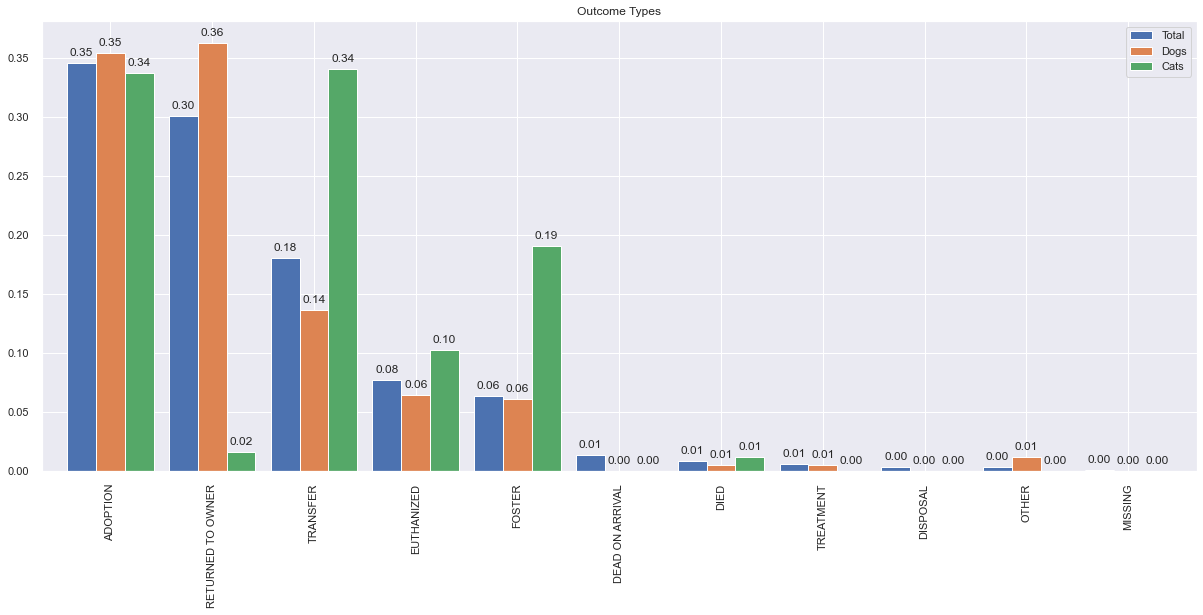

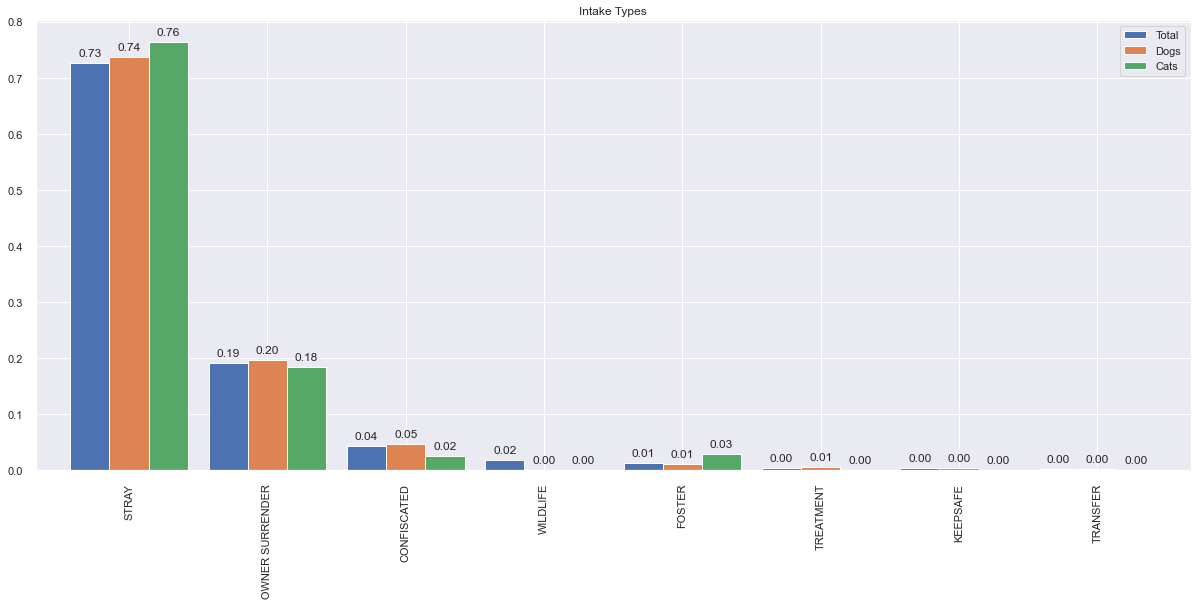

In [990]:
cou7, c7i = runpercs(c7)

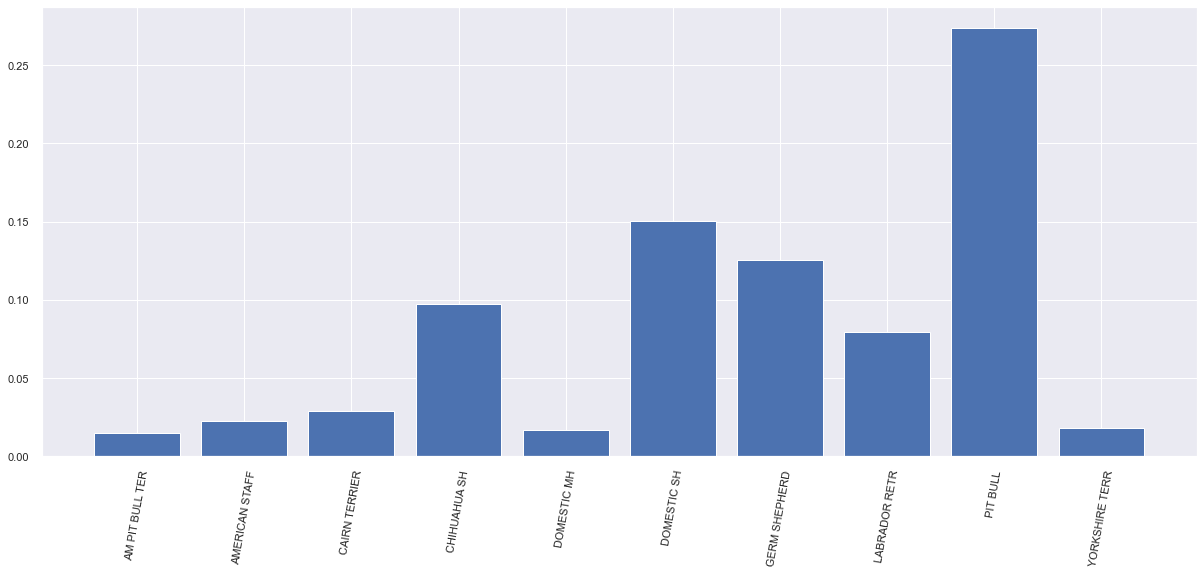

In [991]:
c7breed = breads(c7)

In [992]:
c7.Outcome_Days.mean()

4.93099121706399

<AxesSubplot:xlabel='Month', ylabel='count'>

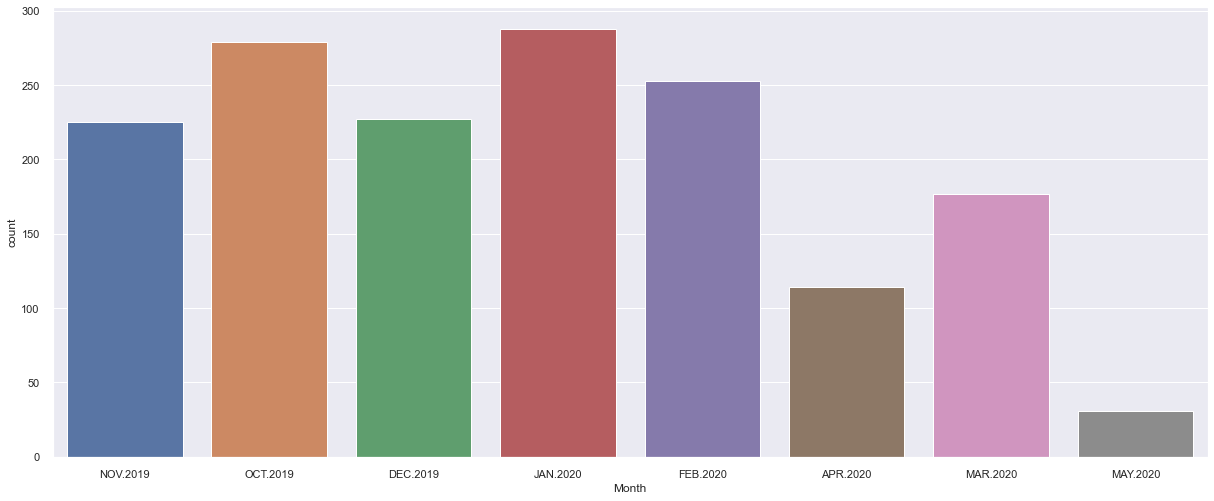

In [1024]:
sns.countplot(c7['Month'])

In [1105]:
c7.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    171.669474
DEC.2019    266.876608
FEB.2020    242.785929
JAN.2020    212.409583
MAR.2020    177.554407
MAY.2020     51.051935
NOV.2019    289.417733
OCT.2019    325.771183
Name: cost_of_care, dtype: float64

### Council District 8

In [993]:
c8.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
3   A0525642         DOG  GERM SHEPHERD      INJD 001     IMPOUNDED   
13  A0638012         DOG     ROTTWEILER     RECEIVING     IMPOUNDED   
15  A0643134         DOG  SCHNAUZER MIN       LFSD 20     IMPOUNDED   
16  A0648253         DOG   CHIHUAHUA SH         SMD08   UNAVAILABLE   
28  A0695619         DOG            PUG     RECEIVING   UNAVAILABLE   

   Activity Number  Activity Sequence Source Id Census Tract Council District  \
3       A19-196573                  1  P0903792        16605                8   
13      A19-205994                  1  P0787875        11601                8   
15      A19-203283                  1  P9991781        11401                8   
16             NaN                  1  P0904994        17004                8   
28      A19-198502                  1  P9991718        20200                8   

        Intake Type        Intake Subtype  Intake Total      Reason Staff Id  \
3   OWNER SURRENDER               GENERAL             1       OTHER  RA 1549   
13  OWNER SURRENDER  EUTHANASIA REQUESTED             1     MEDICAL   SC1704   
15            STRAY              AT LARGE             1  OTHRINTAKS   AO1781   
16            STRAY              AT LARGE             1  OTHRINTAKS      CDM   
28            STRAY              AT LARGE             1       OTHER   MG1718   

   Intake Date Intake Time    Due Out                        Intake Condition  \
3   2019-10-11    09:55:00 2019-10-17  TREATABLE REHABILITABLE NON-CONTAGIOUS   
13  2019-12-16    14:20:00 2019-12-16                                CRITICAL   
15  2019-11-28    15:53:00 2019-12-04                                 APP WNL   
16  2019-10-21    13:27:00 2019-10-27  TREATABLE REHABILITABLE NON-CONTAGIOUS   
28  2019-10-24    17:13:00 2019-10-24  TREATABLE REHABILITABLE NON-CONTAGIOUS   

        Hold Request       Outcome Type     Outcome Subtype Outcome Date  \
3   EMERGENCY RESCUE           TRANSFER  MEDICAL-CONTAGIOUS   2019-10-15   
13               NaN         EUTHANIZED              HUMANE   2019-12-16   
15       HOLD NOTIFY  RETURNED TO OWNER             WALK IN   2019-11-29   
16        ADOP RESCU           ADOPTION           PROMOTION   2019-10-30   
28               NaN  RETURNED TO OWNER               FIELD   2019-10-24   

   Outcome Time Receipt Number Impound Number Service Request Number  \
3      17:35:00            NaN     K19-483073                    NaN   
13     15:24:00            NaN     K19-491028                    NaN   
15     14:21:00     R19-559900     K19-489100                    NaN   
16     12:00:00     R19-558105     K19-484397                    NaN   
28     17:13:00            NaN     K19-484833                    NaN   

                         Outcome Condition     Chip Status     Animal Origin  \
3   TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP             SWEEP   
13                                APP SICK       SCAN CHIP             SWEEP   
15                                 APP WNL       SCAN CHIP             FIELD   
16  TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP  OVER THE COUNTER   
28  TREATABLE REHABILITABLE NON-CONTAGIOUS  UNABLE TO SCAN             SWEEP   

   Additional Information     Month  Outcome_Days stay_category  cost_of_care  
3                  TAGGED  OCT.2019           4.0     0-60 Days         156.0  
13                    NaN  DEC.2019           0.0     0-60 Days         116.0  
15      RETURNED TO OWNER  NOV.2019           1.0     0-60 Days         126.0  
16                ADOPTED  OCT.2019           9.0     0-60 Days         206.0  
28                    NaN  OCT.2019           0.0     0-60 Days         116.0

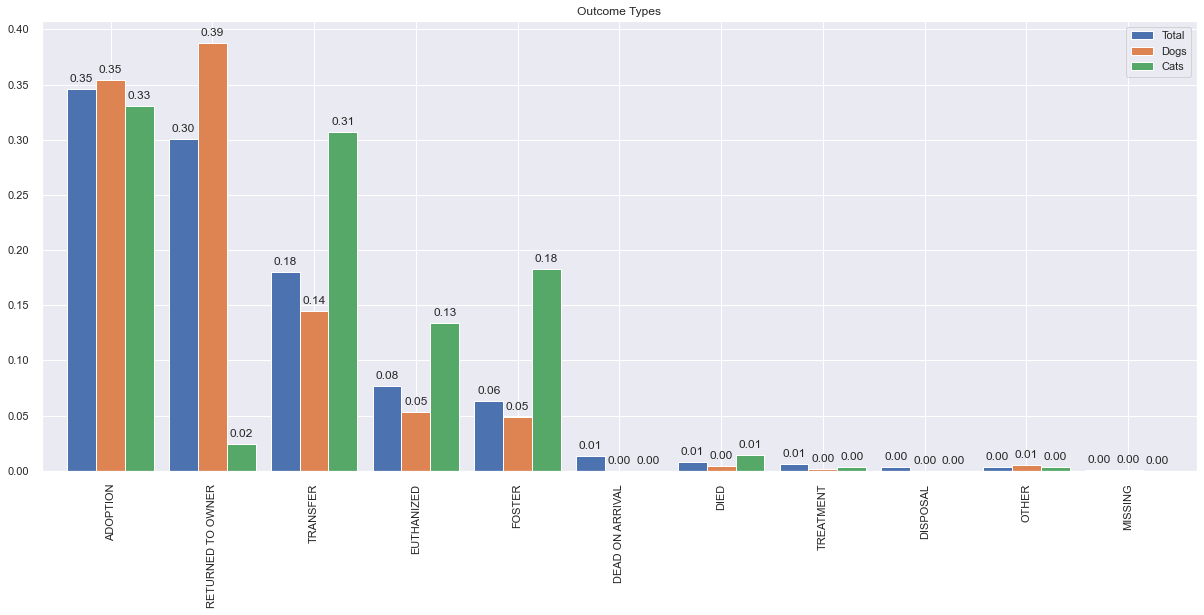

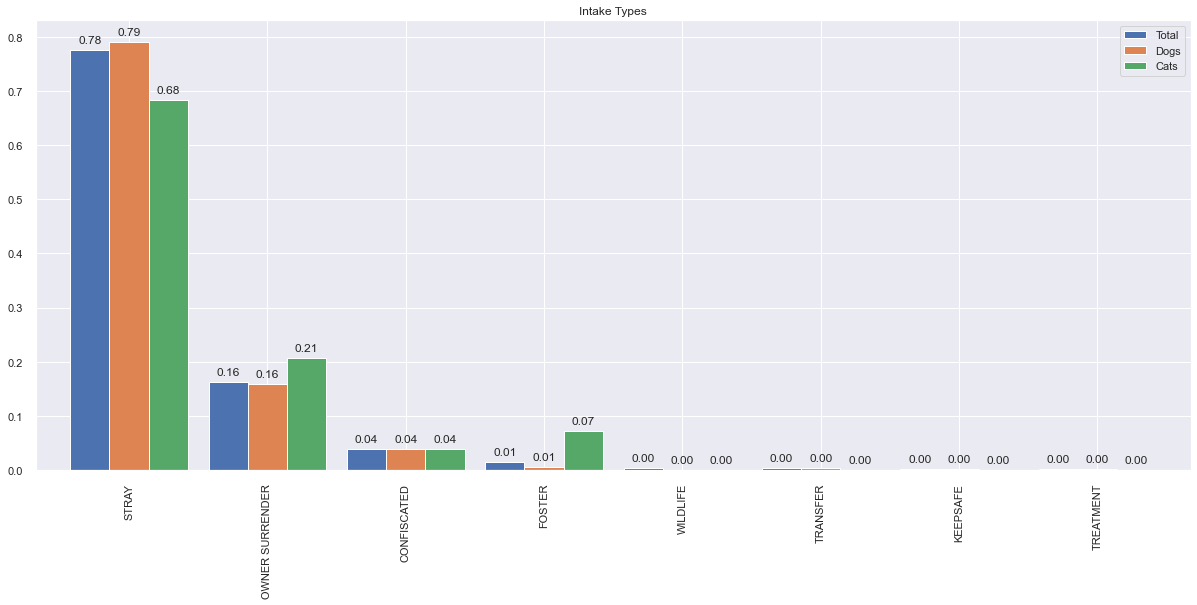

In [994]:
cou8, c8i = runpercs(c8)

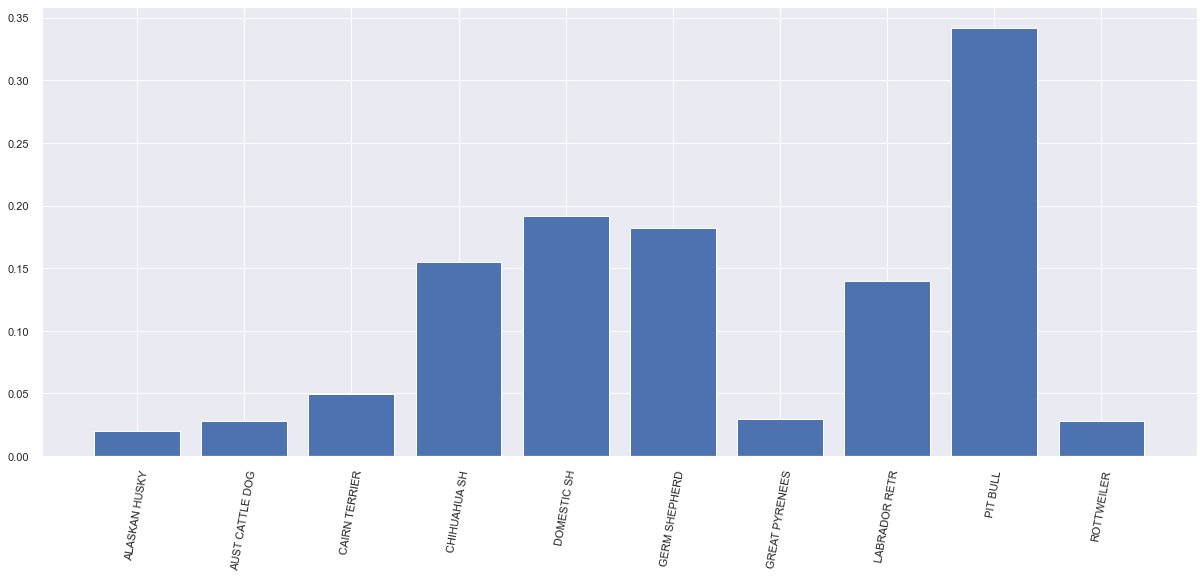

In [995]:
c8breed = breads(c8)

In [996]:
c8.Outcome_Days.mean()

4.643243243243243

<AxesSubplot:xlabel='Month', ylabel='count'>

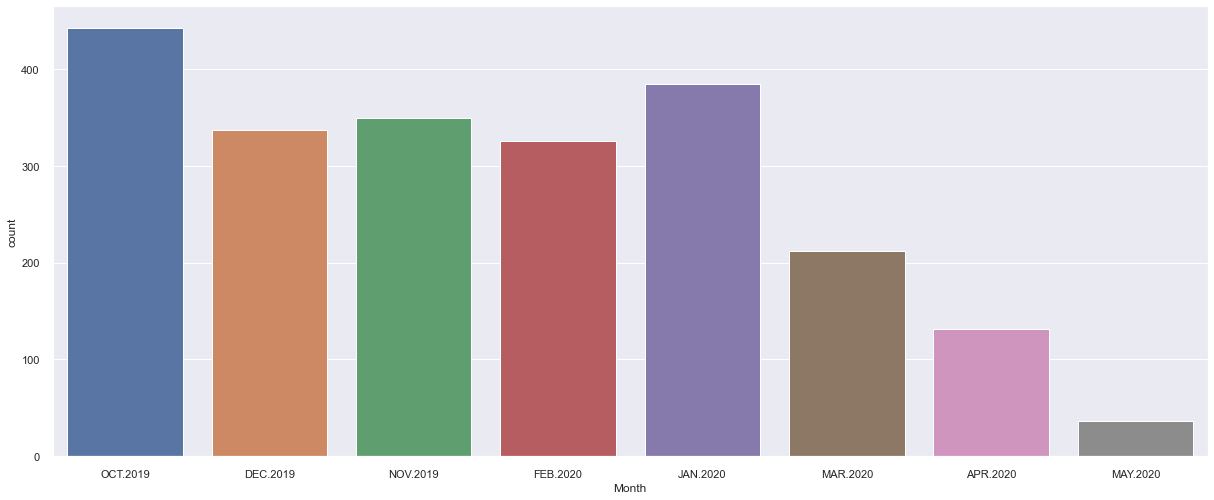

In [1023]:
sns.countplot(c8['Month'])

In [1106]:
c8.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    170.103053
DEC.2019    183.976617
FEB.2020    201.760153
JAN.2020    292.712857
MAR.2020    185.605094
MAY.2020     77.392500
NOV.2019    262.282143
OCT.2019    280.360722
Name: cost_of_care, dtype: float64

### Council District 9

In [542]:
c9.head()

Animal Id Animal Type  Animal Breed Kennel Number Kennel Status  \
42   A0741876         DOG  CHIHUAHUA SH       LFD 053   UNAVAILABLE   
125  A0883104         DOG     CATAHOULA         VIP09       EU RISK   
145  A0902896         DOG      PIT BULL       LFD 040   UNAVAILABLE   
178  A0937885         DOG  CHIHUAHUA SH         SMD10   UNAVAILABLE   
262  A0981001         DOG      PIT BULL        LAB 05           LAB   

    Activity Number  Activity Sequence Source Id Census Tract  \
42       A19-204293                  1  P0029610        12800   
125      A19-198503                  1  P0695390        12601   
145             NaN                  1  P0706073        13011   
178             NaN                  1  P0507039         8200   
262      A19-196429                  1  P0903645        12900   

    Council District      Intake Type Intake Subtype  Intake Total  \
42                 9            STRAY       CONFINED             1   
125                9  OWNER SURRENDER        GENERAL             1   
145                9  OWNER SURRENDER        GENERAL             1   
178                9            STRAY       AT LARGE             1   
262                9            STRAY       CONFINED             1   

         Reason Staff Id Intake Date Intake Time    Due Out  \
42   OTHRINTAKS   MO1764  2019-12-05    13:00:00 2019-12-11   
125     MEDICAL  MRY1776  2019-10-24    13:32:00 2019-10-30   
145  OTHRINTAKS       JR  2019-11-09    10:33:00 2019-11-09   
178  OTHRINTAKS       DL  2019-10-25    11:57:00 2019-10-31   
262       OTHER   TM1736  2019-10-10    05:16:00 2019-10-16   

                           Intake Condition Hold Request Outcome Type  \
42                                  APP WNL   ADOP RESCU     ADOPTION   
125                                 APP INJ   ADOP RESCU     ADOPTION   
145                                 APP WNL   ADOP RESCU     ADOPTION   
178  TREATABLE REHABILITABLE NON-CONTAGIOUS     ADOPTION     ADOPTION   
262  TREATABLE REHABILITABLE NON-CONTAGIOUS   ADOP RESCU   EUTHANIZED   

    Outcome Subtype Outcome Date Outcome Time Receipt Number Impound Number  \
42          WALK IN   2019-12-11     16:12:00     R19-560549     K19-489808   
125       PROMOTION   2019-12-03     15:37:00     R19-560291     K19-484801   
145         WALK IN   2019-11-12     18:24:00     R19-558985     K19-486798   
178         WALK IN   2019-10-31     12:46:00     R19-557967     K19-484896   
262           SPACE   2019-10-16     14:36:00            NaN     K19-482939   

    Service Request Number                       Outcome Condition  \
42                     NaN                                 APP WNL   
125                    NaN                                 APP WNL   
145                    NaN                                 APP WNL   
178                    NaN  TREATABLE REHABILITABLE NON-CONTAGIOUS   
262                    NaN  TREATABLE REHABILITABLE NON-CONTAGIOUS   

    Chip Status     Animal Origin Additional Information     Month  
42    SCAN CHIP             FIELD               ADOPTION  DEC.2019  
125   SCAN CHIP             FIELD                ADOPTED  OCT.2019  
145   SCAN CHIP  OVER THE COUNTER                ADOPTED  NOV.2019  
178   SCAN CHIP  OVER THE COUNTER            PRE-ADOPTED  OCT.2019  
262   SCAN CHIP             FIELD                    NaN  OCT.2019

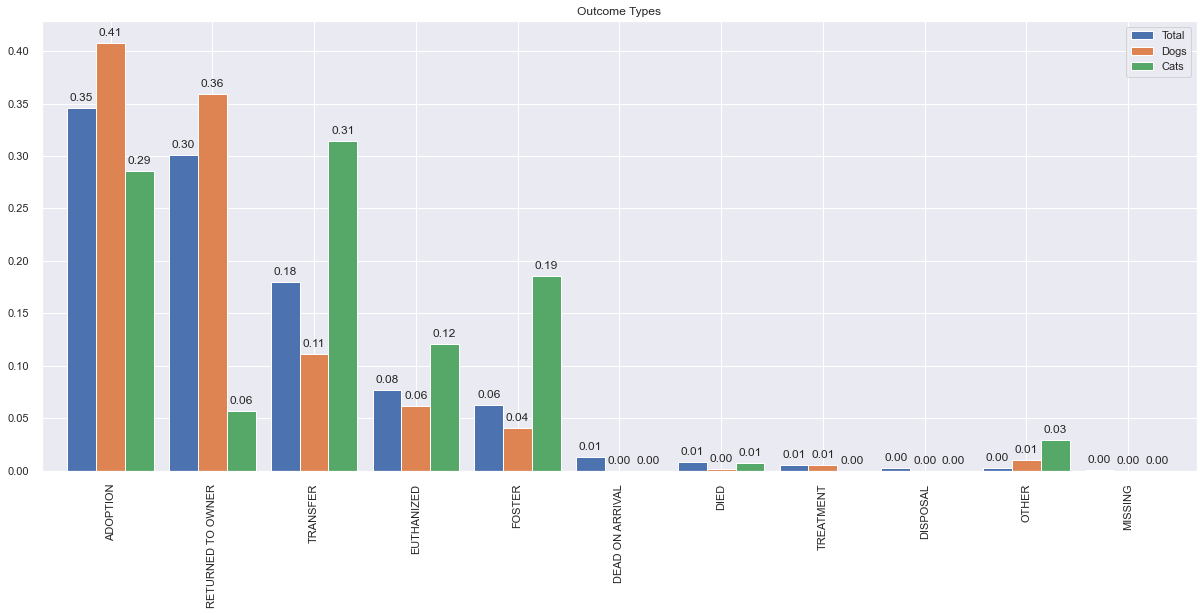

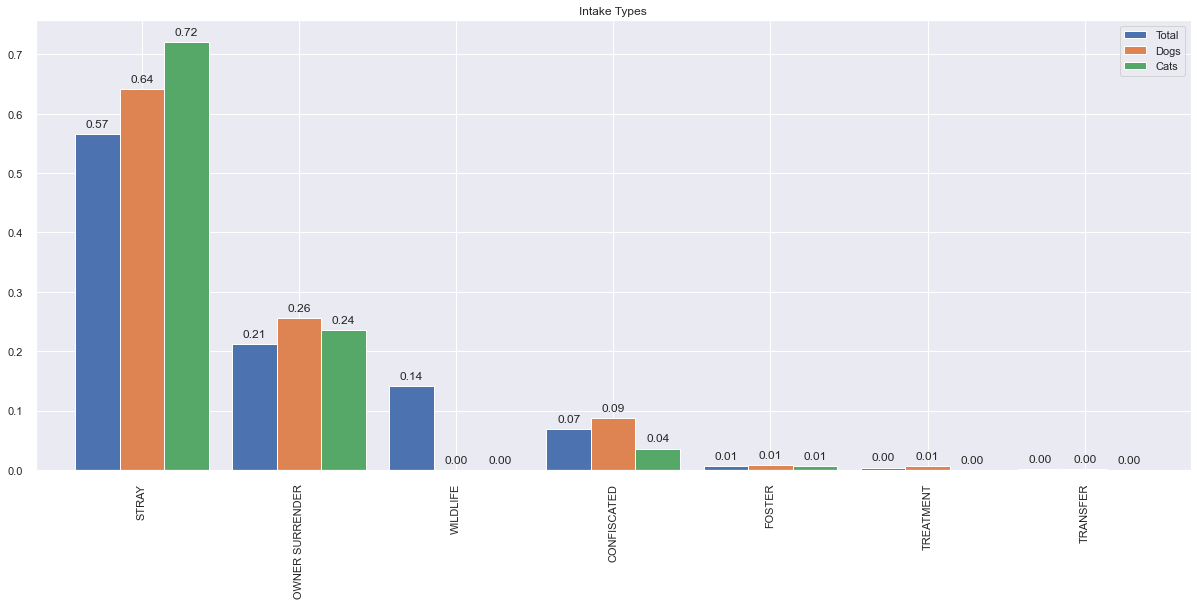

In [997]:
cou9, c9i = runpercs(c9)

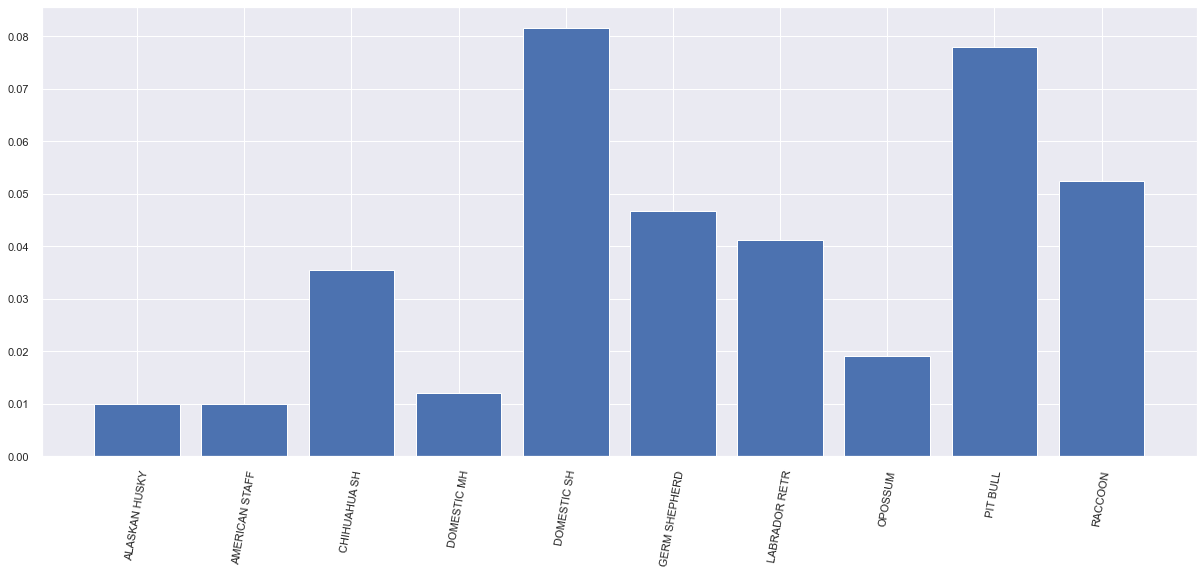

In [998]:
c9breed = breads(c9)

In [999]:
c9.Outcome_Days.mean()

4.551075268817204

<AxesSubplot:xlabel='Month', ylabel='count'>

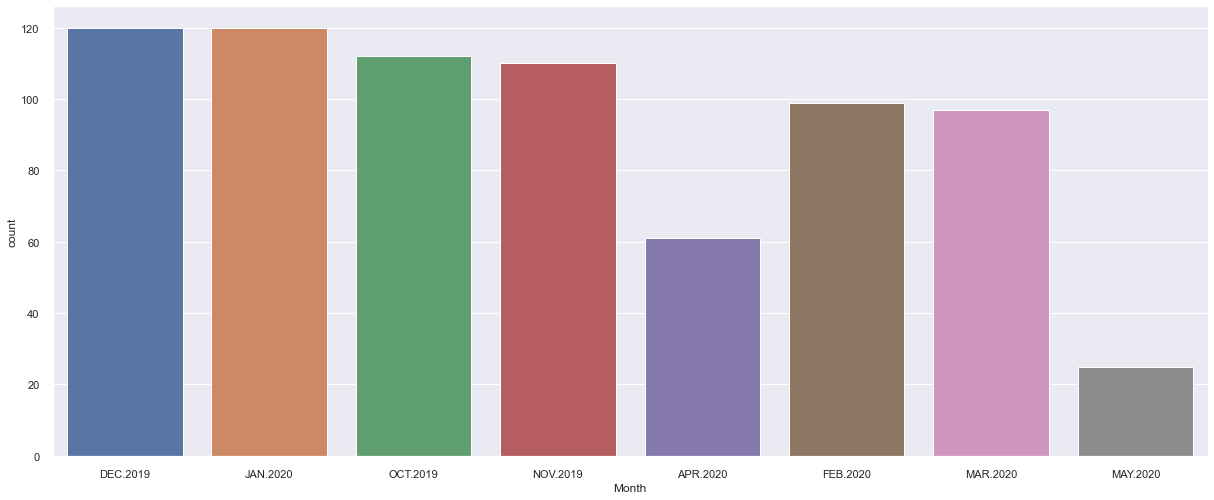

In [1031]:
sns.countplot(c9['Month'])

In [1107]:
c9.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    125.910820
DEC.2019    266.846750
FEB.2020    215.979394
JAN.2020    250.063750
MAR.2020    125.871546
MAY.2020     59.447600
NOV.2019    266.406636
OCT.2019    337.667321
Name: cost_of_care, dtype: float64

### Council District 10

In [544]:
c10.head()

Animal Id Animal Type    Animal Breed Kennel Number Kennel Status  \
36   A0716512         CAT     DOMESTIC SH         VT 11     IMPOUNDED   
40   A0738963         DOG        PIT BULL        PUPS 1   UNAVAILABLE   
102  A0862238         CAT     DOMESTIC SH       FREEZER   UNAVAILABLE   
156  A0915854         DOG        SHIH TZU         SMD08     IMPOUNDED   
177  A0937135         DOG  BORDER TERRIER       LFD 054   UNAVAILABLE   

    Activity Number  Activity Sequence Source Id Census Tract  \
36              NaN                  1  P0584727        13005   
40       A19-197477                  1  P9991764        19035   
102      A19-197121                  1  P0904226         7810   
156      A19-195702                  1  P0902932        19016   
177             NaN                  1  P0910095        13008   

    Council District      Intake Type   Intake Subtype  Intake Total  \
36                10  OWNER SURRENDER          GENERAL             1   
40                10            STRAY         CONFINED             1   
102               10  OWNER SURRENDER  DEAD ON ARRIVAL             1   
156               10  OWNER SURRENDER          GENERAL             1   
177               10  OWNER SURRENDER         RETURN30             1   

         Reason Staff Id Intake Date Intake Time    Due Out  \
36   PERSNLISSU       DL  2019-10-23    11:21:00 2019-10-29   
40   OTHRINTAKS   MO1764  2019-10-17    11:50:00 2019-10-23   
102  OTHRINTAKS   SP1782  2019-10-15    16:24:00 2019-10-15   
156   FINANCIAL   TM1736  2019-10-04    00:27:00 2019-10-10   
177     HOUSING       EV  2019-12-05    13:54:00 2019-12-05   

                           Intake Condition     Hold Request  \
36   TREATABLE REHABILITABLE NON-CONTAGIOUS              NaN   
40   TREATABLE REHABILITABLE NON-CONTAGIOUS       RESCU ONLY   
102        UNHEALTHY UNTREATABLE CONTAGIOUS  RABIES SPECIMEN   
156  TREATABLE REHABILITABLE NON-CONTAGIOUS   POSSIBLY OWNED   
177                                 APP WNL       ADOP RESCU   

          Outcome Type        Outcome Subtype Outcome Date Outcome Time  \
36          EUTHANIZED  MEDICAL-NONCONTAGIOUS   2019-10-24     09:15:00   
40            ADOPTION                WALK IN   2019-10-23     11:31:00   
102    DEAD ON ARRIVAL                   HOLD   2019-10-16     00:00:00   
156  RETURNED TO OWNER              MICROCHIP   2019-10-04     12:32:00   
177           ADOPTION                WALK IN   2019-12-05     14:31:00   

    Receipt Number Impound Number Service Request Number  \
36             NaN     K19-484655                    NaN   
40      R19-557499     K19-483878                    NaN   
102            NaN     K19-483664             1901216914   
156     R19-556718     K19-482136                    NaN   
177     R19-560375     K19-489821                    NaN   

                          Outcome Condition     Chip Status     Animal Origin  \
36     UNHEALTHY UNTREATABLE NON-CONTAGIOUS       SCAN CHIP  OVER THE COUNTER   
40   TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP             FIELD   
102    UNHEALTHY UNTREATABLE NON-CONTAGIOUS  UNABLE TO SCAN             FIELD   
156  TREATABLE REHABILITABLE NON-CONTAGIOUS       SCAN CHIP             FIELD   
177                                 APP WNL       SCAN CHIP  OVER THE COUNTER   

    Additional Information     Month  
36                     NaN  OCT.2019  
40             PRE ADOPTED  OCT.2019  
102                    NaN  OCT.2019  
156                    NaN  OCT.2019  
177                ADOPTED  DEC.2019

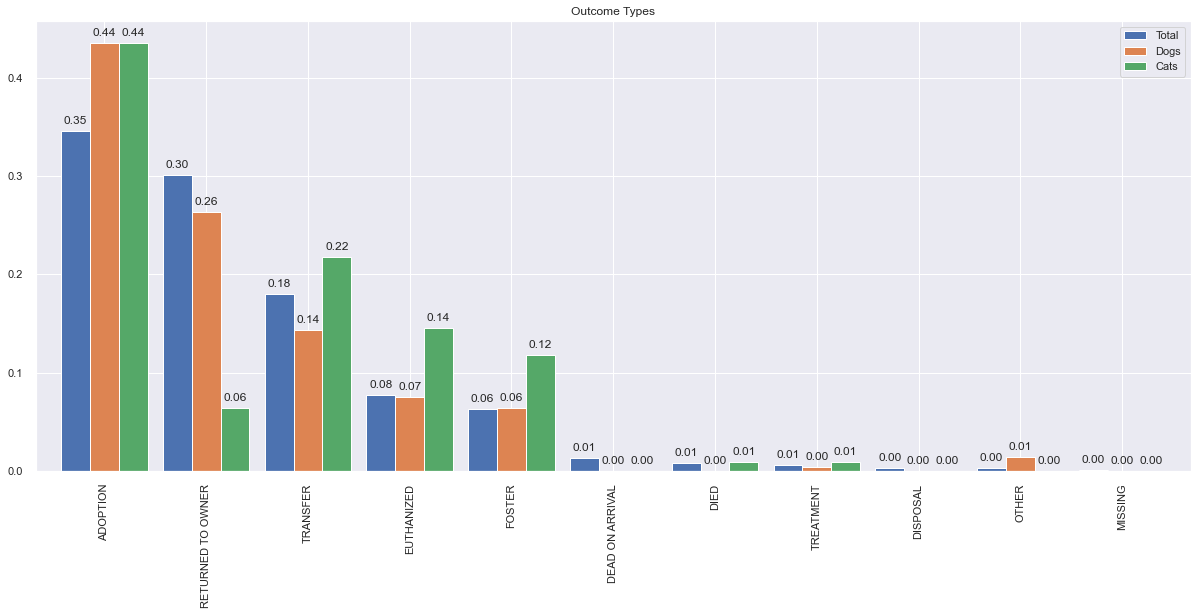

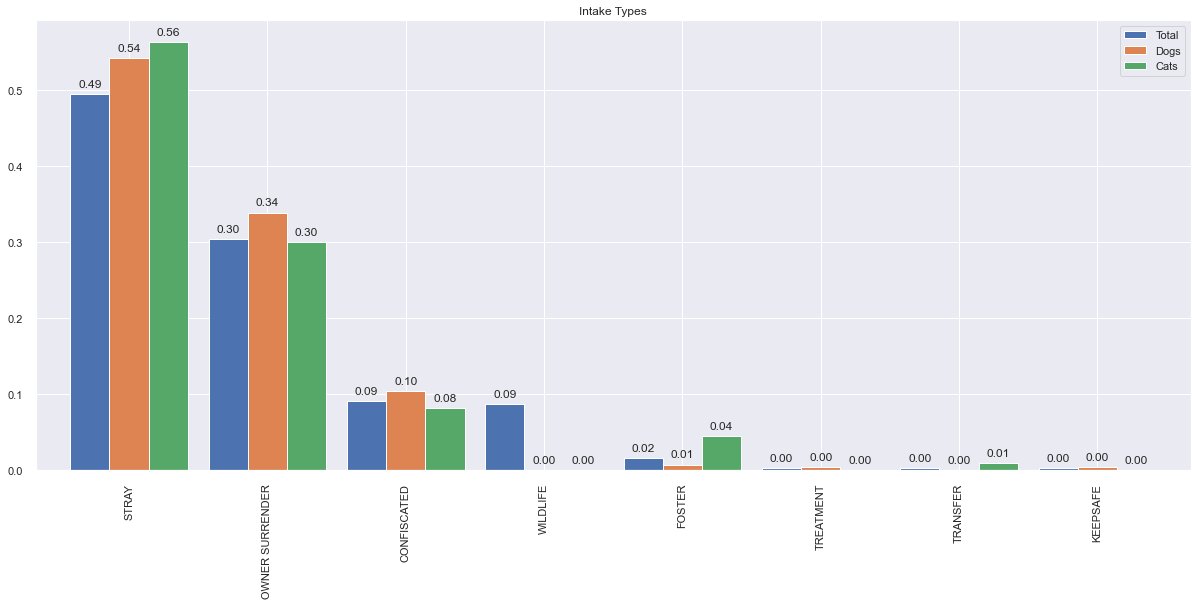

In [1000]:
cou10, c10i = runpercs(c10)

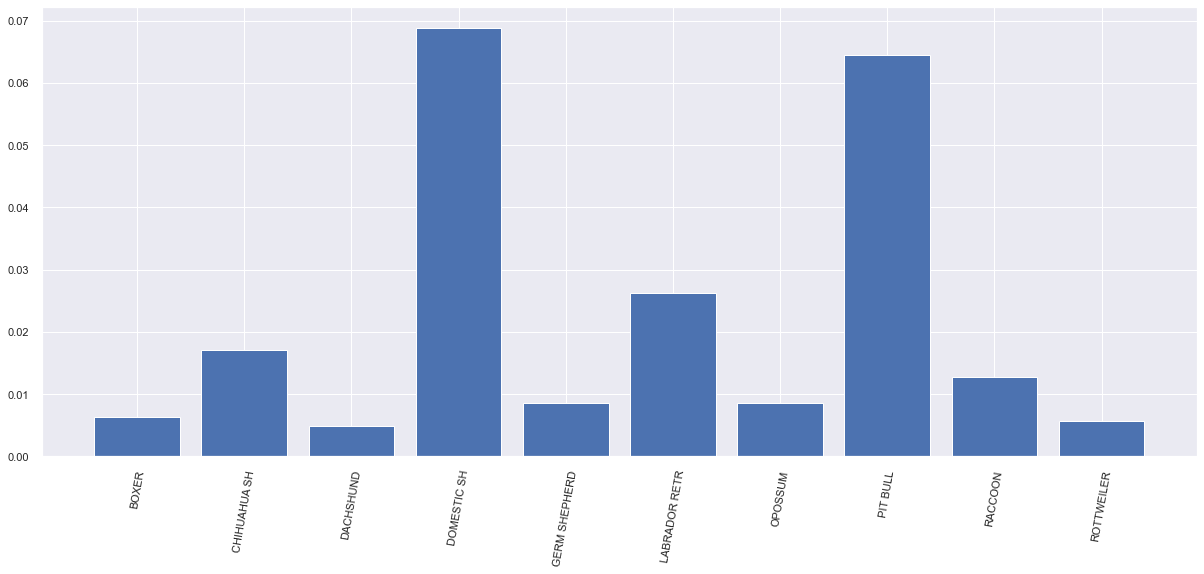

In [1001]:
c10breed = breads(c10)

In [790]:
c10['Intake Condition'].value_counts()

APP WNL                                   250
TREATABLE REHABILITABLE NON-CONTAGIOUS     76
APP SICK                                   21
APP INJ                                    21
DEAD                                       11
CRITICAL                                    7
UNKNOWN                                     7
UNDERAGE                                    4
UNHEALTHY UNTREATABLE NON-CONTAGIOUS        3
UNHEALTHY UNTREATABLE CONTAGIOUS            1
DECEASED                                    1
HEALTHY                                     1
Name: Intake Condition, dtype: int64

In [888]:
c10['Intake Subtype'].value_counts()

AT LARGE                      130
GENERAL                       105
CONFINED                       84
QUARANTINE                     29
RETURN30                       15
DEAD ON ARRIVAL                15
KEEP SAFE                      13
UNINJURED                      11
NON-RABIES                     11
RABIES                          9
INJURED                         7
APPOINT                         6
RETURN                          5
FIELD                           5
QUARANTINE DEAD ON ARRIVAL      2
TREATMENT                       2
OTC                             2
SAC                             1
HEART WORM                      1
CRUELTY                         1
SURGERY                         1
OWN ARREST                      1
Name: Intake Subtype, dtype: int64

In [1002]:
c10.Outcome_Days.mean()

5.187214611872146

<AxesSubplot:xlabel='Month', ylabel='count'>

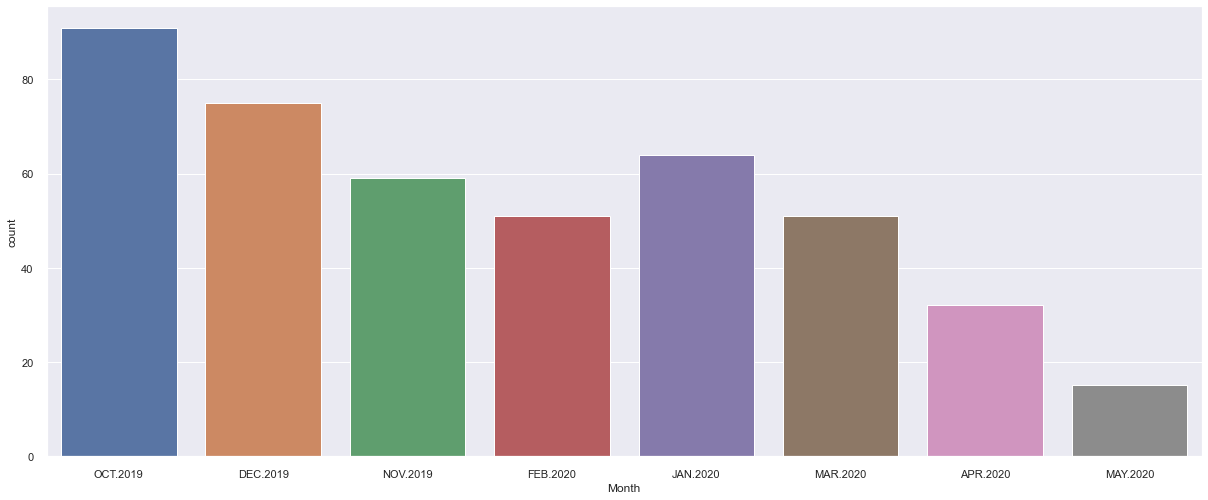

In [1032]:
sns.countplot(c10['Month'])

In [1108]:
c10.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    140.732188
DEC.2019    209.203600
FEB.2020    224.908235
JAN.2020    322.884219
MAR.2020    183.140588
MAY.2020     57.382000
NOV.2019    392.866949
OCT.2019    288.882418
Name: cost_of_care, dtype: float64

### Council District 11

In [546]:
c11.head()

Animal Id Animal Type    Animal Breed Kennel Number Kennel Status  \
147  A0905108         DOG       CATAHOULA     RECEIVING   UNAVAILABLE   
247  A0972122         DOG  AMERICAN STAFF       LFD 050     IMPOUNDED   
265  A0982428         DOG   PHARAOH HOUND     RECEIVING   UNAVAILABLE   
266  A0982428         DOG   PHARAOH HOUND     RECEIVING     IMPOUNDED   
271  A0984981         CAT     DOMESTIC SH       LFC 012   UNAVAILABLE   

    Activity Number  Activity Sequence Source Id Census Tract  \
147      A19-201705                  1  P9991721        13610   
247      A19-201862                  1  P9991758        19208   
265      A19-201700                  1  P9991721        13610   
266      A19-198855                  1  P0783041        13610   
271             NaN                  1  P0790002        19212   

    Council District      Intake Type Intake Subtype  Intake Total  \
147               11            STRAY       AT LARGE             1   
247               11            STRAY       CONFINED             1   
265               11            STRAY       AT LARGE             1   
266               11            STRAY       AT LARGE             1   
271               11  OWNER SURRENDER        GENERAL             1   

         Reason Staff Id Intake Date Intake Time    Due Out  \
147       OTHER   MG1718  2019-11-16    10:46:00 2019-11-16   
247  OTHRINTAKS   AR1758  2019-11-18    16:17:00 2019-11-24   
265       OTHER   MG1718  2019-11-16    10:58:00 2019-11-16   
266       OTHER   JC1574  2019-10-27    01:40:00 2019-10-27   
271     HOUSING       OT  2019-10-08    11:48:00 2019-10-08   

                           Intake Condition Hold Request       Outcome Type  \
147                                 APP WNL          NaN  RETURNED TO OWNER   
247                                 APP WNL   ADOP RESCU  RETURNED TO OWNER   
265                                 APP WNL          NaN  RETURNED TO OWNER   
266         TREATABLE MANAGEABLE CONTAGIOUS          NaN  RETURNED TO OWNER   
271  TREATABLE REHABILITABLE NON-CONTAGIOUS   ADOP RESCU           ADOPTION   

    Outcome Subtype Outcome Date Outcome Time Receipt Number Impound Number  \
147           FIELD   2019-11-16     10:47:00            NaN     K19-487663   
247         WALK IN   2019-11-20     15:42:00     R19-559381     K19-487929   
265           FIELD   2019-11-16     11:01:00            NaN     K19-487672   
266           FIELD   2019-10-27     01:45:00            NaN     K19-485123   
271       PROMOTION   2019-10-26     16:51:00     R19-557925     K19-482685   

    Service Request Number                       Outcome Condition  \
147                    NaN                                 APP WNL   
247                    NaN                                 APP WNL   
265                    NaN                                 APP WNL   
266                    NaN         TREATABLE MANAGEABLE CONTAGIOUS   
271                    NaN  TREATABLE REHABILITABLE NON-CONTAGIOUS   

        Chip Status     Animal Origin Additional Information     Month  
147  UNABLE TO SCAN             SWEEP                    NaN  NOV.2019  
247       SCAN CHIP             FIELD      RETURNED TO OWNER  NOV.2019  
265  UNABLE TO SCAN             SWEEP                    NaN  NOV.2019  
266       SCAN CHIP             FIELD                    NaN  OCT.2019  
271       SCAN CHIP  OVER THE COUNTER                ADOPTED  OCT.2019

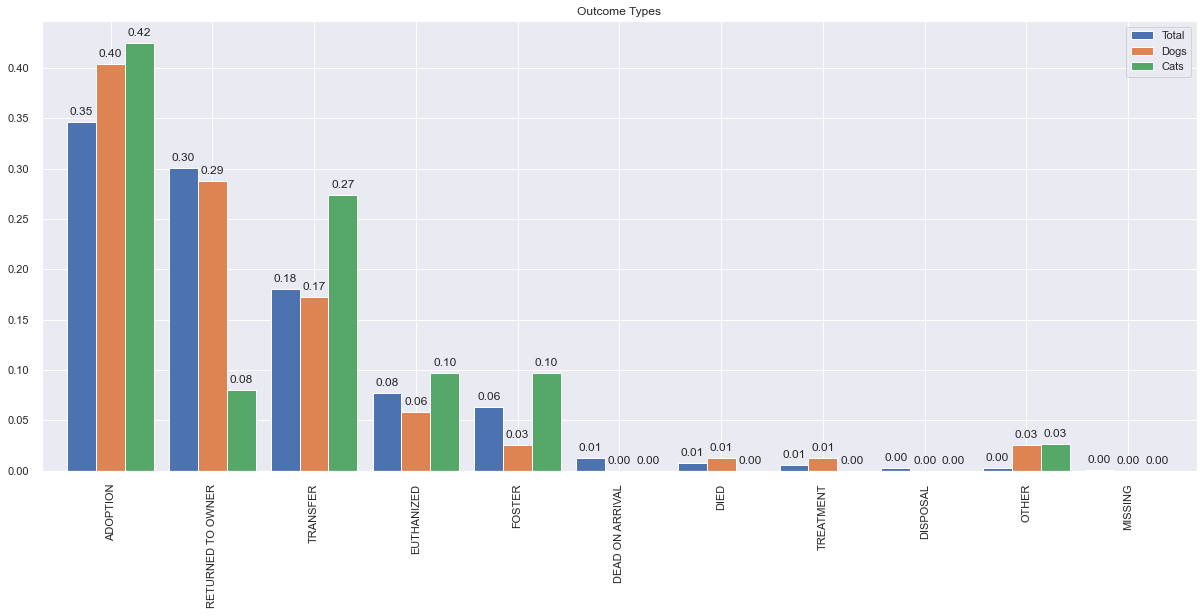

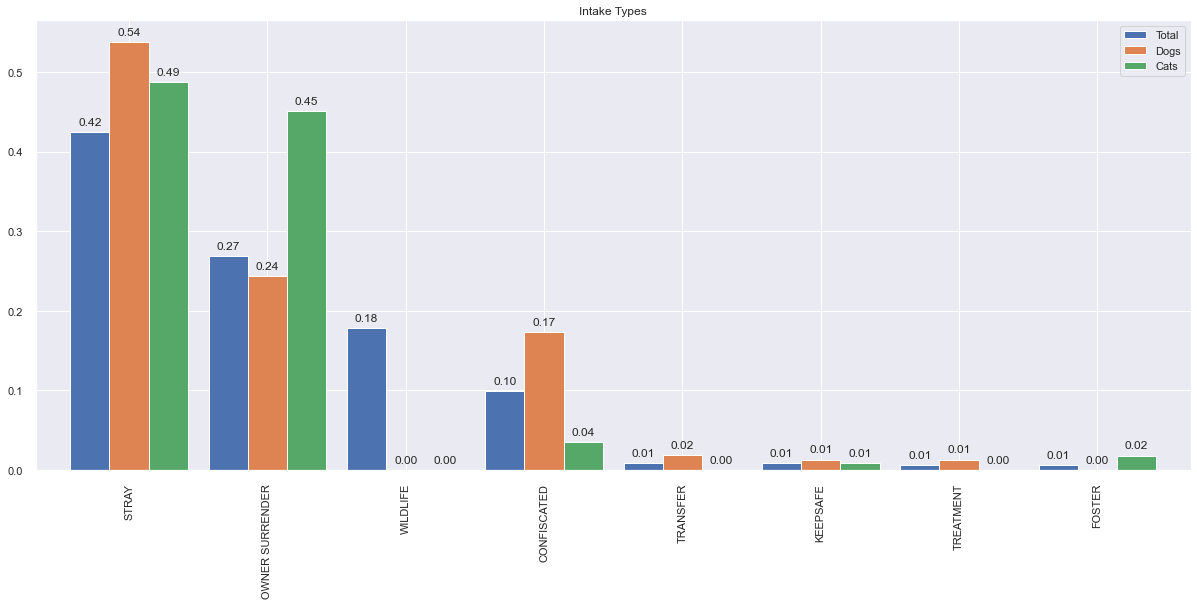

In [1003]:
cou11, c11i = runpercs(c11)

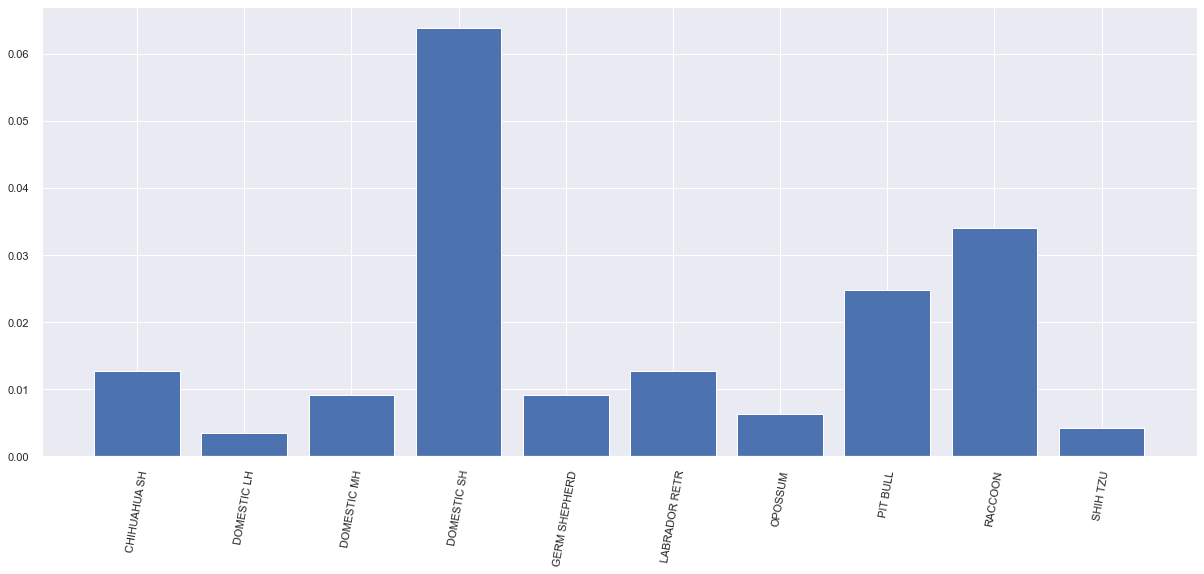

In [1004]:
c11breed = breads(c11)

In [1005]:
c11.Outcome_Days.mean()

4.038011695906433

<AxesSubplot:xlabel='Month', ylabel='count'>

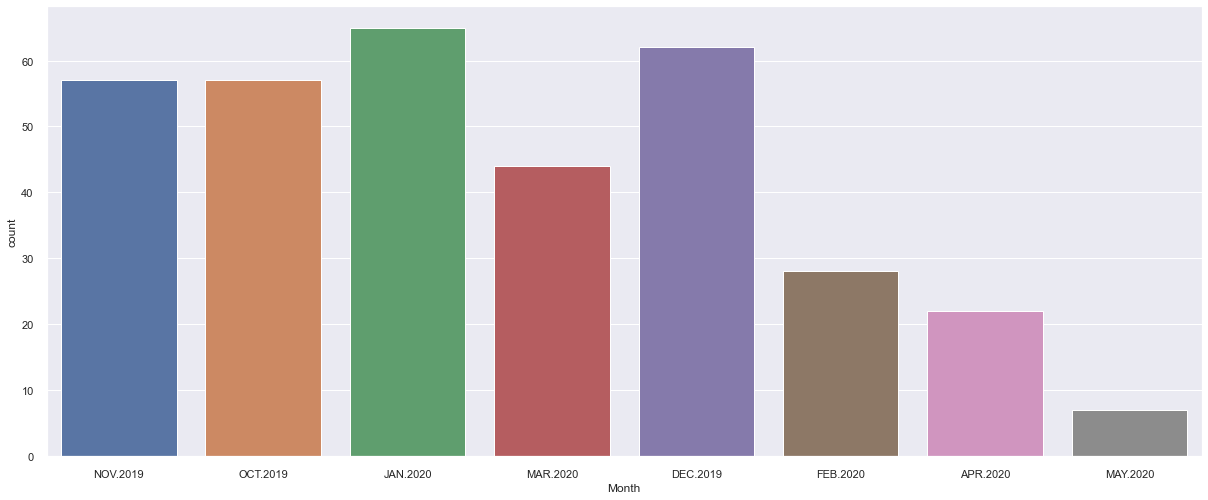

In [1034]:
sns.countplot(c11['Month'])

In [1109]:
c11.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    102.332273
DEC.2019    182.234194
FEB.2020    198.654286
JAN.2020    222.828615
MAR.2020    123.457727
MAY.2020     21.602857
NOV.2019    236.219474
OCT.2019    343.576316
Name: cost_of_care, dtype: float64

### Council District 12

In [548]:
c12.head()

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
56   A0761950         DOG        MALTESE         SMD12   UNAVAILABLE   
70   A0783918         DOG  GERM SHEPHERD         VIP05   UNAVAILABLE   
135  A0889908         DOG   CHIHUAHUA SH       LFD 082     IMPOUNDED   
136  A0889908         DOG   CHIHUAHUA SH       LFSD 19     IMPOUNDED   
137  A0889908         DOG   CHIHUAHUA SH       LFSD 22     IMPOUNDED   

    Activity Number  Activity Sequence Source Id Census Tract  \
56              NaN                  1  P0000000        13618   
70              NaN                  1  P0885710        21635   
135             NaN                  1  P0909080        31709   
136             NaN                  1  P0908033        31709   
137             NaN                  1  P0907575        31709   

    Council District      Intake Type Intake Subtype  Intake Total  \
56                12            STRAY       AT LARGE             1   
70                12  OWNER SURRENDER        GENERAL             1   
135               12            STRAY       AT LARGE             1   
136               12            STRAY       AT LARGE             1   
137               12            STRAY       AT LARGE             1   

         Reason Staff Id Intake Date Intake Time    Due Out  \
56   OTHRINTAKS       KC  2019-10-19    10:45:00 2019-10-19   
70   PERSNLISSU       DL  2019-11-16    13:46:00 2019-11-16   
135  OTHRINTAKS      CDM  2019-11-24    14:41:00 2019-12-01   
136  OTHRINTAKS       JR  2019-11-16    10:15:00 2019-11-22   
137  OTHRINTAKS       DL  2019-11-12    12:57:00 2019-11-18   

                           Intake Condition Hold Request       Outcome Type  \
56   TREATABLE REHABILITABLE NON-CONTAGIOUS     ADOPTION           ADOPTION   
70                                  APP WNL   ADOP RESCU           TRANSFER   
135                                 APP WNL   ADOP RESCU  RETURNED TO OWNER   
136                                 APP WNL          RTO  RETURNED TO OWNER   
137                                 APP WNL   ADOP RESCU  RETURNED TO OWNER   

    Outcome Subtype Outcome Date Outcome Time Receipt Number Impound Number  \
56          WALK IN   2019-10-20     12:06:00     R19-557543     K19-484112   
70          GENERAL   2019-12-04     13:39:00            NaN     K19-487699   
135         WALK IN   2019-11-26     14:56:00     R19-559747     K19-488701   
136         WALK IN   2019-11-18     14:10:00     R19-559296     K19-487656   
137         WALK IN   2019-11-14     15:29:00     R19-559074     K19-487168   

    Service Request Number                       Outcome Condition  \
56                     NaN  TREATABLE REHABILITABLE NON-CONTAGIOUS   
70                     NaN                                 APP WNL   
135                    NaN                                 APP WNL   
136                    NaN                                 APP WNL   
137                    NaN                                 APP WNL   

    Chip Status     Animal Origin Additional Information     Month  
56    SCAN CHIP  OVER THE COUNTER          ADOPT PENDING  OCT.2019  
70    SCAN CHIP  OVER THE COUNTER               DFW MEGA  NOV.2019  
135   SCAN CHIP  OVER THE COUNTER                    NaN  NOV.2019  
136   SCAN CHIP  OVER THE COUNTER      RETURNED TO OWNER  NOV.2019  
137   SCAN CHIP  OVER THE COUNTER      RETURNED TO OWNER  NOV.2019

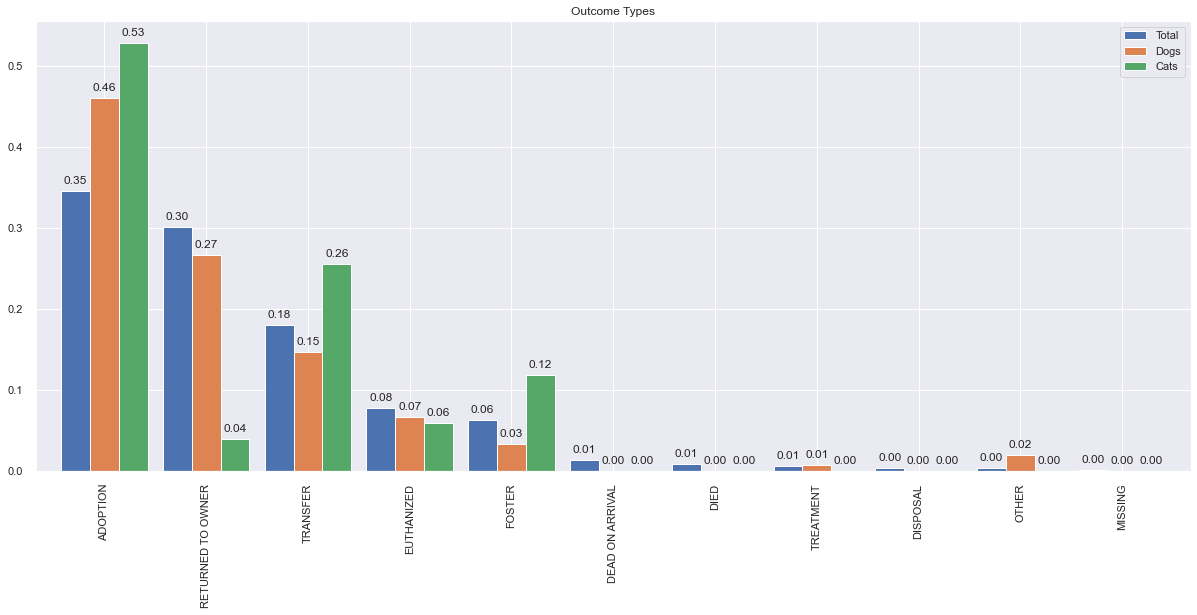

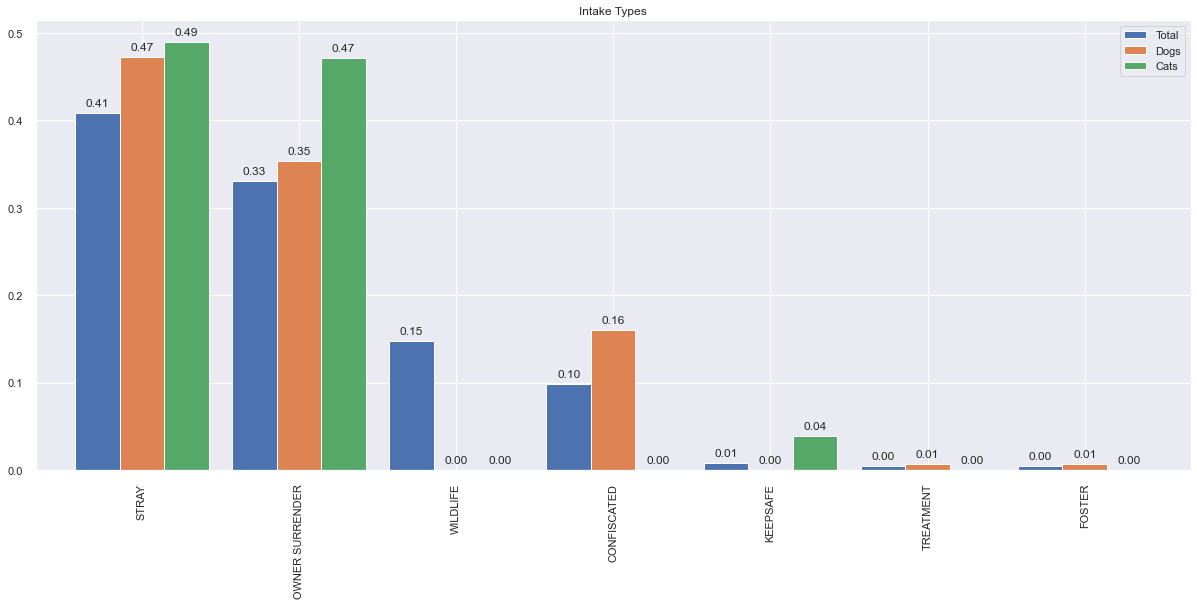

In [1006]:
cou12, c12i = runpercs(c12)

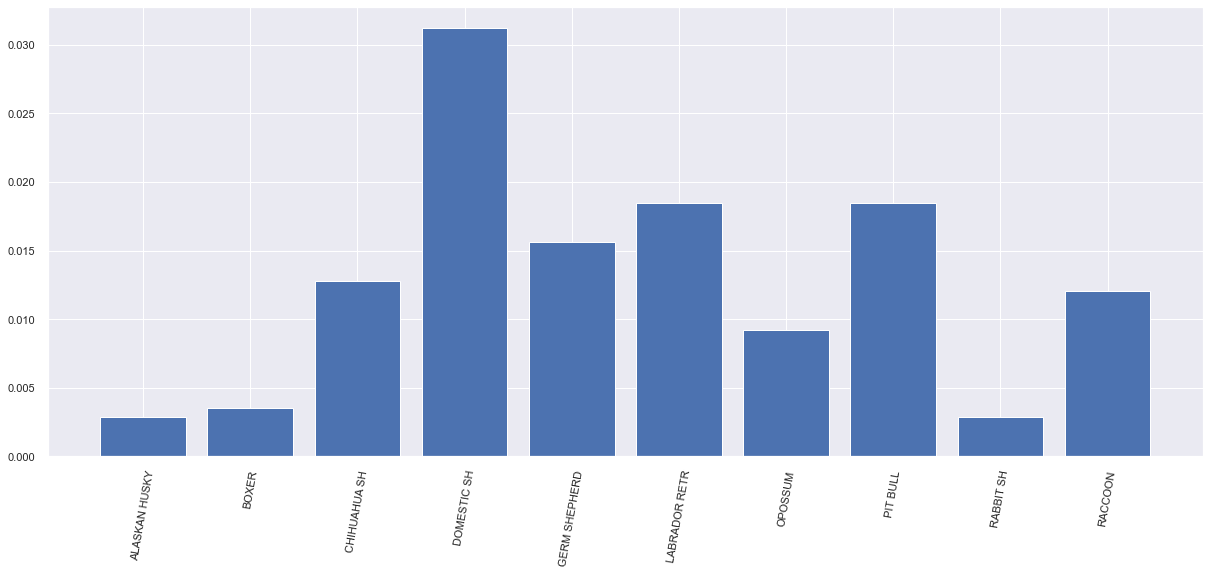

In [1007]:
c12breed = breads(c12)

In [1008]:
c12.Outcome_Days.mean()

3.926530612244898

<AxesSubplot:xlabel='Month', ylabel='count'>

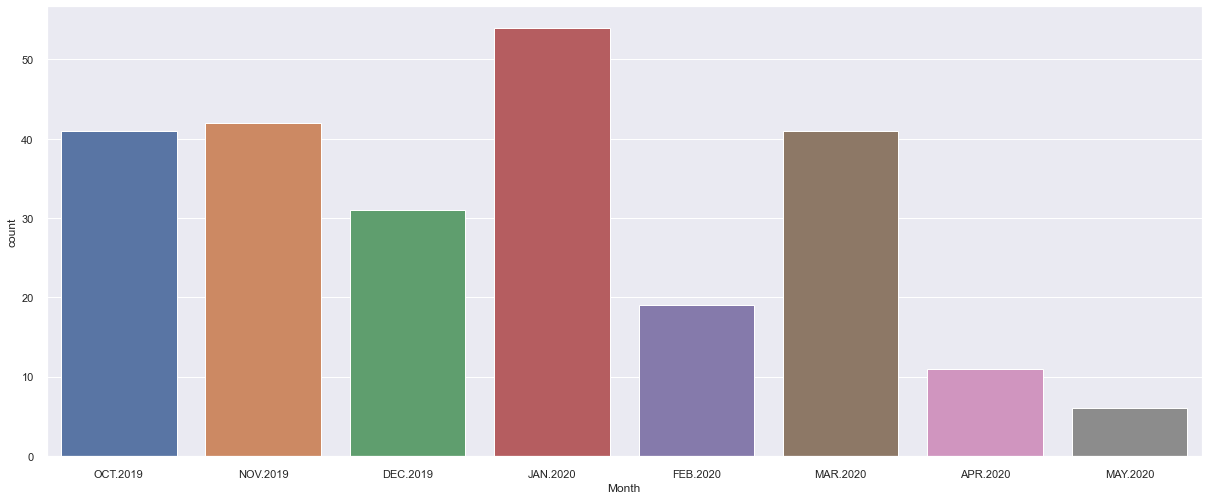

In [1033]:
sns.countplot(c12['Month'])

In [1110]:
c12.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    121.697273
DEC.2019    234.707097
FEB.2020    285.141579
JAN.2020    181.031111
MAR.2020    189.882683
MAY.2020     74.165000
NOV.2019    212.486429
OCT.2019    237.114390
Name: cost_of_care, dtype: float64

### Council District 13

In [1291]:
c13.head()


Animal Id Animal Type     Animal Breed Kennel Number Kennel Status  \
93   A0844952         CAT      DOMESTIC LH       LFC 037     AVAILABLE   
367  A1013646         DOG  DOBERMAN PINSCH        AD 069     AVAILABLE   
478  A1031584         DOG    GERM SHEPHERD     FAM GP 02   UNAVAILABLE   
570  A1091479         DOG    LABRADOR RETR         DC 05     IMPOUNDED   
913  A1066113         DOG    LABRADOR RETR         VIP25     AVAILABLE   

    Activity Number  Activity Sequence Source Id Census Tract  \
93       A19-203055                  1  P0673581         7820   
367             NaN                  1  P0886489         7823   
478             NaN                  1  P0910667         7820   
570      A19-206739                  1  P9991751         9607   
913      A19-195363                  1  P0902559         7906   

    Council District      Intake Type        Intake Subtype  Intake Total  \
93                13  OWNER SURRENDER  EUTHANASIA REQUESTED             1   
367               13  OWNER SURRENDER               APPOINT             1   
478               13  OWNER SURRENDER               GENERAL             1   
570               13            STRAY              AT LARGE             1   
913               13  OWNER SURRENDER               GENERAL             1   

         Reason Staff Id Intake Date Intake Time    Due Out  \
93      MEDICAL   VD1770  2019-11-26    18:26:00 2019-11-26   
367  PERSNLISSU       DL  2019-11-26    13:55:00 2019-11-26   
478       OTHER       JR  2019-12-07    16:44:00 2019-12-13   
570  OTHRINTAKS   EP1751  2019-12-22    04:35:00 2019-12-27   
913  OTHRINTAKS   LU1778  2019-10-01    15:22:00 2019-10-01   

                           Intake Condition Hold Request       Outcome Type  \
93                                 APP SICK          NaN         EUTHANIZED   
367                                 APP WNL   ADOP RESCU           ADOPTION   
478                                 APP WNL   ADOP RESCU           ADOPTION   
570                                 APP WNL   ADOP RESCU  RETURNED TO OWNER   
913  TREATABLE REHABILITABLE NON-CONTAGIOUS   ADOP RESCU           ADOPTION   

    Outcome Subtype Outcome Date Outcome Time Receipt Number Impound Number  \
93           HUMANE   2019-11-27     16:30:00            NaN     K19-488955   
367         OFFSITE   2019-12-04     13:18:00     R19-560351     K19-488931   
478         WALK IN   2019-12-13     14:34:00     R19-560600     K19-490084   
570         WALK IN   2019-12-24     14:31:00     R19-561415     K19-491671   
913         OFFSITE   2019-10-05     15:51:00     R19-556809     K19-481836   

    Service Request Number                       Outcome Condition  \
93                     NaN                                APP SICK   
367                    NaN                                 APP WNL   
478                    NaN                                 APP WNL   
570                    NaN                                 APP WNL   
913                    NaN  TREATABLE REHABILITABLE NON-CONTAGIOUS   

        Chip Status     Animal Origin      Additional Information     Month  \
93        SCAN CHIP             FIELD                         NaN  NOV.2019   
367  UNABLE TO SCAN  OVER THE COUNTER                    GALLERIA  NOV.2019   
478       SCAN CHIP  OVER THE COUNTER                 PRE-ADOPTED  DEC.2019   
570    SCAN NO CHIP             FIELD  RETURNED TO OWNER SX 12/24  DEC.2019   
913       SCAN CHIP             FIELD                    ADOPTION  OCT.2019   

     Outcome_Days  cost_of_care stay_category  
93            1.0         93.53     0-60 Days  
367           8.0        364.64     0-60 Days  
478           6.0        287.18     0-60 Days  
570           2.0        132.26     0-60 Days  
913           4.0        209.72     0-60 Days

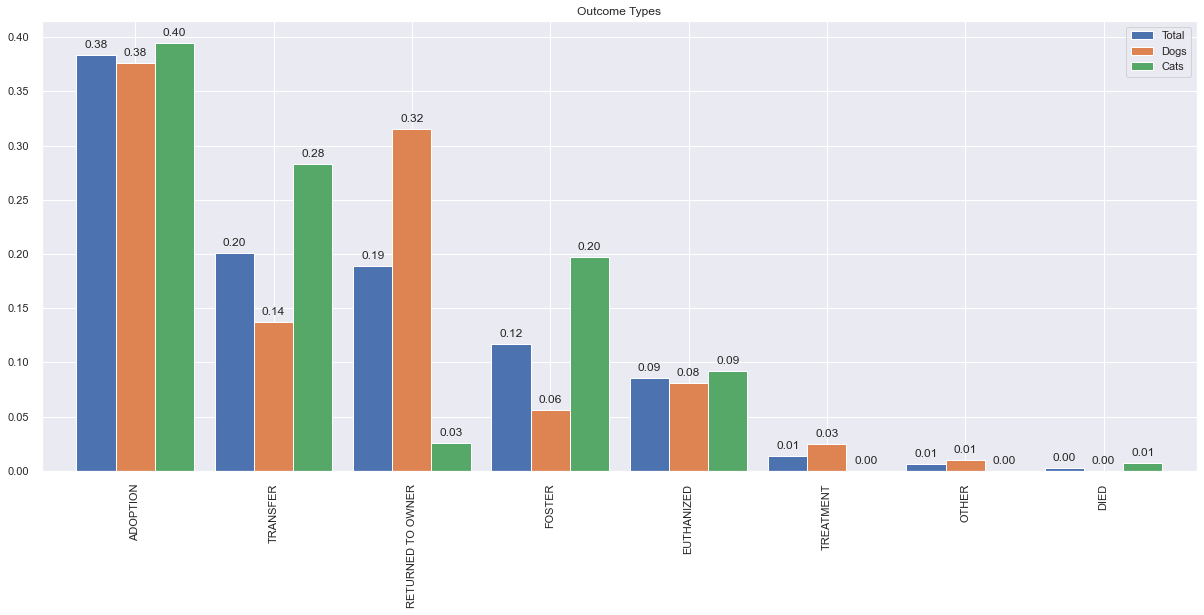

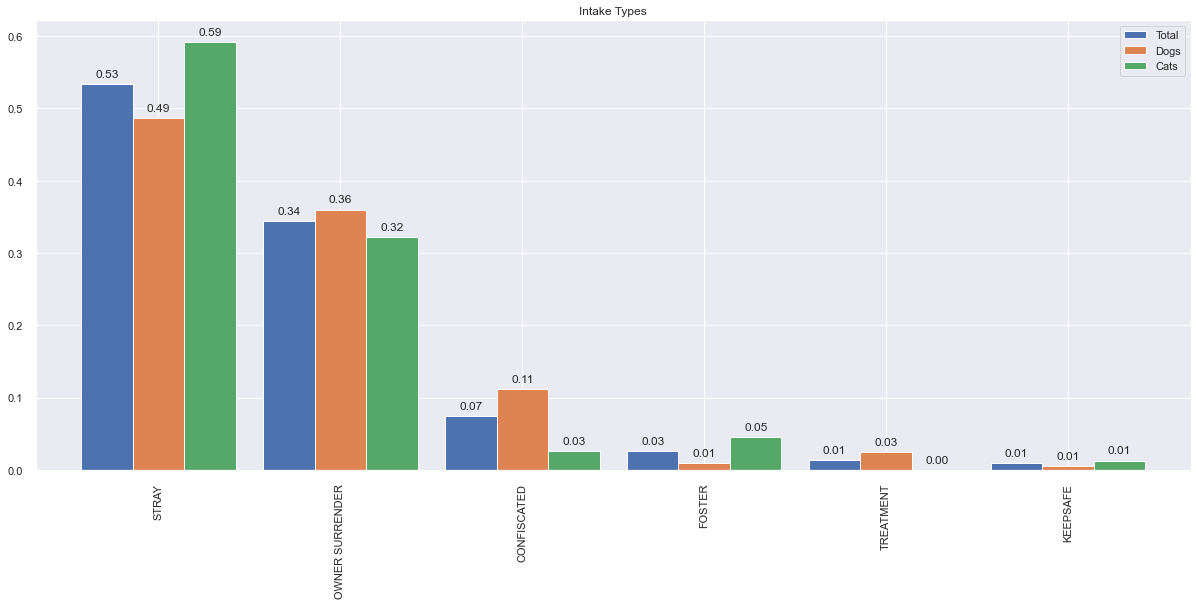

In [1292]:
cou13, c13i = runpercs(c13)

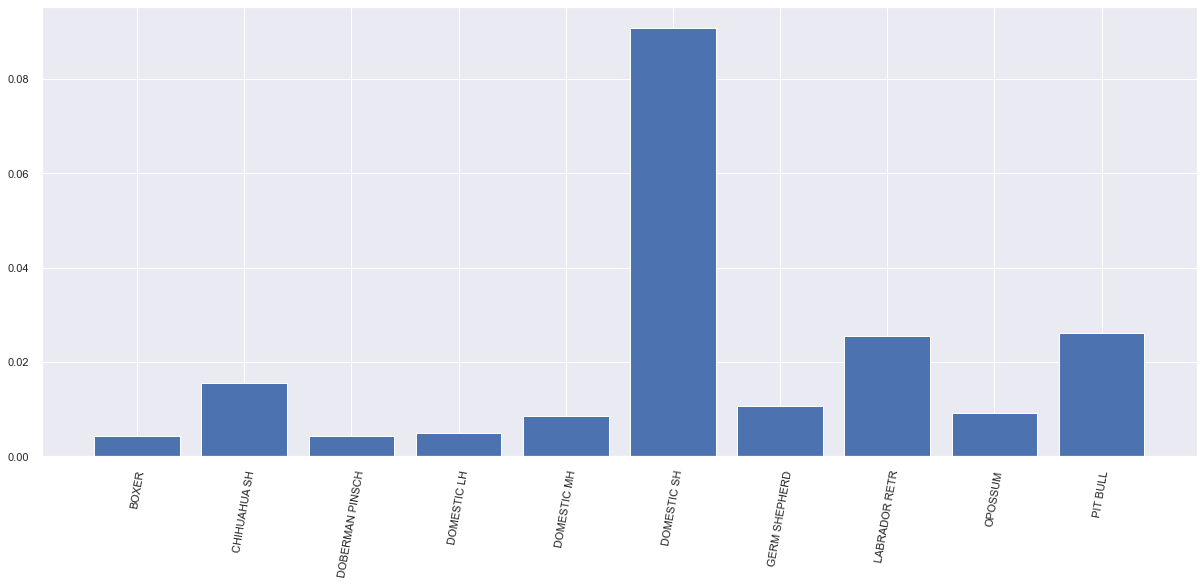

In [1010]:
c13breed = breads(c13)

In [1011]:
c13.Outcome_Days.mean()

5.361038961038961

<AxesSubplot:xlabel='Month', ylabel='count'>

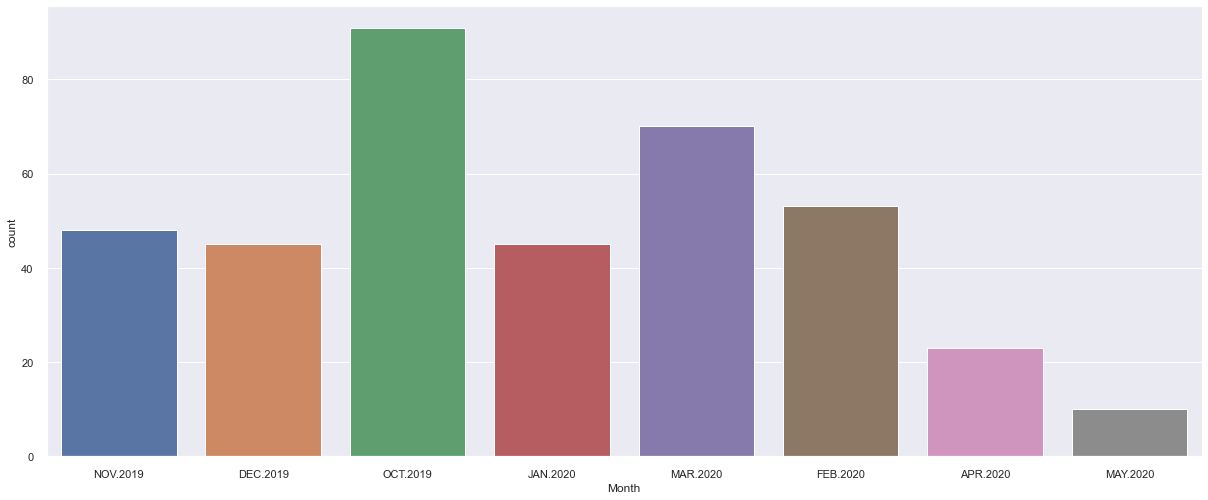

In [1035]:
sns.countplot(c13['Month'])

In [1271]:
c13['Outcome_Days'].value_counts()

 0.0     63
 2.0     48
 1.0     42
 4.0     40
 3.0     25
 5.0     22
 6.0     17
 7.0     13
 9.0     10
 10.0     7
 12.0     6
 8.0      5
-1.0      5
 13.0     4
 11.0     4
 18.0     4
 21.0     4
 14.0     3
 38.0     2
 17.0     2
 16.0     2
 26.0     2
 19.0     2
 36.0     2
 20.0     2
 29.0     2
 32.0     1
 55.0     1
 44.0     1
 35.0     1
 23.0     1
 30.0     1
 15.0     1
 31.0     1
 27.0     1
 43.0     1
 62.0     1
Name: Outcome_Days, dtype: int64

In [1293]:
fos13 = c13.loc[c13['Outcome Type'] == 'FOSTER']

In [1294]:
fos13['Outcome_Days'].value_counts()

1.0     9
0.0     9
2.0     6
7.0     4
6.0     3
8.0     2
23.0    1
3.0     1
26.0    1
4.0     1
12.0    1
16.0    1
13.0    1
29.0    1
Name: Outcome_Days, dtype: int64

In [1295]:
fos13.shape

(41, 35)

In [1223]:
c13.shape

(385, 35)

In [1274]:
c13.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    175.293333
DEC.2019    289.069268
FEB.2020    215.035882
JAN.2020    283.103158
MAR.2020    217.097143
MAY.2020     43.734286
NOV.2019    355.837727
OCT.2019    363.304483
Name: cost_of_care, dtype: float64

In [1285]:
lows13 = c13.loc[c13['Outcome_Days'].isin([0,1,2,3])]

In [1286]:
lows13['Outcome Type'].value_counts()

RETURNED TO OWNER    49
ADOPTION             46
TRANSFER             38
FOSTER               25
EUTHANIZED           14
TREATMENT             5
DIED                  1
Name: Outcome Type, dtype: int64

In [1287]:
lows13.shape

(178, 35)

In [1289]:
c13.shape

(349, 35)

In [1290]:
c13.loc[c13['Outcome Type'] == 'TRANSFER']

Animal Id Animal Type     Animal Breed Kennel Number  \
1862   A1081378         DOG         PIT BULL       NMOMS 1   
2409   A1084092         DOG    LABRADOR RETR            F1   
3020   A1084666         CAT      DOMESTIC SH     RECEIVING   
3284   A1084921         DOG     CHIHUAHUA LH       LFD 056   
3285   A1084922         DOG      RAT TERRIER       LFD 030   
3288   A1084925         DOG     BASSET HOUND       LFD 030   
3455   A1085068         CAT      DOMESTIC SH       LFC 013   
3786   A1085377         CAT      DOMESTIC MH       LFC 082   
4190   A1085777         DOG    GERM SHEPHERD        PCD 07   
4294   A1085868         DOG    LABRADOR RETR       LFD 040   
4296   A1085870         DOG    LABRADOR RETR        AD 093   
4402   A1085949         CAT      DOMESTIC MH       LFC 089   
4707   A1086257         CAT      DOMESTIC SH       LFC 052   
4709   A1086258         CAT      DOMESTIC MH       LFC 053   
5161   A1086704         DOG     CHIHUAHUA SH         CC 12   
5162   A1086705         DOG     CHIHUAHUA SH         CC 12   
5163   A1086706         CAT      DOMESTIC MH        AC 021   
5165   A1086708         CAT      DOMESTIC MH         VT 10   
5179   A1086720         DOG       ROTTWEILER           K02   
5180   A1086721         DOG       ROTTWEILER           K02   
5299   A1086833         DOG  ST BERNARD SMTH         VIP16   
5307   A1086839         DOG         PIT BULL        AD 031   
6516   A1088010         CAT      DOMESTIC SH       LFC 003   
7134   A1088672         CAT      DOMESTIC SH       LFC 004   
7480   A1090150         DOG     CHIHUAHUA SH          HOME   
7636   A1089218         CAT      DOMESTIC MH       LFC 008   
8002   A1089636         CAT      DOMESTIC SH         CC 30   
9505   A1091605         CAT      DOMESTIC SH       LFC 037   
9611   A0886845         DOG     CHIHUAHUA SH        AD 091   
10654  A1093409         DOG    LABRADOR RETR        PCD 10   
10997  A1092026         DOG     CHIHUAHUA SH         SMD02   
11319  A1091612         DOG    ALASKAN HUSKY        AD 006   
11671  A1091936         DOG  AM PIT BULL TER     FAM GP 03   
11792  A1093429         DOG     CHIHUAHUA LH         VT 09   
12626  A1089241         DOG    GERM SHEPHERD         VIP24   
13685  A1014746         DOG    LABRADOR RETR        AD 060   
14018  A1095011         CAT      DOMESTIC SH       LFC 007   
14568  A1095505         CAT      DOMESTIC SH       LFC 012   
14617  A1096248         CAT      DOMESTIC SH       LFC 010   
15327  A1096579         CAT      DOMESTIC SH         VT 08   
15854  A1096578         CAT      DOMESTIC SH         VT 08   
15935  A1094659         CAT      DOMESTIC SH       LFC 060   
16037  A1094654         CAT      DOMESTIC SH       LFC 011   
16086  A1094662         CAT      DOMESTIC SH       LFC 059   
16132  A1096580         CAT      DOMESTIC SH         VT 08   
16946  A1095921         CAT      DOMESTIC SH         VT 09   
17594  A1098878         CAT      DOMESTIC SH       LFC 041   
17642  A1096249         CAT          SIAMESE       LFC 031   
17950  A1095427         CAT      DOMESTIC SH         AK 01   
18366  A1097999         CAT      DOMESTIC MH       LFC 044   
18389  A1096751         DOG         SHIH TZU      INJD 015   
18987  A1097247         CAT      DOMESTIC SH       LFC 044   
19674  A1099137         CAT      DOMESTIC SH           K01   
19771  A1099140         CAT      DOMESTIC SH           K01   
19841  A1099136         CAT      DOMESTIC SH           K01   
19846  A1099139         CAT      DOMESTIC SH           K01   
19915  A1098595         CAT      DOMESTIC SH         IC 13   
19976  A1098600         CAT      DOMESTIC SH         IC 13   
19990  A1098596         CAT      DOMESTIC SH         IC 13   
19991  A1098602         CAT      DOMESTIC SH         IC 13   
20010  A1098601         CAT      DOMESTIC SH         IC 13   
20023  A1098598         CAT      DOMESTIC SH         IC 13   
20087  A1098599         CAT      DOMESTIC SH         IC 13   
20106  A1099246         CAT      DOMES

In [1296]:
c13.loc[c13['Month'] == 'MAY.2020']

Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
22058  A1100652         CAT    DOMESTIC SH           N01   UNAVAILABLE   
22276  A1100860         DOG  BORDER COLLIE         QD 18   UNAVAILABLE   
22327  A1088930         DOG       PIT BULL         VIP06     AVAILABLE   
22405  A1100853         DOG  COLLIE SMOOTH        PUPS 1   UNAVAILABLE   
22413  A1100904         DOG  LABRADOR RETR       LFSD 12     IMPOUNDED   
22414  A1100806         DOG  LABRADOR RETR       LFD 066   UNAVAILABLE   
22554  A1100905         DOG  LABRADOR RETR       LFSD 11     IMPOUNDED   

      Activity Number  Activity Sequence Source Id Census Tract  \
22058      A20-222231                  1  P0926340         7821   
22276      A20-222689                  1  P0926644         9611   
22327             NaN                  1  P0549409         9607   
22405      A20-222666                  1  P9991765         9611   
22413      A20-222789                  1  P9991772         7302   
22414             NaN                  1  P0916317         9611   
22554      A20-222789                  1  P9991772         7302   

      Council District      Intake Type Intake Subtype  Intake Total  \
22058               13            STRAY       CONFINED             1   
22276               13      CONFISCATED     QUARANTINE             1   
22327               13  OWNER SURRENDER        GENERAL             1   
22405               13            STRAY       AT LARGE             1   
22413               13            STRAY       AT LARGE             1   
22414               13  OWNER SURRENDER        GENERAL             1   
22554               13            STRAY       AT LARGE             1   

           Reason Staff Id Intake Date Intake Time    Due Out  \
22058  OTHRINTAKS  ERB1768  2020-05-02    19:51:00 2020-05-02   
22276  OTHRINTAKS  AKB1780  2020-05-06    22:10:00 2020-05-16   
22327     MEDICAL      LES  2020-05-05    15:48:00 2020-05-05   
22405  OTHRINTAKS  RKB1765  2020-05-06    18:21:00 2020-05-08   
22413       OTHER  ROB1772  2020-05-07    21:04:00 2020-05-11   
22414  PERSNLISSU      IFM  2020-05-06    11:10:00 2020-05-06   
22554       OTHER  ROB1772  2020-05-07    21:04:00 2020-05-11   

      Intake Condition Hold Request Outcome Type Outcome Subtype Outcome Date  \
22058          APP WNL      NEONATE       FOSTER        UNDERAGE   2020-05-03   
22276          APP WNL   QUARANTINE        OTHER           OTHER          NaT   
22327          APP WNL   ADOP RESCU        OTHER           OTHER          NaT   
22405          APP INJ   ADOP RESCU     ADOPTION       TELEADOPT          NaT   
22413          APP WNL   ADOP RESCU     TRANSFER       TRANSPORT          NaT   
22414          APP WNL   ADOP RESCU     ADOPTION       TELEADOPT   2020-05-08   
22554          APP WNL   ADOP RESCU     ADOPTION       TELEADOPT          NaT   

      Outcome Time Receipt Number Impound Number Service Request Number  \
22058     14:43:00            NaN     K20-504065                    NaN   
22276     00:00:00            NaN     K20-504345                    NaN   
22327     00:00:00            NaN     K20-504235                    NaN   
22405     00:00:00     R20-567268     K20-504336                    NaN   
22413     00:00:00            NaN     K20-504400                    NaN   
22414     12:18:00     R20-567267     K20-504282                    NaN   
22554     00:00:00     R20-567274     K20-504401                    NaN   

      Outcome Condition   Chip Status     Animal Origin  \
22058          UNDERAGE  SCAN NO CHIP             FIELD   
22276               NaN     SCAN CHIP             FIELD   
22327               NaN     SCAN CHIP  OVER THE COUNTER   
22405           APP INJ  SCAN NO CHIP             FIELD   
22413           APP WNL  SCAN NO CHIP             FIELD   
22414           APP WNL     SCAN CHIP  OVER THE COUNTER   
22554           APP WNL  SCAN NO CHIP             FIELD   

      Additional Information     Month  Outcome_Days  c

In [1300]:
c13['cost_of_care'].sum()

97979.48

### Council District 14

In [552]:
c14.head()


Animal Id Animal Type   Animal Breed Kennel Number Kennel Status  \
10   A0603122         DOG   CHIHUAHUA SH         VT 08   UNAVAILABLE   
22   A0689860         DOG     ROTTWEILER        LAB 04           LAB   
58   A0764783         DOG   CHIHUAHUA SH       LFD 084   UNAVAILABLE   
85   A0829001         DOG  LABRADOR RETR         ID18B     IMPOUNDED   
142  A0896256         DOG  BORDER COLLIE        PCD 21   UNAVAILABLE   

    Activity Number  Activity Sequence Source Id Census Tract  \
10              NaN                  1  P0908431         1400   
22       A19-197970                  1  P0531548         1301   
58              NaN                  1  P0903301         1800   
85       A19-199338                  1  P9991748         1101   
142      A19-200586                  1  P0702666          702   

    Council District      Intake Type Intake Subtype  Intake Total  \
10                14  OWNER SURRENDER        GENERAL             1   
22                14      CONFISCATED     QUARANTINE             1   
58                14            STRAY       AT LARGE             1   
85                14            STRAY       AT LARGE             1   
142               14      CONFISCATED      KEEP SAFE             1   

         Reason Staff Id Intake Date Intake Time    Due Out  \
10    FINANCIAL       BW  2019-11-19    11:25:00 2019-11-19   
22     BEHAVIOR      CBU  2019-10-20    15:05:00 2019-10-30   
58   OTHRINTAKS      CDM  2019-10-07    11:24:00 2019-10-13   
85   OTHRINTAKS   MM1748  2019-10-30    16:32:00 2019-11-03   
142  OTHRINTAKS   MM1748  2019-11-08    21:37:00 2019-11-18   

                           Intake Condition      Hold Request  \
10                                  APP WNL  EMERGENCY RESCUE   
22     UNHEALTHY UNTREATABLE NON-CONTAGIOUS   RABIES SPECIMEN   
58   TREATABLE REHABILITABLE NON-CONTAGIOUS        ADOP RESCU   
85   TREATABLE REHABILITABLE NON-CONTAGIOUS               NaN   
142                                 APP WNL               NaN   

          Outcome Type     Outcome Subtype Outcome Date Outcome Time  \
10            TRANSFER  MEDICAL-CONTAGIOUS   2019-11-21     11:37:00   
22          EUTHANIZED                BITE   2019-10-21     17:05:00   
58            ADOPTION             WALK IN   2019-10-13     10:11:00   
85   RETURNED TO OWNER             WALK IN   2019-10-31     12:41:00   
142  RETURNED TO OWNER             WALK IN   2019-11-09     10:48:00   

    Receipt Number Impound Number Service Request Number  \
10             NaN     K19-488009                    NaN   
22             NaN     K19-484321                    NaN   
58      R19-556967     K19-482570                    NaN   
85      R19-558171     K19-485602                    NaN   
142     R19-558724     K19-486771                    NaN   

                          Outcome Condition Chip Status     Animal Origin  \
10                                  APP WNL   SCAN CHIP  OVER THE COUNTER   
22     UNHEALTHY UNTREATABLE NON-CONTAGIOUS   SCAN CHIP  OVER THE COUNTER   
58   TREATABLE REHABILITABLE NON-CONTAGIOUS   SCAN CHIP  OVER THE COUNTER   
85   TREATABLE REHABILITABLE NON-CONTAGIOUS   SCAN CHIP             FIELD   
142                                 APP WNL   SCAN CHIP             FIELD   

    Additional Information     Month  
10                     NaN  NOV.2019  
22                     NaN  OCT.2019  
58             PRE-ADOPTED  OCT.2019  
85       RETURNED TO OWNER  OCT.2019  
142      RETURNED TO OWNER  NOV.2019

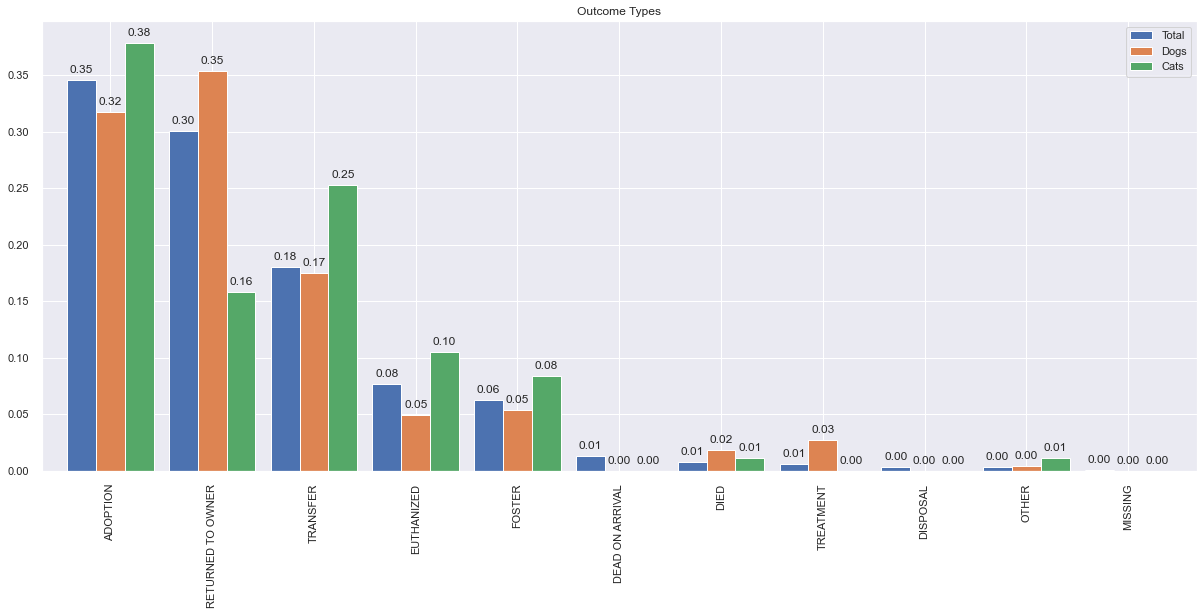

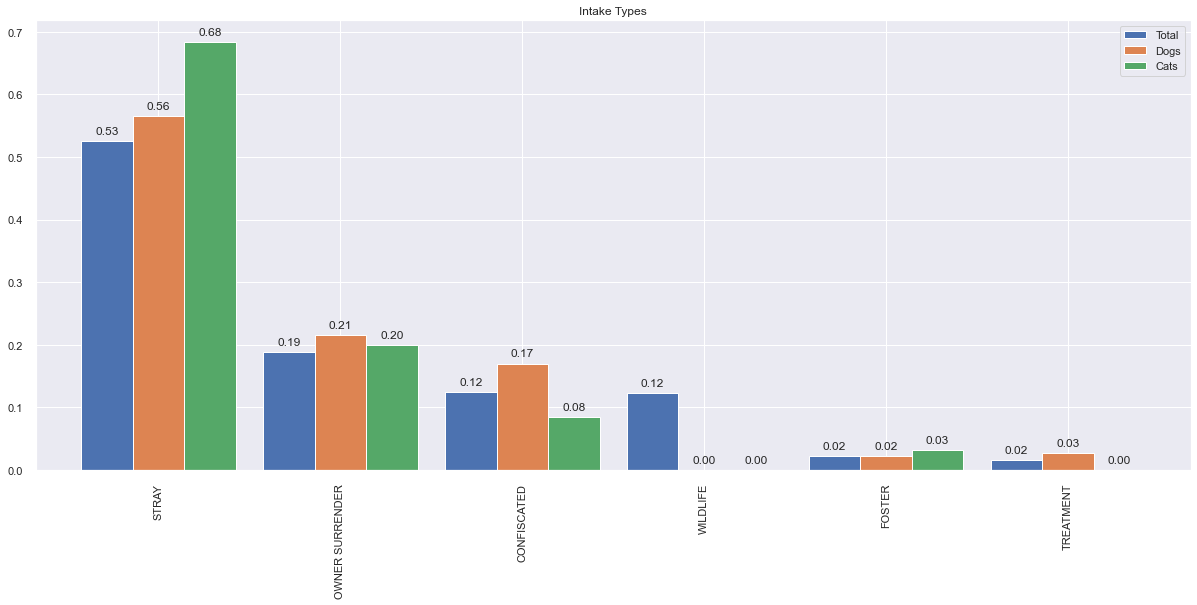

In [1012]:
cou14, c14i = runpercs(c14)

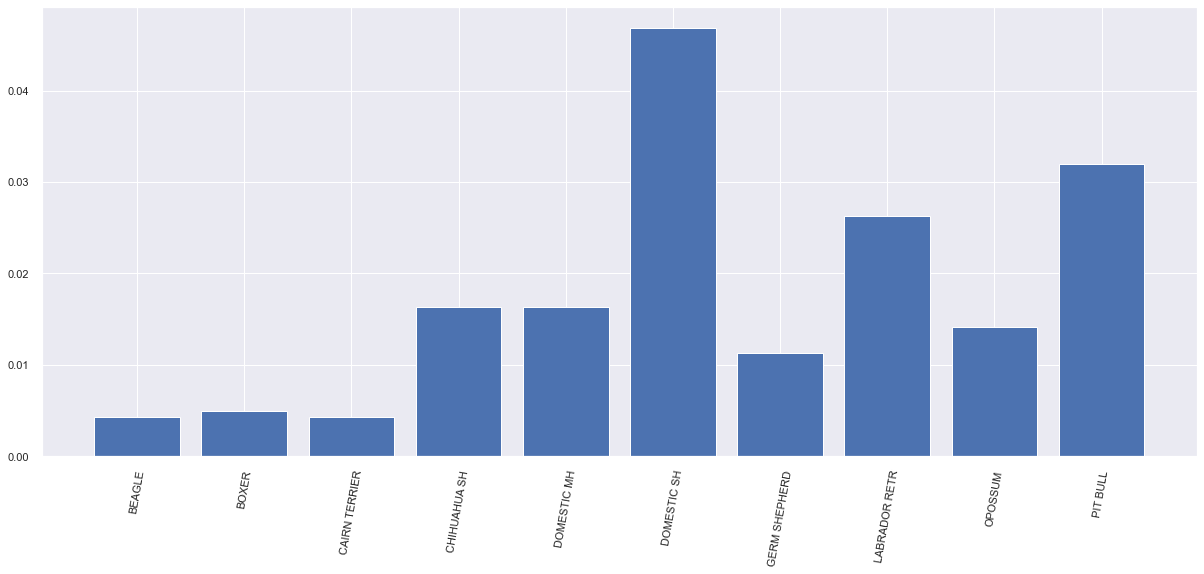

In [1013]:
c14breed = breads(c14)

In [1014]:
c14.Outcome_Days.mean()

4.386920980926431

<AxesSubplot:xlabel='Month', ylabel='count'>

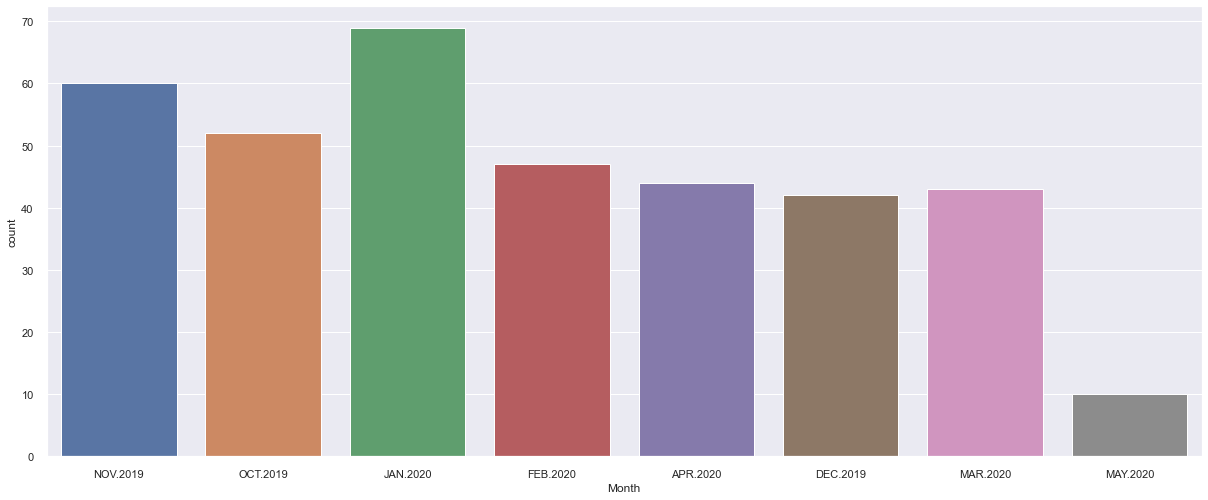

In [1036]:
sns.countplot(c14['Month'])

In [1112]:
c14['Month'].value_counts()

JAN.2020    69
NOV.2019    60
OCT.2019    52
FEB.2020    47
APR.2020    44
MAR.2020    43
DEC.2019    42
MAY.2020    10
Name: Month, dtype: int64

In [1040]:
rr

Month     Intake Type    
APR.2020  STRAY              23
          WILDLIFE           14
          CONFISCATED         3
          OWNER SURRENDER     2
          FOSTER              1
          TREATMENT           1
DEC.2019  STRAY              22
          OWNER SURRENDER    11
          CONFISCATED         3
          FOSTER              3
          WILDLIFE            2
          TREATMENT           1
FEB.2020  STRAY              29
          CONFISCATED         8
          OWNER SURRENDER     6
          WILDLIFE            3
          FOSTER              1
JAN.2020  STRAY              33
          OWNER SURRENDER    16
          CONFISCATED        10
          WILDLIFE            9
          TREATMENT           1
MAR.2020  STRAY              19
          CONFISCATED        10
          WILDLIFE            9
          FOSTER              3
          OWNER SURRENDER     2
MAY.2020  STRAY               7
          WILDLIFE            3
NOV.2019  STRAY              28
          OWNE

In [1111]:
c14.groupby(by='Month')['cost_of_care'].mean()

Month
APR.2020    120.817045
DEC.2019    200.498571
FEB.2020    223.728723
JAN.2020    267.534348
MAR.2020    207.017907
MAY.2020     54.800000
NOV.2019    191.646000
OCT.2019    361.660769
Name: cost_of_care, dtype: float64

In [ ]:
#Return Rates

In [ ]:
#have percentages by dog, cat and total for outcomes.  Make a new dataframe that lists outcomes by dog, cat, total
#and then by council district.  Or make a slide highlight problem districts?

In [ ]:
#also lets do a days to adoption.  intake - outcome/adoption and intake - outcome/euthanasia